# Mineraology characterization with Planetserver 

In the following ipynb I am showing the results following Ehlmann's paper with Planetserver. I reproduced 3 figures using WCPS queries to Planetserver (PS) and created CRISM products adapting Ehlmann's to Viviano-Beck products. The studied area is within the Nili Fossae and make use of several CRISM images. Coordinates and kernels are followed as stated in Ehlmann 2009. 


## Chlorite and Prehnite

Here I look for Chlorite and Prehnite in the coverage FRT000050F2 which is known of containing the mentioned materials. The following coordinates are choosen:

| label in figure | Crism image | Center pixel |          Coordinates         | kernel size |
|:---------------:|:-----------:|:------------:|:----------------------------:|:-----------:|
|     50F2_num    | FRT000050F2 |  X:125 Y:434 | Lat:15.120803 Long:72.187340 |     5x5     |
|     50F2_den    | FRT000050F2 |  X:125 Y:310 | Lat:15.066303 Long:72.183708 |     5x5     |

The false color RGB image is shown as follows:

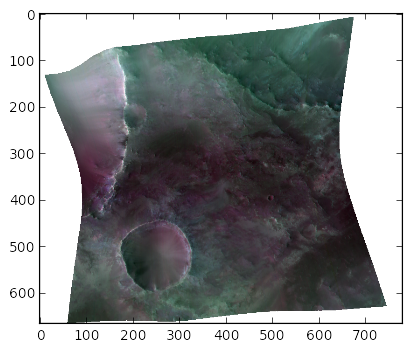

In [150]:
%matplotlib inline
import urllib2
import matplotlib.pyplot as plt

# create a file-like object from the url
f=urllib2.urlopen("http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20data%20in%20(frt000050f2_07_if165l_trr3)%20return%20encode(%20{%20red:%20(int)(255%20/%20(max((data.band_233%20!=%2065535)%20*%20data.band_233)%20-%20min(data.band_233)))%20*%20(data.band_233%20-%20min(data.band_233));%20green:%20(int)(255%20/%20(max((data.band_13%20!=%2065535)%20*%20data.band_13)%20-%20min(data.band_13)))%20*%20(data.band_13%20-%20min(data.band_13));%20blue:%20(int)(255%20/%20(max((data.band_78%20!=%2065535)%20*%20data.band_78)%20-%20min(data.band_78)))%20*%20(data.band_78%20-%20min(data.band_78))%20;%20alpha:%20(data.band_100%20!=%2065535)%20*%20255},%20%22png%22,%20%22nodata=null%22)")

# read the image file in a numpy array
a = plt.imread(f)
plt.imshow(a)
plt.show()

In the next figure the numerator and denominator are shown:

In [151]:
%matplotlib inline
import math
import urllib2
import csv
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO
import pandas as pd
import requests

def get_data(url):
    response = urllib2.urlopen(url)
    data = np.genfromtxt(response,delimiter = ' ', dtype = float)
    return data


#we declare the x axis
#x_axis = [1.000,1.007,1.014,1.021,1.027,1.034,1.041,1.048,1.055,1.062,1.068,1.075,1.082,1.089,1.096,1.103,1.110,1.116,1.123,1.130,1.137,1.144,1.151,1.158,1.164,1.171,1.178,1.185,1.192,1.199,1.205,1.212,1.219,1.226,1.233,1.240,1.247,1.253,1.260,1.267,1.274,1.281,1.288,1.295,1.301,1.308,1.315,1.322,1.329,1.336,1.342,1.349,1.356,1.363,1.370,1.377,1.384,1.390,1.397,1.404,1.411,1.418,1.425,1.432,1.438,1.445,1.452,1.459,1.466,1.473,1.479,1.486,1.493,1.500,1.507,1.514,1.521,1.527,1.534,1.541,1.548,1.555,1.562,1.568,1.575,1.582,1.589,1.596,1.603,1.610,1.616,1.623,1.630,1.637,1.644,1.651,1.658,1.664,1.671,1.678,1.685,1.692,1.699,1.705,1.712,1.719,1.726,1.733,1.740,1.747,1.753,1.760,1.767,1.774,1.781,1.788,1.795,1.801,1.808,1.815,1.822,1.829,1.836,1.842,1.849,1.856,1.863,1.870,1.877,1.884,1.890,1.897,1.904,1.911,1.918,1.925,1.932,1.938,1.945,1.952,1.959,1.966,1.973,1.979,1.986,1.993,2.000,2.007,2.014,2.021,2.027,2.034,2.041,2.048,2.055,2.062,2.068,2.075,2.082,2.089,2.096,2.103,2.110,2.116,2.123,2.130,2.137,2.144,2.151,2.158,2.164,2.171,2.178,2.185,2.192,2.199,2.205,2.212,2.219,2.226,2.233,2.240,2.247,2.253,2.260,2.267,2.274,2.281,2.288,2.295,2.301,2.308,2.315,2.322,2.329,2.336,2.342,2.349,2.356,2.363,2.370,2.377,2.384,2.390,2.397,2.404,2.411,2.418,2.425,2.432,2.438,2.445,2.452,2.459,2.466,2.473,2.479,2.486,2.493,2.500,2.507,2.514,2.521,2.527,2.534,2.541,2.548,2.555,2.562,2.568,2.575,2.582,2.589,2.596,2.603,2.610,2.616,2.623,2.630,2.637,2.644,2.651,2.658,2.664,2.671,2.678,2.685,2.692,2.699,2.705,2.712,2.719,2.726,2.733,2.740,2.747,2.753,2.760,2.767,2.774,2.781,2.788,2.795,2.801,2.808,2.815,2.822,2.829,2.836,2.842,2.849,2.856,2.863,2.870,2.877,2.884,2.890,2.897,2.904,2.911,2.918,2.925,2.932,2.938,2.945,2.952,2.959,2.966,2.973,2.979,2.986,2.993,3.000,3.007,3.014,3.021,3.027,3.034,3.041,3.048,3.055,3.062,3.068,3.075,3.082,3.089,3.096,3.103,3.110,3.116,3.123,3.130,3.137,3.144,3.151,3.158,3.164,3.171,3.178,3.185,3.192,3.199,3.205,3.212,3.219,3.226,3.233,3.240,3.247,3.253,3.260,3.267,3.274,3.281,3.288,3.295,3.301,3.308,3.315,3.322,3.329,3.336,3.342,3.349,3.356,3.363,3.370,3.377,3.384,3.390,3.397,3.404,3.411,3.418,3.425,3.432,3.438,3.445,3.452,3.459,3.466,3.473,3.479,3.486,3.493,3.500,3.507,3.514,3.521,3.527,3.534,3.541,3.548,3.555,3.562,3.568,3.575,3.582,3.589,3.596,3.603,3.610,3.616,3.623,3.630,3.637,3.644,3.651,3.658,3.664,3.671,3.678,3.685,3.692,3.699,3.705,3.712,3.719,3.726,3.733,3.740,3.747,3.753,3.760,3.767,3.774,3.781,3.788,3.795,3.801,3.808,3.815,3.822,3.829,3.836,3.842,3.849,3.856,3.863,3.870,3.877,3.884,3.890,3.897,3.904,3.911,3.918,3.925,3.932,3.938,3.945,3.952,3.959,3.966,3.973,3.979,3.986,3.993]
x_axis = [1.00135, 1.0079, 1.0144500000000001, 1.0209999999999999, 1.02755, 1.0341, 1.0406500000000001, 1.0471999999999999, 1.05375, 1.0603, 1.0668500000000001, 1.07341, 1.07996, 1.0865100000000001, 1.09307, 1.09962, 1.1061700000000001, 1.11273, 1.1192800000000001, 1.12584, 1.13239, 1.1389499999999999, 1.14551, 1.1520600000000001, 1.15862, 1.1651800000000001, 1.1717299999999999, 1.1782900000000001, 1.18485, 1.1914100000000001, 1.19797, 1.2045300000000001, 1.21109, 1.2176499999999999, 1.22421, 1.2307699999999999, 1.23733, 1.2438899999999999, 1.2504500000000001, 1.25701, 1.2635700000000001, 1.27014, 1.2766999999999999, 1.2832600000000001, 1.28983, 1.2963899999999999, 1.3029500000000001, 1.30952, 1.3160799999999999, 1.3226500000000001, 1.32921, 1.33578, 1.3423400000000001, 1.3489100000000001, 1.35548, 1.36205, 1.3686100000000001, 1.3751800000000001, 1.38175, 1.38832, 1.39489, 1.4014500000000001, 1.40802, 1.41459, 1.42116, 1.4277299999999999, 1.43431, 1.4408799999999999, 1.4474499999999999, 1.4540200000000001, 1.4605900000000001, 1.46716, 1.47374, 1.48031, 1.48688, 1.49346, 1.50003, 1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948, 1.54606, 1.55264, 1.55921, 1.56579, 1.57237, 1.5789500000000001, 1.58552, 1.5921000000000001, 1.5986800000000001, 1.6052599999999999, 1.6118399999999999, 1.61842, 1.625, 1.63158, 1.6381600000000001, 1.6447400000000001, 1.65133, 1.65791, 1.66449, 1.6710700000000001, 1.6776599999999999, 1.68424, 1.69082, 1.6974100000000001, 1.7039899999999999, 1.71058, 1.71716, 1.7237499999999999, 1.7303299999999999, 1.73692, 1.7435099999999999, 1.7500899999999999, 1.75668, 1.7632699999999999, 1.7698499999999999, 1.77644, 1.7830299999999999, 1.78962, 1.7962100000000001, 1.8028, 1.8093900000000001, 1.8159799999999999, 1.82257, 1.8291599999999999, 1.83575, 1.8423400000000001, 1.84893, 1.8555200000000001, 1.86212, 1.8687100000000001, 1.8753, 1.8818999999999999, 1.88849, 1.8950800000000001, 1.90168, 1.9082699999999999, 1.9148700000000001, 1.9214599999999999, 1.9280600000000001, 1.93465, 1.9412499999999999, 1.9478500000000001, 1.95444, 1.9610399999999999, 1.9676400000000001, 1.97424, 1.9808399999999999, 1.98743, 1.99403, 2.0006300000000001, 2.0072299999999998, 2.01383, 2.0204300000000002, 2.0270299999999999, 2.03363, 2.0402399999999998, 2.04684, 2.0534400000000002, 2.0600399999999999, 2.06664, 2.0732499999999998, 2.07985, 2.0864500000000001, 2.0930599999999999, 2.0996600000000001, 2.1062699999999999, 2.11287, 2.1194799999999998, 2.12608, 2.1326900000000002, 2.1393, 2.1459000000000001, 2.1525099999999999, 2.1591200000000002, 2.1657199999999999, 2.1723300000000001, 2.1789399999999999, 2.1855500000000001, 2.1921599999999999, 2.1987700000000001, 2.2053799999999999, 2.2119900000000001, 2.2185999999999999, 2.2252100000000001, 2.2318199999999999, 2.2384300000000001, 2.2450399999999999, 2.2516500000000002, 2.25827, 2.2648799999999998, 2.27149, 2.2780999999999998, 2.2847200000000001, 2.2913299999999999, 2.2979500000000002, 2.3045599999999999, 2.3111799999999998, 2.31779, 2.3244099999999999, 2.3310200000000001, 2.3376399999999999, 2.3442599999999998, 2.35087, 2.3574899999999999, 2.3641100000000002, 2.3707199999999999, 2.3773399999999998, 2.3839600000000001, 2.3905799999999999, 2.3972000000000002, 2.4038200000000001, 2.4104399999999999, 2.4170600000000002, 2.4236800000000001, 2.4302999999999999, 2.4369200000000002, 2.44354, 2.45017, 2.4567899999999998, 2.4634100000000001, 2.4700299999999999, 2.4766599999999999, 2.4832800000000002, 2.4899, 2.4965299999999999, 2.50312, 2.5097200000000002, 2.5163199999999999, 2.5229200000000001, 2.5295100000000001, 2.5361099999999999, 2.54271, 2.5493100000000002, 2.5559099999999999, 2.5625100000000001, 2.5691099999999998, 2.5757099999999999, 2.5823100000000001, 2.5889099999999998, 2.59551, 2.6021200000000002, 2.6087199999999999, 2.6153200000000001, 2.6219199999999998, 2.62853, 2.6351300000000002, 2.64174, 2.6483400000000001, 2.6549499999999999, 2.6615500000000001, 2.6681599999999999, 2.67476, 2.6813699999999998, 2.68798, 2.6945800000000002, 2.70119, 2.7606799999999998, 2.76729, 2.7738999999999998, 2.7805200000000001, 2.7871299999999999, 2.7937400000000001, 2.8003499999999999, 2.8069700000000002, 2.81358, 2.8201999999999998, 2.82681, 2.8334299999999999, 2.8400400000000001, 2.84666, 2.8532799999999998, 2.85989, 2.8665099999999999, 2.8731300000000002, 2.87975, 2.8863599999999998, 2.8929800000000001, 2.8996, 2.9062199999999998, 2.9128400000000001, 2.9194599999999999, 2.9260799999999998, 2.9327000000000001, 2.9393199999999999, 2.9459499999999998, 2.9525700000000001, 2.95919, 2.9658099999999998, 2.9724400000000002, 2.97906, 2.9856799999999999, 2.9923099999999998, 2.9989300000000001, 3.00556, 3.0121799999999999, 3.0188100000000002, 3.0254400000000001, 3.03206, 3.0386899999999999, 3.0453199999999998, 3.0519500000000002, 3.05857, 3.0651999999999999, 3.0718299999999998, 3.0784600000000002, 3.0850900000000001, 3.09172, 3.0983499999999999, 3.1049799999999999, 3.1116100000000002, 3.1182500000000002, 3.1248800000000001, 3.13151, 3.1381399999999999, 3.1447799999999999, 3.1514099999999998, 3.1580400000000002, 3.1646800000000002, 3.1713100000000001, 3.1779500000000001, 3.18458, 3.1912199999999999, 3.1978499999999999, 3.2044899999999998, 3.2111299999999998, 3.2177600000000002, 3.2244000000000002, 3.2310400000000001, 3.2376800000000001, 3.2443200000000001, 3.2509600000000001, 3.2576000000000001, 3.26424, 3.27088, 3.27752, 3.28416, 3.2907999999999999, 3.2974399999999999, 3.3040799999999999, 3.31073, 3.3173699999999999, 3.3240099999999999, 3.33066, 3.3372999999999999, 3.34395, 3.35059, 3.35724, 3.36388, 3.37053, 3.37717, 3.3838200000000001, 3.3904700000000001, 3.3971200000000001, 3.4037600000000001, 3.4104100000000002, 3.4170600000000002, 3.4237099999999998, 3.4303599999999999, 3.4370099999999999, 3.4436599999999999, 3.45031, 3.45696, 3.4636100000000001, 3.4702600000000001, 3.4769199999999998, 3.4835699999999998, 3.4902199999999999, 3.4968699999999999, 3.50353, 3.5101800000000001, 3.5168400000000002, 3.5234899999999998, 3.5301499999999999, 3.5367999999999999, 3.5434600000000001, 3.5501100000000001, 3.5567700000000002, 3.5634299999999999, 3.5700799999999999, 3.57674, 3.5834000000000001, 3.5900599999999998, 3.5967199999999999, 3.60338, 3.6100400000000001, 3.6166999999999998, 3.6233599999999999, 3.63002, 3.6366800000000001, 3.6433399999999998, 3.6499999999999999, 3.6566700000000001, 3.6633300000000002, 3.6699899999999999, 3.67665, 3.6833200000000001, 3.6899799999999998, 3.69665, 3.7033100000000001, 3.7099799999999998, 3.7166399999999999, 3.7233100000000001, 3.7299799999999999, 3.73664, 3.7433100000000001, 3.7499799999999999, 3.75665, 3.7633100000000002, 3.7699799999999999, 3.7766500000000001, 3.7833199999999998, 3.78999, 3.7966600000000001, 3.8033299999999999, 3.8100000000000001, 3.8166699999999998, 3.82335, 3.8300200000000002, 3.8366899999999999, 3.8433600000000001, 3.8500399999999999, 3.8567100000000001, 3.8633899999999999, 3.8700600000000001, 3.8767299999999998, 3.88341, 3.8900800000000002, 3.89676, 3.9034399999999998, 3.91011, 3.9167900000000002, 3.92347, 3.9301499999999998, 3.93682, 4.0]
#Those are coordinates in lat long of the pixels for the numerator
longitude_num = [72.187935, 72.187981, 72.188019,72.188065,72.188095,72.187592,72.187637,72.187675,72.187721,72.187752,72.187256,72.187302,72.187340,72.187378,72.187408,72.186913,72.186958,72.186996,72.187035,72.187065,72.186569,72.186615,72.186653,72.186699,72.186722]
latitude_num = [15.119682, 15.120259, 15.120914,15.121414,15.121989,15.119627,15.120204,15.120858,15.121357,15.121931,15.119572,15.120148,15.120803,15.121299,15.121874,15.119516,15.120092,15.120747,15.121242,15.121817,15.119460,15.120037,15.120691,15.121184,15.121758]

#Those are coordinates in lat long of the pixels for the denominator
longitude_denom = [72.184242,72.184280,72.184303,72.184326,72.184341,72.183945,72.183983,72.184006,72.184029,72.184044,72.183647,72.183685,72.183708,72.183731,72.183746,72.183350,72.183388,72.183411,72.183434,72.183449,72.183052,72.183090,72.183113,72.183128,72.183151]
latitude_denom = [15.065743,15.066014,15.066381,15.066720,15.067072,15.065704,15.065976,15.066341,15.066682,15.067037,15.065666,15.065937,15.066303,15.066645,15.067001,15.065627,15.065898,15.066263,15.066607,15.066964,15.065588,15.065859,15.066224,15.066567,15.066924]

#declare arrays for avg_num, _denom and ratio
avg_num = np.zeros(len(x_axis))
avg_denom = np.zeros(len(x_axis))
ratio = []

In [152]:
print('Computing Numerator...')
for i in range (0,len(longitude_num)):
    #data is stored in meters so we transform lat, long to meters
    r = 3396190
    cosOf0 = 1
    rho = (math.pi / 180)
    N = latitude_num[i] * r * rho
    E = longitude_num[i] * cosOf0 * r * rho
    #here you can select the coverage you want to query
    covID = "frt000050f2_07_if165l_trr3"
    query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(" + covID + ")%20return%20encode(c[%20N(" + str(N) + 		":" + str(N) + "),%20E(" + str(E) + ":" + str(E) + ")%20],%20%22csv%22)"
    data = get_data(query)
    for x in range (0,len(data)):
        if data[x] == 65535 or math.isnan(data[x]):
            data[x] = 0
        avg_num[x] = avg_num[x] + data[x]

for n in range (0,len(avg_num)):
    avg_num[n] = avg_num[n]/len(longitude_num)

print('Computing Denominator...')
for i in range (0,len(longitude_denom)):
    #data is stored in meters so we transform lat, long to meters
    r = 3396190
    cosOf0 = 1
    rho = (math.pi / 180)
    N = latitude_denom[i] * r * rho
    E = longitude_denom[i] * cosOf0 * r * rho
    covID = "frt000050f2_07_if165l_trr3"
    query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(" + covID + ")%20return%20encode(c[%20N(" + str(N) + 		":" + str(N) + "),%20E(" + str(E) + ":" + str(E) + ")%20],%20%22csv%22)"
    data = get_data(query)
    for x in range (0,len(data)):
        if data[x] == 65535 or math.isnan(data[x]):
            data[x] = 0
        avg_denom[x] = avg_denom[x] + data[x]

for n in range (0,len(avg_denom)):
    avg_denom[n] = avg_denom[n]/len(longitude_num)
    
print ('Ratio')
for j in range (0,len(avg_denom)):
    ratio.append(avg_num[j] / avg_denom[j])
    
print('Done')

Computing Numerator...
Computing Denominator...
Ratio
Done


In the next cell two figures are computed. The first corresponds to the Numerator and Denominator and the second one to the ratio between them

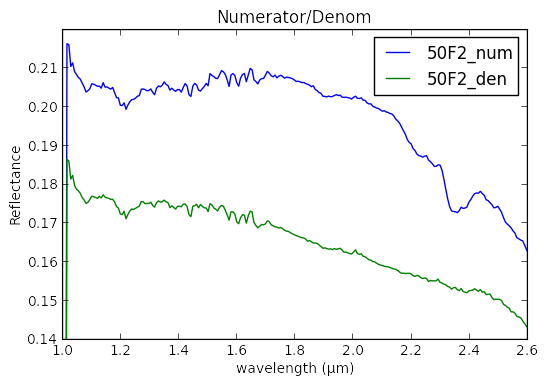

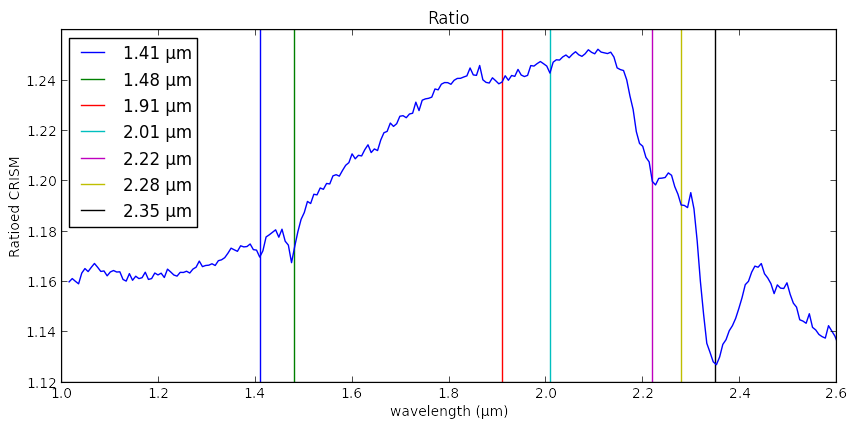

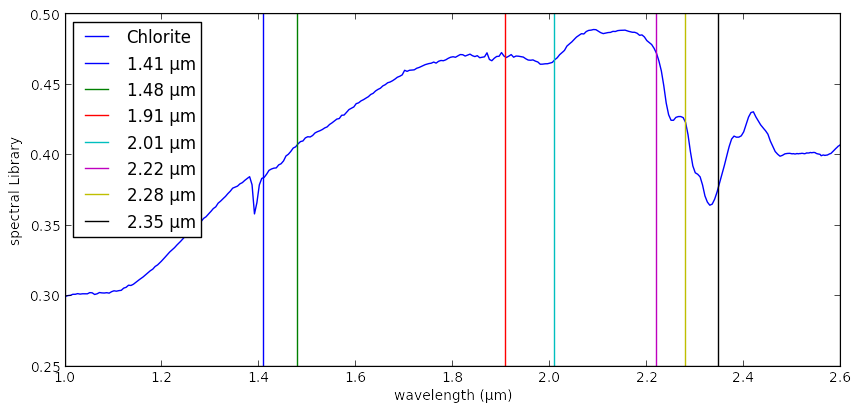

In [153]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlim(1, 2.6)
plt.ylim(0.14,0.22)
plt.title('Numerator/Denom')


plt.plot(x_axis,avg_num, '-', label="50F2_num", color='b')
plt.plot(x_axis,avg_denom, '-', label="50F2_den", color='g')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'Reflectance' )

plt.legend(loc='upper right')

##############################################
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(211)
plt.xlim(1, 2.6)
plt.ylim(1.12,1.26)
plt.title('Ratio')

plt.axvline(x=1.41, color='b',label='1.41 ' + u"\u03BC" + 'm')
plt.axvline(x=1.48, color='g',label='1.48 ' + u"\u03BC" + 'm')
plt.axvline(x=1.91, color='r',label='1.91 ' + u"\u03BC" + 'm')
plt.axvline(x=2.01, color='c',label='2.01 ' + u"\u03BC" + 'm')
plt.axvline(x=2.22, color='m',label='2.22 ' + u"\u03BC" + 'm')
plt.axvline(x=2.28, color='y',label='2.28 ' + u"\u03BC" + 'm')
plt.axvline(x=2.35, color='k',label='2.35 ' + u"\u03BC" + 'm')
plt.plot(x_axis,ratio, '-', color='b')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'Ratioed CRISM' )
plt.legend(loc='upper left')

##############################################
x_spec = [0.350000,0.352500,0.355000,0.357500,0.360000,0.362500,0.365000,0.367500,0.370000,0.372500,0.375000,0.377500,0.380000,0.382500,0.385000,0.387500,0.390000,0.392500,0.395000,0.397500,0.400000,0.402500,0.405000,0.407500,0.410000,0.412500,0.415000,0.417500,0.420000,0.422500,0.425000,0.427500,0.430000,0.432500,0.435000,0.437500,0.440000,0.442500,0.445000,0.447500,0.450000,0.452500,0.455000,0.457500,0.460000,0.462500,0.465000,0.467500,0.470000,0.472500,0.475000,0.477500,0.480000,0.482500,0.485000,0.487500,0.490000,0.492500,0.495000,0.497500,0.500000,0.502500,0.505000,0.507500,0.510000,0.512500,0.515000,0.517500,0.520000,0.522500,0.525000,0.527500,0.530000,0.532500,0.535000,0.537500,0.540000,0.542500,0.545000,0.547500,0.550000,0.552500,0.555000,0.557500,0.560000,0.562500,0.565000,0.567500,0.570000,0.572500,0.575000,0.577500,0.580000,0.582500,0.585000,0.587500,0.590000,0.592500,0.595000,0.597500,0.600000,0.602500,0.605000,0.607500,0.610000,0.612500,0.615000,0.617500,0.620000,0.622500,0.625000,0.627500,0.630000,0.632500,0.635000,0.637500,0.640000,0.642500,0.645000,0.647500,0.650000,0.652500,0.655000,0.657500,0.660000,0.662500,0.665000,0.667500,0.670000,0.672500,0.675000,0.677500,0.680000,0.682500,0.685000,0.687500,0.690000,0.692500,0.695000,0.697500,0.700000,0.702500,0.705000,0.707500,0.710000,0.712500,0.715000,0.717500,0.720000,0.722500,0.725000,0.727500,0.730000,0.732500,0.735000,0.737500,0.740000,0.742500,0.745000,0.747500,0.750000,0.752500,0.755000,0.757500,0.760000,0.762500,0.765000,0.767500,0.770000,0.772500,0.775000,0.777500,0.780000,0.782500,0.785000,0.787500,0.790000,0.792500,0.795000,0.797500,0.800000,0.802500,0.805000,0.807500,0.810000,0.812500,0.815000,0.817500,0.820000,0.822500,0.825000,0.827500,0.830000,0.832500,0.835000,0.837500,0.840000,0.842500,0.845000,0.847500,0.850000,0.852500,0.855000,0.857500,0.860000,0.862500,0.865000,0.867500,0.870000,0.872500,0.875000,0.877500,0.880000,0.882500,0.885000,0.887500,0.890000,0.892500,0.895000,0.897500,0.899999,0.902499,0.904999,0.907499,0.909999,0.912499,0.914999,0.917499,0.919999,0.922499,0.924999,0.927499,0.929999,0.932499,0.934999,0.937499,0.939999,0.942499,0.944999,0.947499,0.949999,0.952499,0.954999,0.957499,0.959999,0.962499,0.964999,0.967499,0.969999,0.972499,0.974999,0.977499,0.979999,0.982499,0.984999,0.987499,0.989999,0.992499,0.994999,0.997499,0.999999,1.002500,1.005000,1.007500,1.010000,1.012500,1.015000,1.017500,1.020000,1.022500,1.025000,1.027500,1.030000,1.032500,1.035000,1.037500,1.040000,1.042500,1.045000,1.047500,1.050000,1.052500,1.055000,1.057500,1.060000,1.062500,1.065000,1.067500,1.070000,1.072500,1.075000,1.077500,1.080000,1.082500,1.085000,1.087500,1.090000,1.092500,1.095000,1.097500,1.100000,1.102500,1.105000,1.107500,1.110000,1.112500,1.115000,1.117500,1.120000,1.122500,1.125000,1.127500,1.130000,1.132500,1.135000,1.137500,1.140000,1.142500,1.145000,1.147500,1.150000,1.152500,1.155000,1.157500,1.160000,1.162500,1.165000,1.167500,1.170000,1.172500,1.175000,1.177500,1.180000,1.182500,1.185000,1.187500,1.190000,1.192500,1.195000,1.197500,1.200000,1.202500,1.205000,1.207500,1.210000,1.212500,1.215000,1.217500,1.220000,1.222500,1.225000,1.227500,1.230000,1.232500,1.235000,1.237500,1.240000,1.242500,1.245010,1.247510,1.250010,1.252510,1.255010,1.257510,1.260010,1.262510,1.265010,1.267510,1.270010,1.272510,1.275010,1.277510,1.280010,1.282510,1.285010,1.287510,1.290010,1.292510,1.295010,1.297510,1.300010,1.302510,1.305010,1.307510,1.310010,1.312510,1.315010,1.317510,1.320010,1.322510,1.325010,1.327510,1.330010,1.332510,1.335010,1.337510,1.340010,1.342510,1.345010,1.347510,1.350010,1.352510,1.355010,1.357510,1.360010,1.362510,1.365010,1.367510,1.370010,1.372510,1.375010,1.377510,1.380010,1.382510,1.385010,1.387510,1.390010,1.392510,1.395010,1.397510,1.400010,1.402510,1.405010,1.407510,1.410010,1.412510,1.415010,1.417510,1.420010,1.422510,1.425010,1.427510,1.430010,1.432510,1.435010,1.437510,1.440010,1.442510,1.445010,1.447510,1.450010,1.452510,1.455010,1.457510,1.460010,1.462510,1.465010,1.467510,1.470010,1.472510,1.475010,1.477510,1.480010,1.482510,1.485010,1.487510,1.490010,1.492510,1.495010,1.497510,1.500010,1.502510,1.505010,1.507510,1.510010,1.512510,1.515010,1.517510,1.520010,1.522510,1.525010,1.527510,1.530010,1.532510,1.535010,1.537510,1.540010,1.542510,1.545010,1.547510,1.550010,1.552510,1.555010,1.557510,1.560010,1.562510,1.565010,1.567510,1.570010,1.572510,1.575010,1.577510,1.580010,1.582510,1.585010,1.587510,1.590010,1.592510,1.595010,1.597510,1.600010,1.602510,1.605010,1.607510,1.610010,1.612510,1.615010,1.617510,1.620010,1.622510,1.625010,1.627510,1.630010,1.632510,1.635010,1.637510,1.640010,1.642510,1.645010,1.647510,1.650010,1.652510,1.655010,1.657510,1.660010,1.662510,1.665010,1.667510,1.670010,1.672510,1.675010,1.677510,1.680010,1.682520,1.685020,1.687520,1.690020,1.692520,1.695020,1.697520,1.700020,1.702520,1.705020,1.707520,1.710020,1.712520,1.715020,1.717520,1.720020,1.722520,1.725020,1.727520,1.730020,1.732520,1.735020,1.737520,1.740020,1.742520,1.745020,1.747520,1.750020,1.752520,1.755020,1.757520,1.760020,1.762520,1.765020,1.767520,1.770020,1.772520,1.775020,1.777520,1.780020,1.782520,1.785020,1.787520,1.790020,1.792520,1.795020,1.797520,1.800020,1.802520,1.805020,1.807520,1.810020,1.812520,1.815020,1.817520,1.820020,1.822520,1.825020,1.827520,1.830020,1.832520,1.835020,1.837520,1.840020,1.842520,1.845020,1.847520,1.850020,1.852520,1.855020,1.857520,1.860020,1.862520,1.865020,1.867520,1.870020,1.872520,1.875020,1.877520,1.880020,1.882520,1.885020,1.887520,1.890020,1.892520,1.895020,1.897520,1.900020,1.902520,1.905020,1.907520,1.910020,1.912520,1.915020,1.917520,1.920020,1.922520,1.925020,1.927520,1.930020,1.932520,1.935020,1.937520,1.940020,1.942520,1.945020,1.947520,1.950020,1.952520,1.955020,1.957520,1.960020,1.962520,1.965020,1.967520,1.970020,1.972520,1.975020,1.977520,1.980020,1.982520,1.985020,1.987520,1.990020,1.992520,1.995020,1.997520,2.000020,2.002520,2.005020,2.007520,2.010020,2.012520,2.015020,2.017520,2.020020,2.022520,2.025020,2.027520,2.030020,2.032520,2.035020,2.037520,2.040020,2.042520,2.045020,2.047520,2.050020,2.052520,2.055020,2.057520,2.060020,2.062520,2.065020,2.067520,2.070020,2.072520,2.075020,2.077520,2.080020,2.082520,2.085020,2.087520,2.090020,2.092520,2.095020,2.097520,2.100020,2.102520,2.105020,2.107520,2.110020,2.112520,2.115020,2.117520,2.120020,2.122520,2.125030,2.127530,2.130030,2.132530,2.135030,2.137530,2.140030,2.142530,2.145030,2.147530,2.150030,2.152530,2.155030,2.157530,2.160030,2.162530,2.165030,2.167530,2.170030,2.172530,2.175030,2.177530,2.180030,2.182530,2.185030,2.187530,2.190030,2.192530,2.195030,2.197530,2.200030,2.202530,2.205030,2.207530,2.210030,2.212530,2.215030,2.217530,2.220030,2.222530,2.225030,2.227530,2.230030,2.232530,2.235030,2.237530,2.240030,2.242530,2.245030,2.247530,2.250030,2.252530,2.255030,2.257530,2.260030,2.262530,2.265030,2.267530,2.270030,2.272530,2.275030,2.277530,2.280030,2.282530,2.285030,2.287530,2.290030,2.292530,2.295030,2.297530,2.300030,2.302530,2.305030,2.307530,2.310030,2.312530,2.315030,2.317530,2.320030,2.322530,2.325030,2.327530,2.330030,2.332530,2.335030,2.337530,2.340030,2.342530,2.345030,2.347530,2.350030,2.352530,2.355030,2.357530,2.360030,2.362530,2.365030,2.367530,2.370030,2.372530,2.375030,2.377530,2.380030,2.382530,2.385030,2.387530,2.390030,2.392530,2.395030,2.397530,2.400030,2.402530,2.405030,2.407530,2.410030,2.412530,2.415030,2.417530,2.420030,2.422530,2.425030,2.427530,2.430030,2.432530,2.435030,2.437530,2.440030,2.442530,2.445030,2.447530,2.450030,2.452530,2.455030,2.457530,2.460030,2.462530,2.465030,2.467530,2.470030,2.472530,2.475030,2.477530,2.480030,2.482530,2.485030,2.487530,2.490030,2.492530,2.495030,2.497530,2.500030,2.502530,2.505030,2.507530,2.510030,2.512530,2.515030,2.517530,2.520030,2.522530,2.525030,2.527530,2.530030,2.532530,2.535030,2.537530,2.540030,2.542530,2.545030,2.547530,2.550030,2.552530,2.555030,2.557530,2.560030,2.562540,2.565040,2.567540,2.570040,2.572540,2.575040,2.577540,2.580040,2.582540,2.585040,2.587540,2.590040,2.592540,2.595040,2.597540,2.600040,2.602540,2.605040,2.607540,2.610040,2.612540,2.615040,2.617540,2.620040,2.622540,2.625040,2.627540,2.630040,2.632540,2.635040,2.637540,2.640040,2.642540,2.645040,2.647540,2.650040,2.652540,2.655040,2.657540,2.660040,2.662540,2.665040,2.667540,2.670040,2.672540,2.675040,2.677540,2.680040,2.682540,2.685040,2.687540,2.690040,2.692540,2.695040,2.697540,2.700040,2.702540,2.705040,2.707540,2.710040,2.712540,2.715040,2.717540,2.720040,2.722540,2.725040,2.727540,2.730040,2.732540,2.735040,2.737540,2.740040,2.742540,2.745040,2.747540,2.750040,2.752540,2.755040,2.757540,2.760040,2.762540,2.765040,2.767540,2.770040,2.772540,2.775040,2.777540,2.780040,2.782540,2.785040,2.787540,2.790040,2.792540,2.795040,2.797540,2.800040,2.802540,2.805040,2.807540,2.810040,2.812540,2.815040,2.817540,2.820040,2.822540,2.825040,2.827540,2.830040,2.832540,2.835040,2.837540,2.840040,2.842540,2.845040,2.847540,2.850040,2.852540,2.855040,2.857540,2.860040,2.862540,2.865040,2.867540,2.870040,2.872540,2.875040,2.877540,2.880040,2.882540,2.885040,2.887540,2.890040,2.892540,2.895040,2.897540,2.900040,2.902540,2.905040,2.907540,2.910040,2.912540,2.915040,2.917540,2.920040,2.922540,2.925040,2.927540,2.930040,2.932540,2.935040,2.937540,2.940040,2.942540,2.945040,2.947540,2.950040,2.952540,2.955040,2.957540,2.960040,2.962540,2.965040,2.967540,2.970040,2.972540,2.975040,2.977540,2.980040,2.982540,2.985040,2.987540,2.990040,2.992540,2.995040,2.997550,3.000050,3.002550,3.005050,3.007550,3.010050,3.012550,3.015050,3.017550,3.020050,3.022550,3.025050,3.027550,3.030050,3.032550,3.035050,3.037550,3.040050,3.042550,3.045050,3.047550,3.050050,3.052550,3.055050,3.057550,3.060050,3.062550,3.065050,3.067550,3.070050,3.072550,3.075050,3.077550,3.080050,3.082550,3.085050,3.087550,3.090050,3.092550,3.095050,3.097550,3.100050,3.102550,3.105050,3.107550,3.110050,3.112550,3.115050,3.117550,3.120050,3.122550,3.125050,3.127550,3.130050,3.132550,3.135050,3.137550,3.140050,3.142550,3.145050,3.147550,3.150050,3.152550,3.155050,3.157550,3.160050,3.162550,3.165050,3.167550,3.170050,3.172550,3.175050,3.177550,3.180050,3.182550,3.185050,3.187550,3.190050,3.192550,3.195050,3.197550,3.200050,3.202550,3.205050,3.207550,3.210050,3.212550,3.215050,3.217550,3.220050,3.222550,3.225050,3.227550,3.230050,3.232550,3.235050,3.237550,3.240050,3.242550,3.245050,3.247550,3.250050,3.252550,3.255050,3.257550,3.260050,3.262550,3.265050,3.267550,3.270050,3.272550,3.275050,3.277550,3.280050,3.282550,3.285050,3.287550,3.290050,3.292550,3.295050,3.297550,3.300050,3.302550,3.305050,3.307550,3.310050,3.312550,3.315050,3.317550,3.320050,3.322550,3.325050,3.327550,3.330050,3.332550,3.335050,3.337550,3.340050,3.342550,3.345050,3.347550,3.350050,3.352550,3.355050,3.357550,3.360050,3.362550,3.365050,3.367550,3.370050,3.372550,3.375050,3.377550,3.380050,3.382550,3.385050,3.387550,3.390050,3.392550,3.395050,3.397550,3.400050,3.402550,3.405050,3.407550,3.410050,3.412550,3.415050,3.417550,3.420050,3.422550,3.425050,3.427550,3.430050,3.432550,3.435060,3.437560,3.440060,3.442560,3.445060,3.447560,3.450060,3.452560,3.455060,3.457560,3.460060,3.462560,3.465060,3.467560,3.470060,3.472560,3.475060,3.477560,3.480060,3.482560,3.485060,3.487560,3.490060,3.492560,3.495060,3.497560,3.500060,3.502560,3.505060,3.507560,3.510060,3.512560,3.515060,3.517560,3.520060,3.522560,3.525060,3.527560,3.530060,3.532560,3.535060,3.537560,3.540060,3.542560,3.545060,3.547560,3.550060,3.552560,3.555060,3.557560,3.560060,3.562560,3.565060,3.567560,3.570060,3.572560,3.575060,3.577560,3.580060,3.582560,3.585060,3.587560,3.590060,3.592560,3.595060,3.597560,3.600060,3.602560,3.605060,3.607560,3.610060,3.612560,3.615060,3.617560,3.620060,3.622560,3.625060,3.627560,3.630060,3.632560,3.635060,3.637560,3.640060,3.642560,3.645060,3.647560,3.650060,3.652560,3.655060,3.657560,3.660060,3.662560,3.665060,3.667560,3.670060,3.672560,3.675060,3.677560,3.680060,3.682560,3.685060,3.687560,3.690060,3.692560,3.695060,3.697560,3.700060,3.702560,3.705060,3.707560,3.710060,3.712560,3.715060,3.717560,3.720060,3.722560,3.725060,3.727560,3.730060,3.732560,3.735060,3.737560,3.740060,3.742560,3.745060,3.747560,3.750060,3.752560,3.755060,3.757560,3.760060,3.762560,3.765060,3.767560,3.770060,3.772560,3.775060,3.777560,3.780060,3.782560,3.785060,3.787560,3.790060,3.792560,3.795060,3.797560,3.800060,3.802560,3.805060,3.807560,3.810060,3.812560,3.815060,3.817560,3.820060,3.822560,3.825060,3.827560,3.830060,3.832560,3.835060,3.837560,3.840060,3.842560,3.845060,3.847560,3.850060,3.852560,3.855060,3.857560,3.860060,3.862560,3.865060,3.867560,3.870060,3.872570,3.875070,3.877570,3.880070,3.882570,3.885070,3.887570,3.890070,3.892570,3.895070,3.897570,3.900070,3.902570,3.905070,3.907570,3.910070,3.912570,3.915070,3.917570,3.920070,3.922570,3.925070,3.927570,3.930070,3.932570,3.935070,3.937570,3.940070,3.942570,3.945070,3.947570,3.950070,3.952570,3.955070,3.957570,3.960070,3.962570,3.965070,3.967570,3.970070,3.972570,3.975070,3.977570,3.980070,3.982570,3.985070,3.987570,3.990070,3.992570,3.995070,3.997570,4.000070,4.002570,4.005070,4.007570,4.010070,4.012570,4.015070,4.017570,4.020070,4.022570,4.025070,4.027570,4.030070,4.032570,4.035070,4.037570,4.040070,4.042570,4.045070,4.047570,4.050070,4.052570,4.055070,4.057570,4.060070,4.062570,4.065070,4.067570,4.070070,4.072570,4.075070,4.077570,4.080070,4.082570,4.085070,4.087570,4.090070,4.092570,4.095070,4.097570,4.100070]
chlorite = [0.192788,0.195527,0.198265,0.201292,0.204320,0.206317,0.208313,0.209859,0.211404,0.212779,0.214154,0.215551,0.216947,0.218170,0.219393,0.221576,0.223760,0.225654,0.227548,0.227805,0.228061,0.228703,0.229346,0.229832,0.230317,0.232549,0.234782,0.237830,0.240879,0.244154,0.247429,0.249851,0.252272,0.252768,0.253263,0.254418,0.255573,0.257528,0.259482,0.259757,0.260032,0.260435,0.260838,0.262664,0.264490,0.267058,0.269626,0.272268,0.274911,0.277592,0.280273,0.283101,0.285929,0.288034,0.290139,0.290528,0.290917,0.290650,0.290383,0.291745,0.293107,0.294830,0.296553,0.296784,0.297015,0.297590,0.298164,0.298523,0.298883,0.297992,0.297101,0.297322,0.297543,0.298003,0.298463,0.297840,0.297218,0.297388,0.297559,0.297362,0.297165,0.297061,0.296957,0.296695,0.296434,0.296109,0.295784,0.295534,0.295284,0.294597,0.293910,0.293104,0.292299,0.291664,0.291029,0.289728,0.288427,0.287425,0.286422,0.285540,0.284657,0.283484,0.282311,0.281359,0.280408,0.280141,0.279874,0.278533,0.277192,0.276417,0.275642,0.274679,0.273716,0.272550,0.271384,0.269962,0.268541,0.267476,0.266412,0.265745,0.265077,0.263883,0.262688,0.261830,0.260972,0.259615,0.258259,0.257802,0.257345,0.255782,0.254218,0.253628,0.253037,0.252434,0.251832,0.251100,0.250368,0.250345,0.250321,0.249996,0.249671,0.249589,0.249507,0.249428,0.249349,0.249669,0.249990,0.250393,0.250796,0.250921,0.251046,0.252166,0.253286,0.253640,0.253994,0.255219,0.256445,0.257328,0.258211,0.259317,0.260422,0.261903,0.263385,0.264870,0.266354,0.266501,0.266647,0.267883,0.269118,0.270293,0.271468,0.273142,0.274815,0.275962,0.277108,0.278138,0.279168,0.280079,0.280989,0.281772,0.282555,0.283015,0.283474,0.283708,0.283942,0.283915,0.283888,0.284393,0.284899,0.284593,0.284286,0.284168,0.284050,0.283525,0.283000,0.282279,0.281559,0.281090,0.280620,0.279981,0.279341,0.278985,0.278629,0.278150,0.277672,0.277233,0.276795,0.276387,0.275979,0.275768,0.275556,0.274933,0.274309,0.274356,0.274402,0.274549,0.274696,0.274687,0.274679,0.274612,0.274544,0.274936,0.275329,0.275860,0.276392,0.277032,0.277672,0.278059,0.278446,0.278603,0.278761,0.280507,0.282254,0.282767,0.283280,0.284193,0.285106,0.285931,0.286756,0.287136,0.287516,0.288253,0.288991,0.290165,0.291340,0.292306,0.293273,0.293674,0.294076,0.294639,0.295203,0.295904,0.296605,0.297092,0.297580,0.298154,0.298728,0.299000,0.299272,0.299512,0.299753,0.300045,0.300336,0.300423,0.300509,0.300878,0.301246,0.301247,0.301248,0.301478,0.301707,0.301538,0.301369,0.301488,0.301606,0.301592,0.301578,0.301578,0.301579,0.302005,0.302431,0.302357,0.302283,0.301699,0.301115,0.301349,0.301582,0.302039,0.302496,0.302365,0.302234,0.302191,0.302149,0.302260,0.302371,0.302217,0.302063,0.302575,0.303087,0.303405,0.303724,0.303587,0.303451,0.303645,0.303838,0.303948,0.304059,0.304835,0.305611,0.305904,0.306197,0.306938,0.307679,0.307592,0.307505,0.307935,0.308365,0.309045,0.309724,0.310403,0.311082,0.311698,0.312313,0.312923,0.313533,0.314287,0.315040,0.315764,0.316488,0.317229,0.317969,0.318525,0.319081,0.320038,0.320995,0.321550,0.322105,0.322903,0.323702,0.324599,0.325497,0.326450,0.327403,0.328371,0.329339,0.330296,0.331253,0.332032,0.332811,0.333581,0.334351,0.335301,0.336252,0.337078,0.337905,0.338812,0.339720,0.340697,0.341678,0.342352,0.343026,0.343517,0.344010,0.345033,0.346055,0.346898,0.347741,0.348714,0.349686,0.350430,0.351176,0.352078,0.352981,0.354047,0.355111,0.355688,0.356266,0.357249,0.358232,0.359132,0.360033,0.361054,0.362073,0.362683,0.363296,0.364607,0.365916,0.366630,0.367344,0.368212,0.369079,0.369861,0.370643,0.371653,0.372662,0.373528,0.374396,0.375481,0.376563,0.376931,0.377298,0.377659,0.378021,0.378824,0.379626,0.380063,0.380502,0.381299,0.382095,0.382775,0.383455,0.384085,0.384702,0.381849,0.378965,0.368599,0.358290,0.362269,0.366256,0.372567,0.378861,0.381168,0.383466,0.383833,0.384204,0.385333,0.386463,0.387836,0.389204,0.389681,0.390157,0.390457,0.390755,0.390850,0.390949,0.392008,0.393064,0.393485,0.393909,0.394903,0.395901,0.397650,0.399395,0.400020,0.400646,0.401639,0.402634,0.403832,0.405028,0.405462,0.405899,0.406965,0.408029,0.408823,0.409615,0.409829,0.410047,0.411135,0.412221,0.412643,0.413063,0.412974,0.412888,0.413406,0.413926,0.414839,0.415751,0.416196,0.416641,0.416969,0.417297,0.417729,0.418161,0.418737,0.419311,0.419674,0.420039,0.420900,0.421759,0.422325,0.422891,0.423565,0.424239,0.424911,0.425581,0.425771,0.425965,0.427127,0.428284,0.428366,0.428451,0.429375,0.430299,0.431309,0.432316,0.432818,0.433320,0.433737,0.434158,0.435344,0.436526,0.436822,0.437120,0.437812,0.438503,0.438930,0.439358,0.439913,0.440467,0.440954,0.441443,0.442244,0.443043,0.443460,0.443878,0.444710,0.445540,0.446096,0.446651,0.447076,0.447502,0.448322,0.449141,0.449573,0.450007,0.450691,0.451373,0.451634,0.451895,0.452349,0.452803,0.453372,0.453941,0.454613,0.455281,0.455630,0.455981,0.456464,0.456956,0.458595,0.460218,0.459833,0.459454,0.459846,0.460235,0.460285,0.460335,0.460450,0.460569,0.461120,0.461668,0.461947,0.462227,0.462643,0.463059,0.463507,0.463954,0.464225,0.464496,0.464732,0.464967,0.465110,0.465254,0.465657,0.466053,0.465670,0.465296,0.465943,0.466586,0.466887,0.467185,0.467094,0.467006,0.467327,0.467649,0.468178,0.468706,0.469095,0.469482,0.469653,0.469821,0.469639,0.469462,0.469983,0.470504,0.470946,0.471384,0.471326,0.471264,0.470790,0.470322,0.470668,0.471015,0.471349,0.471677,0.471125,0.470575,0.470256,0.469942,0.470269,0.470588,0.469858,0.469134,0.469315,0.469495,0.469636,0.469787,0.471209,0.472601,0.470245,0.467904,0.467448,0.467003,0.467877,0.468750,0.469388,0.470022,0.470088,0.470165,0.471485,0.472785,0.471557,0.470334,0.469808,0.469290,0.469764,0.470240,0.470805,0.471359,0.470428,0.469507,0.469915,0.470319,0.470268,0.470216,0.470065,0.469914,0.469752,0.469586,0.469000,0.468414,0.467957,0.467503,0.467425,0.467349,0.467464,0.467576,0.467140,0.466706,0.466409,0.466109,0.465307,0.464512,0.464544,0.464576,0.464698,0.464820,0.464842,0.464866,0.465072,0.465278,0.465554,0.465835,0.466774,0.467712,0.468401,0.469094,0.470186,0.471275,0.471995,0.472715,0.473529,0.474348,0.475865,0.477376,0.478147,0.478918,0.479615,0.480314,0.481245,0.482176,0.483010,0.483843,0.484459,0.485074,0.485629,0.486179,0.486081,0.485990,0.486860,0.487727,0.488126,0.488522,0.488622,0.488724,0.488934,0.489143,0.489085,0.489023,0.488464,0.487906,0.487397,0.486890,0.486569,0.486251,0.486433,0.486615,0.486804,0.486991,0.487051,0.487114,0.487477,0.487834,0.487782,0.487735,0.488053,0.488368,0.488463,0.488557,0.488570,0.488584,0.488651,0.488714,0.488405,0.488097,0.487863,0.487630,0.487420,0.487213,0.487197,0.487178,0.486846,0.486509,0.485774,0.485049,0.485188,0.485316,0.484595,0.483868,0.482581,0.481301,0.480600,0.479899,0.479192,0.478478,0.477137,0.475792,0.474018,0.472232,0.469506,0.466771,0.463263,0.459735,0.454517,0.449288,0.443126,0.436989,0.432822,0.428681,0.426706,0.424754,0.424731,0.424721,0.425758,0.426786,0.427078,0.427366,0.427378,0.427386,0.427021,0.426640,0.424957,0.423243,0.418923,0.414583,0.408506,0.402442,0.397377,0.392344,0.389900,0.387479,0.386963,0.386442,0.385527,0.384589,0.381736,0.378871,0.374948,0.371046,0.368860,0.366686,0.365562,0.364456,0.364843,0.365246,0.366980,0.368724,0.371276,0.373835,0.376933,0.380029,0.383028,0.386030,0.389314,0.392599,0.396073,0.399545,0.402842,0.406132,0.408781,0.411412,0.412471,0.413513,0.413127,0.412745,0.412760,0.412779,0.413238,0.413708,0.415118,0.416542,0.419150,0.421758,0.424394,0.427017,0.428621,0.430209,0.430490,0.430747,0.428980,0.427217,0.425761,0.424306,0.422891,0.421480,0.420392,0.419306,0.418328,0.417347,0.416109,0.414857,0.412415,0.409979,0.408091,0.406203,0.404385,0.402577,0.401632,0.400690,0.399955,0.399232,0.399544,0.399858,0.400383,0.400903,0.401050,0.401197,0.401242,0.401285,0.401103,0.400924,0.401067,0.400841,0.400857,0.401156,0.400934,0.401107,0.401128,0.401300,0.401215,0.400998,0.401152,0.401583,0.401489,0.401557,0.401887,0.401698,0.401811,0.401934,0.401754,0.401187,0.400918,0.400751,0.400576,0.399585,0.399934,0.400092,0.399790,0.399977,0.400055,0.400533,0.400926,0.401174,0.401997,0.402894,0.403822,0.404660,0.405441,0.406341,0.406810,0.407598,0.408647,0.409396,0.410341,0.411168,0.412285,0.413207,0.413502,0.414310,0.414794,0.415613,0.415331,0.415724,0.415964,0.415920,0.415744,0.415281,0.414731,0.414162,0.414104,0.413158,0.412572,0.411867,0.411311,0.410405,0.409675,0.408520,0.406840,0.405192,0.402630,0.399378,0.395726,0.391284,0.386782,0.381230,0.375679,0.369351,0.361851,0.353719,0.343826,0.332927,0.319556,0.298451,0.261084,0.212217,0.171226,0.147676,0.136971,0.132024,0.130092,0.129675,0.129492,0.128514,0.126668,0.124105,0.121613,0.118705,0.115766,0.112871,0.109601,0.106495,0.103367,0.100466,0.097794,0.095349,0.093043,0.090439,0.088012,0.085199,0.082410,0.079719,0.076998,0.074393,0.072200,0.070181,0.068901,0.067619,0.066661,0.065945,0.065506,0.065138,0.065214,0.065107,0.065117,0.065604,0.066169,0.066546,0.067252,0.068141,0.068998,0.070087,0.070995,0.072093,0.073264,0.074231,0.075063,0.075998,0.077132,0.077838,0.078707,0.079472,0.080191,0.080613,0.080742,0.080953,0.081129,0.081483,0.081439,0.081150,0.080915,0.080440,0.080065,0.079450,0.078857,0.078246,0.077351,0.076514,0.075798,0.074912,0.074580,0.073998,0.073458,0.072858,0.072499,0.072440,0.072344,0.072137,0.072094,0.072262,0.072539,0.072761,0.073095,0.073772,0.074414,0.074931,0.075577,0.076557,0.077443,0.078247,0.078916,0.079682,0.080702,0.081604,0.082586,0.083736,0.084684,0.085568,0.086700,0.087874,0.088909,0.090074,0.091372,0.092423,0.093418,0.094859,0.096362,0.097809,0.099430,0.100886,0.102530,0.104245,0.105975,0.107754,0.109643,0.111395,0.113331,0.115265,0.117183,0.119034,0.120953,0.122786,0.124599,0.126776,0.128720,0.130493,0.132478,0.134422,0.136456,0.138359,0.140293,0.142241,0.144266,0.146407,0.148234,0.150284,0.152510,0.154760,0.156817,0.158903,0.161268,0.163473,0.165676,0.167921,0.170105,0.172479,0.174661,0.176820,0.178964,0.181271,0.183580,0.185769,0.187994,0.190256,0.192383,0.194576,0.196572,0.198558,0.200574,0.202619,0.204640,0.206694,0.208632,0.210514,0.212330,0.214206,0.216168,0.218018,0.219911,0.221737,0.223611,0.225499,0.227459,0.229339,0.231146,0.233041,0.235029,0.236993,0.238904,0.240765,0.242439,0.244348,0.246302,0.248149,0.249940,0.251665,0.253531,0.255374,0.257205,0.258807,0.260361,0.262145,0.263812,0.265292,0.266732,0.268294,0.269811,0.271378,0.272718,0.274112,0.275691,0.276922,0.278083,0.279348,0.280475,0.281640,0.282789,0.283778,0.284677,0.285573,0.286473,0.287316,0.288416,0.289349,0.290102,0.290833,0.291677,0.292383,0.293150,0.294000,0.294709,0.295523,0.296278,0.297082,0.298017,0.298955,0.299796,0.300733,0.301879,0.302967,0.303973,0.304929,0.305899,0.306961,0.307798,0.308556,0.309263,0.310008,0.310594,0.311237,0.311982,0.312767,0.313448,0.314102,0.314767,0.315470,0.316129,0.316811,0.317435,0.318246,0.319251,0.320202,0.321006,0.321768,0.322557,0.323310,0.324108,0.324856,0.325705,0.326452,0.327119,0.327825,0.328461,0.329199,0.329995,0.330662,0.331405,0.332208,0.332901,0.333565,0.334223,0.334877,0.335471,0.335973,0.336426,0.337002,0.337499,0.338011,0.338719,0.339554,0.340440,0.341329,0.342114,0.342962,0.343811,0.344552,0.345332,0.346023,0.346719,0.347498,0.348127,0.348731,0.349368,0.349982,0.350566,0.351082,0.351643,0.352276,0.352811,0.353277,0.353734,0.354160,0.354576,0.354895,0.355266,0.355797,0.356385,0.356919,0.357402,0.357937,0.358534,0.359224,0.360058,0.360839,0.361626,0.362541,0.363310,0.363913,0.364604,0.365398,0.366042,0.366802,0.367686,0.368478,0.369176,0.369882,0.370578,0.371254,0.371933,0.372593,0.373209,0.373754,0.374318,0.374980,0.375552,0.376059,0.376608,0.377174,0.377555,0.377971,0.378418,0.378739,0.379072,0.379535,0.380044,0.380546,0.381014,0.381737,0.382408,0.383007,0.383600,0.384146,0.384584,0.385146,0.385776,0.386344,0.386853,0.387340,0.387789,0.388155,0.388569,0.389085,0.389540,0.389873,0.390263,0.390645,0.391040,0.391378,0.391782,0.392097,0.392338,0.392620,0.392921,0.393273,0.393626,0.393908,0.394143,0.394425,0.394726,0.394956,0.395172,0.395444,0.395670,0.395775,0.395913,0.396114,0.396253,0.396393,0.396699,0.397039,0.397312,0.397553,0.397756,0.397931,0.398083,0.398260,0.398442,0.398584,0.398734,0.398932,0.399120,0.399310,0.399598,0.399852,0.400031,0.400214,0.400427,0.400597,0.400831,0.401042,0.401234,0.401410,0.401637,0.401850,0.401965,0.402061,0.402241,0.402463,0.402683,0.402808,0.402940,0.403096,0.403205,0.403325,0.403452,0.403565,0.403687,0.403840,0.404004,0.404155,0.404278,0.404357,0.404434,0.404580,0.404821,0.405053,0.405202,0.405385,0.405600,0.405827,0.405988,0.406169,0.406358,0.406567,0.406757,0.406913,0.407165,0.407476,0.407719,0.407867,0.408029,0.408193,0.408374,0.408575,0.408739,0.408858,0.408966,0.409166,0.409330,0.409454,0.409587,0.409759,0.409949,0.410074,0.410180,0.410257,0.410352,0.410445,0.410505,0.410578,0.410701,0.410749,0.410798,0.410906,0.411049,0.411154,0.411183,0.411165,0.411136,0.411098,0.411099,0.411144,0.411176,0.411160,0.411145,0.411122,0.411154,0.411218,0.411221,0.411268,0.411303,0.411302,0.411307,0.411334,0.411365,0.411378,0.411406,0.411436,0.411462,0.411483,0.411501,0.411501,0.411468,0.411428,0.411446,0.411545,0.411512,0.411503,0.411526,0.411557,0.411579,0.411598,0.411608,0.411580,0.411552,0.411543,0.411554,0.411613,0.411610,0.411588,0.411567,0.411548,0.411526,0.411503,0.411509,0.411517,0.411467,0.411507,0.411495,0.411438,0.411374,0.411371,0.411331,0.411277,0.411212,0.411149,0.411119,0.411083,0.411019,0.410936,0.410852,0.410792,0.410738,0.410669,0.410583,0.410485,0.410356,0.410238,0.410159,0.410136,0.410076,0.409975]
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(211)
plt.plot(x_spec,chlorite, color = 'b',label = "Chlorite")
#plt.plot(x_spec,ratio, '-', label="ABCB_den", color='g')
plt.xlim(1,2.6)
plt.ylim(0.25,0.5)
plt.axvline(x=1.41, color='b',label='1.41 ' + u"\u03BC" + 'm')
plt.axvline(x=1.48, color='g',label='1.48 ' + u"\u03BC" + 'm')
plt.axvline(x=1.91, color='r',label='1.91 ' + u"\u03BC" + 'm')
plt.axvline(x=2.01, color='c',label='2.01 ' + u"\u03BC" + 'm')
plt.axvline(x=2.22, color='m',label='2.22 ' + u"\u03BC" + 'm')
plt.axvline(x=2.28, color='y',label='2.28 ' + u"\u03BC" + 'm')
plt.axvline(x=2.35, color='k',label='2.35 ' + u"\u03BC" + 'm')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'spectral Library' )
plt.legend(loc='upper left')

plt.show()

## Serpentine

Here I look for Serpentine in the coverage FRT0000ABCB which is known of containing the mentioned materials. The following coordinates are choosen:

| label in figure | Crism image | Center pixel |          Coordinates         | kernel size |
|:---------------:|:-----------:|:------------:|:----------------------------:|:-----------:|
|     ABCB_num    | FRT0000ABCB |  X:253 Y:60 | Lat:20.804531 Long:73.317780 |     5x3     |
|     ABCB_den    | FRT0000ABCB |  X:253 Y:15 | Lat:20.774326 Long:73.321609 |     5x3     |

The false color RGB image is shown as follows:

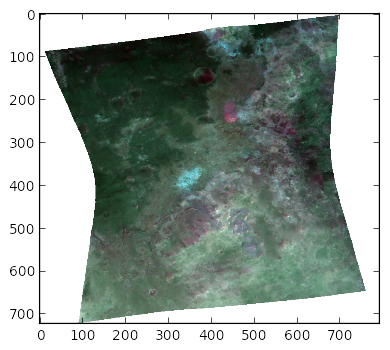

In [154]:
%matplotlib inline
import urllib2
import matplotlib.pyplot as plt

# create a file-like object from the url
f=urllib2.urlopen("http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20data%20in%20(frt0000abcb_07_if166l_trr3)%20return%20encode(%20{%20red:%20(int)(255%20/%20(max((data.band_233%20!=%2065535)%20*%20data.band_233)%20-%20min(data.band_233)))%20*%20(data.band_233%20-%20min(data.band_233));%20green:%20(int)(255%20/%20(max((data.band_13%20!=%2065535)%20*%20data.band_13)%20-%20min(data.band_13)))%20*%20(data.band_13%20-%20min(data.band_13));%20blue:%20(int)(255%20/%20(max((data.band_78%20!=%2065535)%20*%20data.band_78)%20-%20min(data.band_78)))%20*%20(data.band_78%20-%20min(data.band_78))%20;%20alpha:%20(data.band_100%20!=%2065535)%20*%20255},%20%22png%22,%20%22nodata=null%22)")

# read the image file in a numpy array
a = plt.imread(f)
plt.imshow(a)
plt.show()

In [155]:
#we declare the x axis
x_axis = [1.00135, 1.0079, 1.0144500000000001, 1.0209999999999999, 1.02755, 1.0341, 1.0406500000000001, 1.0471999999999999, 1.05375, 1.0603, 1.0668500000000001, 1.07341, 1.07996, 1.0865100000000001, 1.09307, 1.09962, 1.1061700000000001, 1.11273, 1.1192800000000001, 1.12584, 1.13239, 1.1389499999999999, 1.14551, 1.1520600000000001, 1.15862, 1.1651800000000001, 1.1717299999999999, 1.1782900000000001, 1.18485, 1.1914100000000001, 1.19797, 1.2045300000000001, 1.21109, 1.2176499999999999, 1.22421, 1.2307699999999999, 1.23733, 1.2438899999999999, 1.2504500000000001, 1.25701, 1.2635700000000001, 1.27014, 1.2766999999999999, 1.2832600000000001, 1.28983, 1.2963899999999999, 1.3029500000000001, 1.30952, 1.3160799999999999, 1.3226500000000001, 1.32921, 1.33578, 1.3423400000000001, 1.3489100000000001, 1.35548, 1.36205, 1.3686100000000001, 1.3751800000000001, 1.38175, 1.38832, 1.39489, 1.4014500000000001, 1.40802, 1.41459, 1.42116, 1.4277299999999999, 1.43431, 1.4408799999999999, 1.4474499999999999, 1.4540200000000001, 1.4605900000000001, 1.46716, 1.47374, 1.48031, 1.48688, 1.49346, 1.50003, 1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948, 1.54606, 1.55264, 1.55921, 1.56579, 1.57237, 1.5789500000000001, 1.58552, 1.5921000000000001, 1.5986800000000001, 1.6052599999999999, 1.6118399999999999, 1.61842, 1.625, 1.63158, 1.6381600000000001, 1.6447400000000001, 1.65133, 1.65791, 1.66449, 1.6710700000000001, 1.6776599999999999, 1.68424, 1.69082, 1.6974100000000001, 1.7039899999999999, 1.71058, 1.71716, 1.7237499999999999, 1.7303299999999999, 1.73692, 1.7435099999999999, 1.7500899999999999, 1.75668, 1.7632699999999999, 1.7698499999999999, 1.77644, 1.7830299999999999, 1.78962, 1.7962100000000001, 1.8028, 1.8093900000000001, 1.8159799999999999, 1.82257, 1.8291599999999999, 1.83575, 1.8423400000000001, 1.84893, 1.8555200000000001, 1.86212, 1.8687100000000001, 1.8753, 1.8818999999999999, 1.88849, 1.8950800000000001, 1.90168, 1.9082699999999999, 1.9148700000000001, 1.9214599999999999, 1.9280600000000001, 1.93465, 1.9412499999999999, 1.9478500000000001, 1.95444, 1.9610399999999999, 1.9676400000000001, 1.97424, 1.9808399999999999, 1.98743, 1.99403, 2.0006300000000001, 2.0072299999999998, 2.01383, 2.0204300000000002, 2.0270299999999999, 2.03363, 2.0402399999999998, 2.04684, 2.0534400000000002, 2.0600399999999999, 2.06664, 2.0732499999999998, 2.07985, 2.0864500000000001, 2.0930599999999999, 2.0996600000000001, 2.1062699999999999, 2.11287, 2.1194799999999998, 2.12608, 2.1326900000000002, 2.1393, 2.1459000000000001, 2.1525099999999999, 2.1591200000000002, 2.1657199999999999, 2.1723300000000001, 2.1789399999999999, 2.1855500000000001, 2.1921599999999999, 2.1987700000000001, 2.2053799999999999, 2.2119900000000001, 2.2185999999999999, 2.2252100000000001, 2.2318199999999999, 2.2384300000000001, 2.2450399999999999, 2.2516500000000002, 2.25827, 2.2648799999999998, 2.27149, 2.2780999999999998, 2.2847200000000001, 2.2913299999999999, 2.2979500000000002, 2.3045599999999999, 2.3111799999999998, 2.31779, 2.3244099999999999, 2.3310200000000001, 2.3376399999999999, 2.3442599999999998, 2.35087, 2.3574899999999999, 2.3641100000000002, 2.3707199999999999, 2.3773399999999998, 2.3839600000000001, 2.3905799999999999, 2.3972000000000002, 2.4038200000000001, 2.4104399999999999, 2.4170600000000002, 2.4236800000000001, 2.4302999999999999, 2.4369200000000002, 2.44354, 2.45017, 2.4567899999999998, 2.4634100000000001, 2.4700299999999999, 2.4766599999999999, 2.4832800000000002, 2.4899, 2.4965299999999999, 2.50312, 2.5097200000000002, 2.5163199999999999, 2.5229200000000001, 2.5295100000000001, 2.5361099999999999, 2.54271, 2.5493100000000002, 2.5559099999999999, 2.5625100000000001, 2.5691099999999998, 2.5757099999999999, 2.5823100000000001, 2.5889099999999998, 2.59551, 2.6021200000000002, 2.6087199999999999, 2.6153200000000001, 2.6219199999999998, 2.62853, 2.6351300000000002, 2.64174, 2.6483400000000001, 2.6549499999999999, 2.6615500000000001, 2.6681599999999999, 2.67476, 2.6813699999999998, 2.68798, 2.6945800000000002, 2.70119, 2.7606799999999998, 2.76729, 2.7738999999999998, 2.7805200000000001, 2.7871299999999999, 2.7937400000000001, 2.8003499999999999, 2.8069700000000002, 2.81358, 2.8201999999999998, 2.82681, 2.8334299999999999, 2.8400400000000001, 2.84666, 2.8532799999999998, 2.85989, 2.8665099999999999, 2.8731300000000002, 2.87975, 2.8863599999999998, 2.8929800000000001, 2.8996, 2.9062199999999998, 2.9128400000000001, 2.9194599999999999, 2.9260799999999998, 2.9327000000000001, 2.9393199999999999, 2.9459499999999998, 2.9525700000000001, 2.95919, 2.9658099999999998, 2.9724400000000002, 2.97906, 2.9856799999999999, 2.9923099999999998, 2.9989300000000001, 3.00556, 3.0121799999999999, 3.0188100000000002, 3.0254400000000001, 3.03206, 3.0386899999999999, 3.0453199999999998, 3.0519500000000002, 3.05857, 3.0651999999999999, 3.0718299999999998, 3.0784600000000002, 3.0850900000000001, 3.09172, 3.0983499999999999, 3.1049799999999999, 3.1116100000000002, 3.1182500000000002, 3.1248800000000001, 3.13151, 3.1381399999999999, 3.1447799999999999, 3.1514099999999998, 3.1580400000000002, 3.1646800000000002, 3.1713100000000001, 3.1779500000000001, 3.18458, 3.1912199999999999, 3.1978499999999999, 3.2044899999999998, 3.2111299999999998, 3.2177600000000002, 3.2244000000000002, 3.2310400000000001, 3.2376800000000001, 3.2443200000000001, 3.2509600000000001, 3.2576000000000001, 3.26424, 3.27088, 3.27752, 3.28416, 3.2907999999999999, 3.2974399999999999, 3.3040799999999999, 3.31073, 3.3173699999999999, 3.3240099999999999, 3.33066, 3.3372999999999999, 3.34395, 3.35059, 3.35724, 3.36388, 3.37053, 3.37717, 3.3838200000000001, 3.3904700000000001, 3.3971200000000001, 3.4037600000000001, 3.4104100000000002, 3.4170600000000002, 3.4237099999999998, 3.4303599999999999, 3.4370099999999999, 3.4436599999999999, 3.45031, 3.45696, 3.4636100000000001, 3.4702600000000001, 3.4769199999999998, 3.4835699999999998, 3.4902199999999999, 3.4968699999999999, 3.50353, 3.5101800000000001, 3.5168400000000002, 3.5234899999999998, 3.5301499999999999, 3.5367999999999999, 3.5434600000000001, 3.5501100000000001, 3.5567700000000002, 3.5634299999999999, 3.5700799999999999, 3.57674, 3.5834000000000001, 3.5900599999999998, 3.5967199999999999, 3.60338, 3.6100400000000001, 3.6166999999999998, 3.6233599999999999, 3.63002, 3.6366800000000001, 3.6433399999999998, 3.6499999999999999, 3.6566700000000001, 3.6633300000000002, 3.6699899999999999, 3.67665, 3.6833200000000001, 3.6899799999999998, 3.69665, 3.7033100000000001, 3.7099799999999998, 3.7166399999999999, 3.7233100000000001, 3.7299799999999999, 3.73664, 3.7433100000000001, 3.7499799999999999, 3.75665, 3.7633100000000002, 3.7699799999999999, 3.7766500000000001, 3.7833199999999998, 3.78999, 3.7966600000000001, 3.8033299999999999, 3.8100000000000001, 3.8166699999999998, 3.82335, 3.8300200000000002, 3.8366899999999999, 3.8433600000000001, 3.8500399999999999, 3.8567100000000001, 3.8633899999999999, 3.8700600000000001, 3.8767299999999998, 3.88341, 3.8900800000000002, 3.89676, 3.9034399999999998, 3.91011, 3.9167900000000002, 3.92347, 3.9301499999999998, 3.93682, 4.0]

#Those are coordinates in lat long of the pixels for the numerator
longitude_num = [73.318535,73.318184,73.317841,73.317497,73.317146,73.318466,73.318123,73.317780,73.317429,73.317085,73.318367,73.318024,73.317680,73.317329,73.316986]
latitude_num = [20.803997,20.803957,20.803917,20.803879,20.803839,20.804609,20.804571,20.804531,20.804491,20.804451,20.805292,20.805252,20.805214,20.805174,20.805134]

#Those are coordinates in lat long of the pixels for the denominator
longitude_denom = [73.322395,73.322029,73.321663,73.321297,73.320930,73.322342,73.321976,73.321609,73.321243,73.320877,73.322250,73.321884,73.321518,73.321152,73.320786]
latitude_denom = [20.773712,20.773676,20.773640,20.773603,20.773567,20.774399,20.774363,20.774326,20.774290,20.774254,20.775406,20.775370,20.775333,20.775297,20.775263]

#declare arrays for avg_num, _denom and ratio
avg_num = np.zeros(len(x_axis))
avg_denom = np.zeros(len(x_axis))
ratio = []

In [156]:
print('Computing Numerator...')
for i in range (0,len(longitude_num)):
    #data is stored in meters so we transform lat, long to meters
    r = 3396190
    cosOf0 = 1
    rho = (math.pi / 180)
    N = latitude_num[i] * r * rho
    E = longitude_num[i] * cosOf0 * r * rho
    #here you can select the coverage you want to query
    covID = "frt0000abcb_07_if166l_trr3"
    query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(" + covID + ")%20return%20encode(c[%20N(" + str(N) + 		":" + str(N) + "),%20E(" + str(E) + ":" + str(E) + ")%20],%20%22csv%22)"
    data = get_data(query)
    for x in range (0,len(data)):
        if data[x] == 65535 or math.isnan(data[x]):
            data[x] = 0
        avg_num[x] = avg_num[x] + data[x]

for n in range (0,len(avg_num)):
    avg_num[n] = avg_num[n]/len(longitude_num)

print('Computing Denominator...')
for i in range (0,len(longitude_denom)):
    #data is stored in meters so we transform lat, long to meters
    r = 3396190
    cosOf0 = 1
    rho = (math.pi / 180)
    N = latitude_denom[i] * r * rho
    E = longitude_denom[i] * cosOf0 * r * rho
    covID = "frt0000abcb_07_if166l_trr3"
    query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(" + covID + ")%20return%20encode(c[%20N(" + str(N) + 		":" + str(N) + "),%20E(" + str(E) + ":" + str(E) + ")%20],%20%22csv%22)"
    data = get_data(query)
    for x in range (0,len(data)):
        if data[x] == 65535 or math.isnan(data[x]):
            data[x] = 0
        avg_denom[x] = avg_denom[x] + data[x]

for n in range (0,len(avg_denom)):
    avg_denom[n] = avg_denom[n]/len(longitude_num)
    
print ('Ratio')
for j in range (0,len(avg_denom)):
    ratio.append(avg_num[j] / avg_denom[j])
    
print('Done')

Computing Numerator...
Computing Denominator...
Ratio
Done


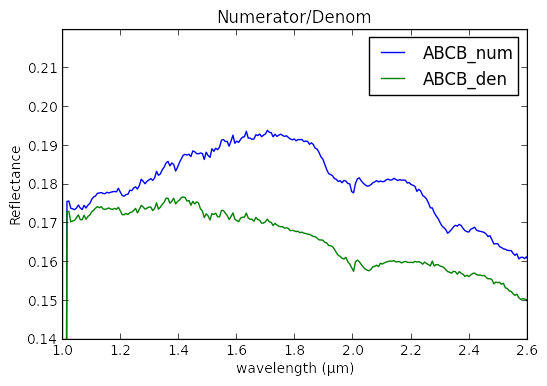

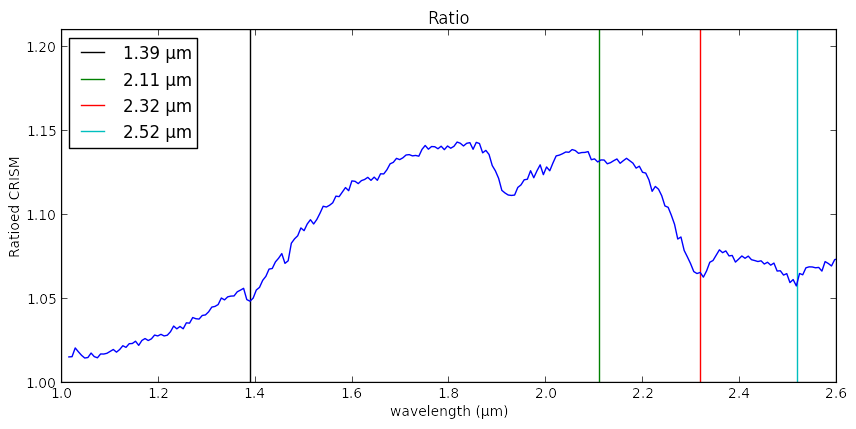

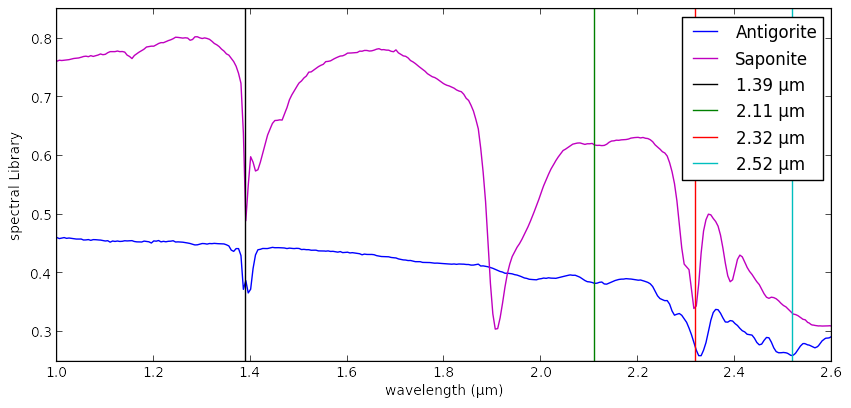

In [157]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlim(1, 2.6)
plt.ylim(0.14,0.22)
plt.title('Numerator/Denom')


plt.plot(x_axis,avg_num, '-', label="ABCB_num", color='b')
plt.plot(x_axis,avg_denom, '-', label="ABCB_den", color='g')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'Reflectance' )

plt.legend(loc='upper right')

##############################################
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(211)
plt.xlim(1, 2.6)
plt.ylim(1,1.21)
plt.title('Ratio')

plt.axvline(x=1.39, color='k',label='1.39 ' + u"\u03BC" + 'm')
plt.axvline(x=2.11, color='g',label='2.11 ' + u"\u03BC" + 'm')
plt.axvline(x=2.32, color='r',label='2.32 ' + u"\u03BC" + 'm')
plt.axvline(x=2.52, color='c',label='2.52 ' + u"\u03BC" + 'm')
plt.plot(x_axis,ratio, '-', color='b')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'Ratioed CRISM' )
plt.legend(loc='upper left')

##############################################
x_spec = [0.350000,0.352500,0.355000,0.357500,0.360000,0.362500,0.365000,0.367500,0.370000,0.372500,0.375000,0.377500,0.380000,0.382500,0.385000,0.387500,0.390000,0.392500,0.395000,0.397500,0.400000,0.402500,0.405000,0.407500,0.410000,0.412500,0.415000,0.417500,0.420000,0.422500,0.425000,0.427500,0.430000,0.432500,0.435000,0.437500,0.440000,0.442500,0.445000,0.447500,0.450000,0.452500,0.455000,0.457500,0.460000,0.462500,0.465000,0.467500,0.470000,0.472500,0.475000,0.477500,0.480000,0.482500,0.485000,0.487500,0.490000,0.492500,0.495000,0.497500,0.500000,0.502500,0.505000,0.507500,0.510000,0.512500,0.515000,0.517500,0.520000,0.522500,0.525000,0.527500,0.530000,0.532500,0.535000,0.537500,0.540000,0.542500,0.545000,0.547500,0.550000,0.552500,0.555000,0.557500,0.560000,0.562500,0.565000,0.567500,0.570000,0.572500,0.575000,0.577500,0.580000,0.582500,0.585000,0.587500,0.590000,0.592500,0.595000,0.597500,0.600000,0.602500,0.605000,0.607500,0.610000,0.612500,0.615000,0.617500,0.620000,0.622500,0.625000,0.627500,0.630000,0.632500,0.635000,0.637500,0.640000,0.642500,0.645000,0.647500,0.650000,0.652500,0.655000,0.657500,0.660000,0.662500,0.665000,0.667500,0.670000,0.672500,0.675000,0.677500,0.680000,0.682500,0.685000,0.687500,0.690000,0.692500,0.695000,0.697500,0.700000,0.702500,0.705000,0.707500,0.710000,0.712500,0.715000,0.717500,0.720000,0.722500,0.725000,0.727500,0.730000,0.732500,0.735000,0.737500,0.740000,0.742500,0.745000,0.747500,0.750000,0.752500,0.755000,0.757500,0.760000,0.762500,0.765000,0.767500,0.770000,0.772500,0.775000,0.777500,0.780000,0.782500,0.785000,0.787500,0.790000,0.792500,0.795000,0.797500,0.800000,0.802500,0.805000,0.807500,0.810000,0.812500,0.815000,0.817500,0.820000,0.822500,0.825000,0.827500,0.830000,0.832500,0.835000,0.837500,0.840000,0.842500,0.845000,0.847500,0.850000,0.852500,0.855000,0.857500,0.860000,0.862500,0.865000,0.867500,0.870000,0.872500,0.875000,0.877500,0.880000,0.882500,0.885000,0.887500,0.890000,0.892500,0.895000,0.897500,0.899999,0.902499,0.904999,0.907499,0.909999,0.912499,0.914999,0.917499,0.919999,0.922499,0.924999,0.927499,0.929999,0.932499,0.934999,0.937499,0.939999,0.942499,0.944999,0.947499,0.949999,0.952499,0.954999,0.957499,0.959999,0.962499,0.964999,0.967499,0.969999,0.972499,0.974999,0.977499,0.979999,0.982499,0.984999,0.987499,0.989999,0.992499,0.994999,0.997499,0.999999,1.002500,1.005000,1.007500,1.010000,1.012500,1.015000,1.017500,1.020000,1.022500,1.025000,1.027500,1.030000,1.032500,1.035000,1.037500,1.040000,1.042500,1.045000,1.047500,1.050000,1.052500,1.055000,1.057500,1.060000,1.062500,1.065000,1.067500,1.070000,1.072500,1.075000,1.077500,1.080000,1.082500,1.085000,1.087500,1.090000,1.092500,1.095000,1.097500,1.100000,1.102500,1.105000,1.107500,1.110000,1.112500,1.115000,1.117500,1.120000,1.122500,1.125000,1.127500,1.130000,1.132500,1.135000,1.137500,1.140000,1.142500,1.145000,1.147500,1.150000,1.152500,1.155000,1.157500,1.160000,1.162500,1.165000,1.167500,1.170000,1.172500,1.175000,1.177500,1.180000,1.182500,1.185000,1.187500,1.190000,1.192500,1.195000,1.197500,1.200000,1.202500,1.205000,1.207500,1.210000,1.212500,1.215000,1.217500,1.220000,1.222500,1.225000,1.227500,1.230000,1.232500,1.235000,1.237500,1.240000,1.242500,1.245010,1.247510,1.250010,1.252510,1.255010,1.257510,1.260010,1.262510,1.265010,1.267510,1.270010,1.272510,1.275010,1.277510,1.280010,1.282510,1.285010,1.287510,1.290010,1.292510,1.295010,1.297510,1.300010,1.302510,1.305010,1.307510,1.310010,1.312510,1.315010,1.317510,1.320010,1.322510,1.325010,1.327510,1.330010,1.332510,1.335010,1.337510,1.340010,1.342510,1.345010,1.347510,1.350010,1.352510,1.355010,1.357510,1.360010,1.362510,1.365010,1.367510,1.370010,1.372510,1.375010,1.377510,1.380010,1.382510,1.385010,1.387510,1.390010,1.392510,1.395010,1.397510,1.400010,1.402510,1.405010,1.407510,1.410010,1.412510,1.415010,1.417510,1.420010,1.422510,1.425010,1.427510,1.430010,1.432510,1.435010,1.437510,1.440010,1.442510,1.445010,1.447510,1.450010,1.452510,1.455010,1.457510,1.460010,1.462510,1.465010,1.467510,1.470010,1.472510,1.475010,1.477510,1.480010,1.482510,1.485010,1.487510,1.490010,1.492510,1.495010,1.497510,1.500010,1.502510,1.505010,1.507510,1.510010,1.512510,1.515010,1.517510,1.520010,1.522510,1.525010,1.527510,1.530010,1.532510,1.535010,1.537510,1.540010,1.542510,1.545010,1.547510,1.550010,1.552510,1.555010,1.557510,1.560010,1.562510,1.565010,1.567510,1.570010,1.572510,1.575010,1.577510,1.580010,1.582510,1.585010,1.587510,1.590010,1.592510,1.595010,1.597510,1.600010,1.602510,1.605010,1.607510,1.610010,1.612510,1.615010,1.617510,1.620010,1.622510,1.625010,1.627510,1.630010,1.632510,1.635010,1.637510,1.640010,1.642510,1.645010,1.647510,1.650010,1.652510,1.655010,1.657510,1.660010,1.662510,1.665010,1.667510,1.670010,1.672510,1.675010,1.677510,1.680010,1.682520,1.685020,1.687520,1.690020,1.692520,1.695020,1.697520,1.700020,1.702520,1.705020,1.707520,1.710020,1.712520,1.715020,1.717520,1.720020,1.722520,1.725020,1.727520,1.730020,1.732520,1.735020,1.737520,1.740020,1.742520,1.745020,1.747520,1.750020,1.752520,1.755020,1.757520,1.760020,1.762520,1.765020,1.767520,1.770020,1.772520,1.775020,1.777520,1.780020,1.782520,1.785020,1.787520,1.790020,1.792520,1.795020,1.797520,1.800020,1.802520,1.805020,1.807520,1.810020,1.812520,1.815020,1.817520,1.820020,1.822520,1.825020,1.827520,1.830020,1.832520,1.835020,1.837520,1.840020,1.842520,1.845020,1.847520,1.850020,1.852520,1.855020,1.857520,1.860020,1.862520,1.865020,1.867520,1.870020,1.872520,1.875020,1.877520,1.880020,1.882520,1.885020,1.887520,1.890020,1.892520,1.895020,1.897520,1.900020,1.902520,1.905020,1.907520,1.910020,1.912520,1.915020,1.917520,1.920020,1.922520,1.925020,1.927520,1.930020,1.932520,1.935020,1.937520,1.940020,1.942520,1.945020,1.947520,1.950020,1.952520,1.955020,1.957520,1.960020,1.962520,1.965020,1.967520,1.970020,1.972520,1.975020,1.977520,1.980020,1.982520,1.985020,1.987520,1.990020,1.992520,1.995020,1.997520,2.000020,2.002520,2.005020,2.007520,2.010020,2.012520,2.015020,2.017520,2.020020,2.022520,2.025020,2.027520,2.030020,2.032520,2.035020,2.037520,2.040020,2.042520,2.045020,2.047520,2.050020,2.052520,2.055020,2.057520,2.060020,2.062520,2.065020,2.067520,2.070020,2.072520,2.075020,2.077520,2.080020,2.082520,2.085020,2.087520,2.090020,2.092520,2.095020,2.097520,2.100020,2.102520,2.105020,2.107520,2.110020,2.112520,2.115020,2.117520,2.120020,2.122520,2.125030,2.127530,2.130030,2.132530,2.135030,2.137530,2.140030,2.142530,2.145030,2.147530,2.150030,2.152530,2.155030,2.157530,2.160030,2.162530,2.165030,2.167530,2.170030,2.172530,2.175030,2.177530,2.180030,2.182530,2.185030,2.187530,2.190030,2.192530,2.195030,2.197530,2.200030,2.202530,2.205030,2.207530,2.210030,2.212530,2.215030,2.217530,2.220030,2.222530,2.225030,2.227530,2.230030,2.232530,2.235030,2.237530,2.240030,2.242530,2.245030,2.247530,2.250030,2.252530,2.255030,2.257530,2.260030,2.262530,2.265030,2.267530,2.270030,2.272530,2.275030,2.277530,2.280030,2.282530,2.285030,2.287530,2.290030,2.292530,2.295030,2.297530,2.300030,2.302530,2.305030,2.307530,2.310030,2.312530,2.315030,2.317530,2.320030,2.322530,2.325030,2.327530,2.330030,2.332530,2.335030,2.337530,2.340030,2.342530,2.345030,2.347530,2.350030,2.352530,2.355030,2.357530,2.360030,2.362530,2.365030,2.367530,2.370030,2.372530,2.375030,2.377530,2.380030,2.382530,2.385030,2.387530,2.390030,2.392530,2.395030,2.397530,2.400030,2.402530,2.405030,2.407530,2.410030,2.412530,2.415030,2.417530,2.420030,2.422530,2.425030,2.427530,2.430030,2.432530,2.435030,2.437530,2.440030,2.442530,2.445030,2.447530,2.450030,2.452530,2.455030,2.457530,2.460030,2.462530,2.465030,2.467530,2.470030,2.472530,2.475030,2.477530,2.480030,2.482530,2.485030,2.487530,2.490030,2.492530,2.495030,2.497530,2.500030,2.502530,2.505030,2.507530,2.510030,2.512530,2.515030,2.517530,2.520030,2.522530,2.525030,2.527530,2.530030,2.532530,2.535030,2.537530,2.540030,2.542530,2.545030,2.547530,2.550030,2.552530,2.555030,2.557530,2.560030,2.562540,2.565040,2.567540,2.570040,2.572540,2.575040,2.577540,2.580040,2.582540,2.585040,2.587540,2.590040,2.592540,2.595040,2.597540,2.600040,2.602540,2.605040,2.607540,2.610040,2.612540,2.615040,2.617540,2.620040,2.622540,2.625040,2.627540,2.630040,2.632540,2.635040,2.637540,2.640040,2.642540,2.645040,2.647540,2.650040,2.652540,2.655040,2.657540,2.660040,2.662540,2.665040,2.667540,2.670040,2.672540,2.675040,2.677540,2.680040,2.682540,2.685040,2.687540,2.690040,2.692540,2.695040,2.697540,2.700040,2.702540,2.705040,2.707540,2.710040,2.712540,2.715040,2.717540,2.720040,2.722540,2.725040,2.727540,2.730040,2.732540,2.735040,2.737540,2.740040,2.742540,2.745040,2.747540,2.750040,2.752540,2.755040,2.757540,2.760040,2.762540,2.765040,2.767540,2.770040,2.772540,2.775040,2.777540,2.780040,2.782540,2.785040,2.787540,2.790040,2.792540,2.795040,2.797540,2.800040,2.802540,2.805040,2.807540,2.810040,2.812540,2.815040,2.817540,2.820040,2.822540,2.825040,2.827540,2.830040,2.832540,2.835040,2.837540,2.840040,2.842540,2.845040,2.847540,2.850040,2.852540,2.855040,2.857540,2.860040,2.862540,2.865040,2.867540,2.870040,2.872540,2.875040,2.877540,2.880040,2.882540,2.885040,2.887540,2.890040,2.892540,2.895040,2.897540,2.900040,2.902540,2.905040,2.907540,2.910040,2.912540,2.915040,2.917540,2.920040,2.922540,2.925040,2.927540,2.930040,2.932540,2.935040,2.937540,2.940040,2.942540,2.945040,2.947540,2.950040,2.952540,2.955040,2.957540,2.960040,2.962540,2.965040,2.967540,2.970040,2.972540,2.975040,2.977540,2.980040,2.982540,2.985040,2.987540,2.990040,2.992540,2.995040,2.997550,3.000050,3.002550,3.005050,3.007550,3.010050,3.012550,3.015050,3.017550,3.020050,3.022550,3.025050,3.027550,3.030050,3.032550,3.035050,3.037550,3.040050,3.042550,3.045050,3.047550,3.050050,3.052550,3.055050,3.057550,3.060050,3.062550,3.065050,3.067550,3.070050,3.072550,3.075050,3.077550,3.080050,3.082550,3.085050,3.087550,3.090050,3.092550,3.095050,3.097550,3.100050,3.102550,3.105050,3.107550,3.110050,3.112550,3.115050,3.117550,3.120050,3.122550,3.125050,3.127550,3.130050,3.132550,3.135050,3.137550,3.140050,3.142550,3.145050,3.147550,3.150050,3.152550,3.155050,3.157550,3.160050,3.162550,3.165050,3.167550,3.170050,3.172550,3.175050,3.177550,3.180050,3.182550,3.185050,3.187550,3.190050,3.192550,3.195050,3.197550,3.200050,3.202550,3.205050,3.207550,3.210050,3.212550,3.215050,3.217550,3.220050,3.222550,3.225050,3.227550,3.230050,3.232550,3.235050,3.237550,3.240050,3.242550,3.245050,3.247550,3.250050,3.252550,3.255050,3.257550,3.260050,3.262550,3.265050,3.267550,3.270050,3.272550,3.275050,3.277550,3.280050,3.282550,3.285050,3.287550,3.290050,3.292550,3.295050,3.297550,3.300050,3.302550,3.305050,3.307550,3.310050,3.312550,3.315050,3.317550,3.320050,3.322550,3.325050,3.327550,3.330050,3.332550,3.335050,3.337550,3.340050,3.342550,3.345050,3.347550,3.350050,3.352550,3.355050,3.357550,3.360050,3.362550,3.365050,3.367550,3.370050,3.372550,3.375050,3.377550,3.380050,3.382550,3.385050,3.387550,3.390050,3.392550,3.395050,3.397550,3.400050,3.402550,3.405050,3.407550,3.410050,3.412550,3.415050,3.417550,3.420050,3.422550,3.425050,3.427550,3.430050,3.432550,3.435060,3.437560,3.440060,3.442560,3.445060,3.447560,3.450060,3.452560,3.455060,3.457560,3.460060,3.462560,3.465060,3.467560,3.470060,3.472560,3.475060,3.477560,3.480060,3.482560,3.485060,3.487560,3.490060,3.492560,3.495060,3.497560,3.500060,3.502560,3.505060,3.507560,3.510060,3.512560,3.515060,3.517560,3.520060,3.522560,3.525060,3.527560,3.530060,3.532560,3.535060,3.537560,3.540060,3.542560,3.545060,3.547560,3.550060,3.552560,3.555060,3.557560,3.560060,3.562560,3.565060,3.567560,3.570060,3.572560,3.575060,3.577560,3.580060,3.582560,3.585060,3.587560,3.590060,3.592560,3.595060,3.597560,3.600060,3.602560,3.605060,3.607560,3.610060,3.612560,3.615060,3.617560,3.620060,3.622560,3.625060,3.627560,3.630060,3.632560,3.635060,3.637560,3.640060,3.642560,3.645060,3.647560,3.650060,3.652560,3.655060,3.657560,3.660060,3.662560,3.665060,3.667560,3.670060,3.672560,3.675060,3.677560,3.680060,3.682560,3.685060,3.687560,3.690060,3.692560,3.695060,3.697560,3.700060,3.702560,3.705060,3.707560,3.710060,3.712560,3.715060,3.717560,3.720060,3.722560,3.725060,3.727560,3.730060,3.732560,3.735060,3.737560,3.740060,3.742560,3.745060,3.747560,3.750060,3.752560,3.755060,3.757560,3.760060,3.762560,3.765060,3.767560,3.770060,3.772560,3.775060,3.777560,3.780060,3.782560,3.785060,3.787560,3.790060,3.792560,3.795060,3.797560,3.800060,3.802560,3.805060,3.807560,3.810060,3.812560,3.815060,3.817560,3.820060,3.822560,3.825060,3.827560,3.830060,3.832560,3.835060,3.837560,3.840060,3.842560,3.845060,3.847560,3.850060,3.852560,3.855060,3.857560,3.860060,3.862560,3.865060,3.867560,3.870060,3.872570,3.875070,3.877570,3.880070,3.882570,3.885070,3.887570,3.890070,3.892570,3.895070,3.897570,3.900070,3.902570,3.905070,3.907570,3.910070,3.912570,3.915070,3.917570,3.920070,3.922570,3.925070,3.927570,3.930070,3.932570,3.935070,3.937570,3.940070,3.942570,3.945070,3.947570,3.950070,3.952570,3.955070,3.957570,3.960070,3.962570,3.965070,3.967570,3.970070,3.972570,3.975070,3.977570,3.980070,3.982570,3.985070,3.987570,3.990070,3.992570,3.995070,3.997570,4.000070,4.002570,4.005070,4.007570,4.010070,4.012570,4.015070,4.017570,4.020070,4.022570,4.025070,4.027570,4.030070,4.032570,4.035070,4.037570,4.040070,4.042570,4.045070,4.047570,4.050070,4.052570,4.055070,4.057570,4.060070,4.062570,4.065070,4.067570,4.070070,4.072570,4.075070,4.077570,4.080070,4.082570,4.085070,4.087570,4.090070,4.092570,4.095070,4.097570,4.100070]
antigorite = [0.429597,0.434891,0.440185,0.444291,0.448397,0.449368,0.450338,0.453405,0.456473,0.456666,0.456860,0.457700,0.458539,0.458264,0.457990,0.459689,0.461388,0.464172,0.466956,0.467956,0.468956,0.470192,0.471429,0.469952,0.468474,0.468652,0.468830,0.468305,0.467780,0.468388,0.468996,0.468855,0.468714,0.468564,0.468414,0.468717,0.469020,0.470883,0.472745,0.472266,0.471787,0.473715,0.475642,0.476391,0.477141,0.478345,0.479548,0.482204,0.484861,0.487498,0.490135,0.490240,0.490345,0.492453,0.494562,0.493694,0.492826,0.493154,0.493482,0.493381,0.493280,0.493923,0.494565,0.495583,0.496601,0.495316,0.494031,0.493654,0.493276,0.493359,0.493442,0.493733,0.494025,0.493299,0.492572,0.492996,0.493420,0.492979,0.492538,0.492413,0.492288,0.493056,0.493824,0.492373,0.490921,0.491482,0.492043,0.492389,0.492735,0.491543,0.490350,0.490431,0.490513,0.490701,0.490890,0.490151,0.489411,0.489231,0.489052,0.488932,0.488813,0.488670,0.488526,0.488651,0.488775,0.487953,0.487130,0.486649,0.486169,0.486203,0.486236,0.485314,0.484392,0.483559,0.482727,0.482593,0.482459,0.482904,0.483348,0.482233,0.481117,0.480719,0.480321,0.480130,0.479940,0.479878,0.479815,0.480013,0.480212,0.478062,0.475912,0.475909,0.475905,0.475329,0.474753,0.474471,0.474189,0.473731,0.473272,0.473574,0.473876,0.473306,0.472736,0.472907,0.473077,0.471889,0.470702,0.470400,0.470098,0.470767,0.471437,0.470806,0.470174,0.470112,0.470050,0.469643,0.469235,0.469212,0.469189,0.469083,0.468978,0.469270,0.469563,0.469425,0.469287,0.467650,0.466013,0.466839,0.467665,0.467907,0.468149,0.468046,0.467943,0.467649,0.467354,0.467269,0.467184,0.467584,0.467983,0.465952,0.463921,0.464348,0.464775,0.464871,0.464968,0.464950,0.464932,0.464818,0.464704,0.464754,0.464804,0.464575,0.464347,0.463408,0.462470,0.462646,0.462821,0.462326,0.461832,0.461904,0.461976,0.462312,0.462647,0.463075,0.463503,0.463201,0.462899,0.462470,0.462041,0.462252,0.462463,0.462220,0.461978,0.461430,0.460883,0.461230,0.461576,0.461390,0.461204,0.460947,0.460689,0.460676,0.460662,0.461251,0.461840,0.461736,0.461631,0.462091,0.462551,0.462850,0.463149,0.462805,0.462461,0.462684,0.462907,0.462528,0.462148,0.460706,0.459264,0.460175,0.461087,0.460414,0.459741,0.460731,0.461721,0.461939,0.462157,0.462504,0.462851,0.462724,0.462597,0.462525,0.462452,0.462044,0.461635,0.461877,0.462119,0.460753,0.459386,0.460244,0.461103,0.460228,0.459354,0.459757,0.460159,0.460605,0.461051,0.460406,0.459761,0.460051,0.460341,0.460014,0.459688,0.459356,0.459024,0.458791,0.458558,0.458494,0.458429,0.458538,0.458646,0.457786,0.456926,0.457007,0.457089,0.457373,0.457657,0.457013,0.456368,0.456972,0.457577,0.457522,0.457467,0.457218,0.456969,0.456899,0.456829,0.456395,0.455961,0.455594,0.455227,0.455477,0.455727,0.454495,0.453262,0.454249,0.455236,0.454863,0.454490,0.454852,0.455213,0.454836,0.454460,0.454605,0.454750,0.455207,0.455665,0.455509,0.455354,0.455472,0.455590,0.455714,0.455838,0.455114,0.454391,0.454080,0.453770,0.453772,0.453773,0.453634,0.453495,0.454281,0.455067,0.454737,0.454406,0.454141,0.453876,0.452841,0.451805,0.453602,0.455399,0.455163,0.454926,0.455476,0.456026,0.454899,0.453771,0.454223,0.454674,0.454295,0.453915,0.454323,0.454731,0.454840,0.454949,0.455314,0.455679,0.454595,0.453510,0.453638,0.453766,0.453669,0.453571,0.453382,0.453192,0.452893,0.452594,0.452209,0.451824,0.451408,0.450990,0.450306,0.449622,0.449074,0.448528,0.448629,0.448731,0.449328,0.449924,0.450434,0.450942,0.450842,0.450740,0.450345,0.449953,0.450449,0.450943,0.450826,0.450711,0.450951,0.451190,0.450961,0.450733,0.450669,0.450604,0.450447,0.450290,0.450266,0.450240,0.449512,0.448782,0.447808,0.446823,0.443266,0.439720,0.438640,0.437573,0.439936,0.442289,0.442299,0.442286,0.436433,0.430488,0.401627,0.372909,0.380362,0.387743,0.377239,0.366790,0.369908,0.373084,0.390744,0.408378,0.419955,0.431502,0.435904,0.440291,0.440696,0.441102,0.441805,0.442505,0.442416,0.442327,0.442367,0.442409,0.442865,0.443321,0.443864,0.444404,0.444102,0.443801,0.443870,0.443938,0.443872,0.443806,0.443725,0.443644,0.443466,0.443287,0.442811,0.442339,0.442736,0.443131,0.442850,0.442570,0.442458,0.442347,0.442558,0.442767,0.442635,0.442500,0.441586,0.440676,0.440847,0.441017,0.440727,0.440438,0.440459,0.440477,0.439987,0.439499,0.439580,0.439661,0.439619,0.439575,0.438980,0.438388,0.438379,0.438370,0.438424,0.438476,0.438185,0.437896,0.438139,0.438379,0.437917,0.437456,0.437556,0.437654,0.437311,0.436968,0.436598,0.436231,0.436731,0.437227,0.436355,0.435486,0.435605,0.435725,0.435959,0.436189,0.435534,0.434882,0.435134,0.435384,0.435067,0.434751,0.434455,0.434160,0.433856,0.433550,0.432660,0.431775,0.432369,0.432960,0.432653,0.432348,0.432298,0.432248,0.432294,0.432339,0.432088,0.431836,0.431074,0.430314,0.429954,0.429594,0.429197,0.428801,0.428739,0.428677,0.428657,0.428637,0.428486,0.428331,0.427766,0.427204,0.426921,0.426639,0.426518,0.426390,0.425572,0.424757,0.424341,0.423925,0.423486,0.423050,0.422928,0.422802,0.422363,0.421928,0.421989,0.422045,0.421521,0.420997,0.420518,0.420043,0.420028,0.420013,0.420014,0.420009,0.419395,0.418785,0.418759,0.418734,0.418715,0.418696,0.418613,0.418529,0.418253,0.417977,0.417720,0.417467,0.417534,0.417598,0.417385,0.417173,0.417049,0.416925,0.416739,0.416554,0.416392,0.416232,0.416173,0.416112,0.415916,0.415724,0.415926,0.416125,0.415812,0.415504,0.415791,0.416075,0.415946,0.415818,0.415805,0.415790,0.415516,0.415245,0.415220,0.415192,0.414691,0.414194,0.414221,0.414251,0.414606,0.414963,0.415397,0.415815,0.414224,0.412647,0.412759,0.412867,0.412474,0.412081,0.411699,0.411316,0.410706,0.410095,0.409408,0.408719,0.407839,0.406959,0.405996,0.405033,0.404176,0.403322,0.402822,0.402318,0.401304,0.400298,0.400325,0.400350,0.400148,0.399944,0.399608,0.399269,0.398607,0.397948,0.397570,0.397191,0.396502,0.395814,0.395004,0.394193,0.393248,0.392308,0.391929,0.391547,0.390820,0.390097,0.389865,0.389634,0.389539,0.389444,0.389285,0.389133,0.389835,0.390533,0.390823,0.391114,0.391624,0.392127,0.391868,0.391615,0.392104,0.392587,0.392290,0.391995,0.391972,0.391948,0.391795,0.391648,0.392130,0.392612,0.393113,0.393615,0.394150,0.394685,0.395198,0.395712,0.396282,0.396849,0.397156,0.397457,0.397133,0.396812,0.396871,0.396923,0.396136,0.395348,0.394416,0.393481,0.392087,0.390694,0.389330,0.387968,0.386966,0.385970,0.385753,0.385533,0.385070,0.384605,0.383821,0.383045,0.383218,0.383396,0.384121,0.384842,0.385113,0.385361,0.383714,0.382084,0.381903,0.381736,0.382647,0.383559,0.384484,0.385409,0.386377,0.387341,0.387961,0.388580,0.389139,0.389695,0.389981,0.390264,0.390309,0.390358,0.390730,0.391095,0.390854,0.390614,0.390548,0.390479,0.390110,0.389743,0.389515,0.389284,0.388875,0.388472,0.388647,0.388812,0.388249,0.387683,0.386936,0.386189,0.385481,0.384766,0.383540,0.382300,0.380004,0.377688,0.373799,0.369908,0.365894,0.361901,0.359541,0.357198,0.356238,0.355279,0.354448,0.353628,0.353711,0.353756,0.350707,0.347625,0.341810,0.336023,0.332419,0.328869,0.329705,0.330538,0.331129,0.331694,0.330222,0.328732,0.325783,0.322833,0.319805,0.316755,0.311860,0.306957,0.301387,0.295806,0.289356,0.282903,0.276136,0.269392,0.264649,0.259962,0.259917,0.259927,0.264538,0.269171,0.275632,0.282127,0.291295,0.300472,0.310337,0.320164,0.326786,0.333360,0.336056,0.338715,0.338454,0.338161,0.335219,0.332265,0.328241,0.324223,0.320749,0.317314,0.317175,0.317053,0.318376,0.319679,0.319308,0.318916,0.316750,0.314591,0.312969,0.311338,0.308897,0.306461,0.304436,0.302424,0.301416,0.300397,0.298395,0.296413,0.296055,0.295697,0.295357,0.294990,0.292374,0.289746,0.286080,0.282433,0.280386,0.278372,0.278999,0.279657,0.282859,0.286053,0.288528,0.290971,0.290687,0.290363,0.286673,0.282969,0.278088,0.273227,0.270008,0.266815,0.265842,0.264881,0.264902,0.264925,0.265157,0.265382,0.265186,0.264840,0.264275,0.263230,0.261949,0.260566,0.260224,0.260748,0.262246,0.264197,0.267143,0.269998,0.273178,0.276284,0.278406,0.280317,0.280623,0.280181,0.279150,0.278300,0.278056,0.277215,0.276152,0.274972,0.274197,0.273290,0.274229,0.275151,0.277101,0.279890,0.282872,0.285396,0.286818,0.288528,0.289707,0.289829,0.289989,0.290463,0.291742,0.292743,0.293707,0.294516,0.294970,0.294619,0.294258,0.293488,0.292377,0.292307,0.292194,0.292167,0.291468,0.290966,0.289593,0.288866,0.287269,0.285606,0.283507,0.281913,0.279425,0.276312,0.272323,0.269237,0.266583,0.264761,0.263720,0.261840,0.259887,0.255934,0.250070,0.241786,0.230138,0.217301,0.200935,0.180334,0.155571,0.132976,0.113066,0.093743,0.075838,0.058769,0.043756,0.034473,0.031104,0.028850,0.027178,0.025587,0.024601,0.024692,0.026271,0.027759,0.029884,0.031911,0.033551,0.034555,0.035200,0.036463,0.039406,0.043157,0.046164,0.047727,0.053062,0.060820,0.066532,0.065725,0.063161,0.063937,0.069011,0.075273,0.079975,0.082931,0.084043,0.084536,0.085851,0.088385,0.090047,0.090962,0.091738,0.092893,0.094130,0.095973,0.097999,0.100267,0.102600,0.105041,0.107562,0.110184,0.113248,0.116284,0.119633,0.123274,0.126580,0.129774,0.132975,0.136168,0.138466,0.140648,0.143019,0.144943,0.146339,0.147761,0.149486,0.150765,0.152340,0.153525,0.154632,0.156299,0.157671,0.159015,0.160148,0.160905,0.161913,0.163176,0.164158,0.164848,0.165646,0.166463,0.167143,0.167979,0.168812,0.169732,0.170468,0.171356,0.172236,0.172903,0.173452,0.174390,0.174850,0.175462,0.176384,0.177321,0.178497,0.179590,0.180728,0.182015,0.183550,0.184450,0.185357,0.186649,0.187725,0.188561,0.189868,0.191035,0.192183,0.193252,0.194015,0.195083,0.196057,0.196955,0.197915,0.198979,0.199783,0.200671,0.201611,0.202205,0.202759,0.203647,0.204174,0.204629,0.205165,0.205721,0.206086,0.206674,0.207292,0.207989,0.208740,0.209435,0.210152,0.210864,0.211399,0.211555,0.211909,0.212398,0.212532,0.212464,0.212719,0.212820,0.213027,0.213138,0.213227,0.213520,0.213597,0.214044,0.214424,0.215151,0.216290,0.217115,0.217682,0.218283,0.218883,0.219577,0.220340,0.220778,0.221414,0.222026,0.222502,0.222777,0.222989,0.223215,0.224008,0.224632,0.225562,0.226336,0.227199,0.227988,0.228573,0.229331,0.229967,0.230203,0.230519,0.231015,0.231358,0.231667,0.232232,0.232692,0.233467,0.234333,0.235275,0.236294,0.237425,0.238504,0.239505,0.240420,0.241161,0.242073,0.242776,0.243335,0.243778,0.244227,0.244681,0.245062,0.245701,0.246378,0.246934,0.247319,0.247786,0.248362,0.248779,0.249157,0.249484,0.249948,0.250092,0.250063,0.250076,0.250075,0.250204,0.250118,0.249569,0.249072,0.248588,0.247659,0.246620,0.245653,0.244672,0.243736,0.242965,0.242454,0.242007,0.241937,0.242031,0.242090,0.242668,0.243328,0.243732,0.244028,0.244491,0.244971,0.245254,0.245283,0.245280,0.245211,0.245157,0.245137,0.245139,0.244840,0.244531,0.244442,0.244453,0.244452,0.244287,0.244405,0.244771,0.245090,0.245422,0.245968,0.246665,0.247306,0.247947,0.248456,0.249014,0.249786,0.250411,0.251057,0.251644,0.252169,0.252688,0.253325,0.253901,0.254377,0.255061,0.255663,0.256219,0.256759,0.257277,0.257929,0.258397,0.258800,0.259254,0.259743,0.260181,0.260630,0.261022,0.261566,0.262076,0.262498,0.262900,0.263257,0.263594,0.263807,0.263978,0.264377,0.264795,0.265027,0.265201,0.265429,0.265568,0.265706,0.266065,0.266474,0.266848,0.267178,0.267517,0.267806,0.268048,0.268309,0.268681,0.269181,0.269601,0.269823,0.270154,0.270614,0.271021,0.271308,0.271714,0.272051,0.272403,0.272689,0.272822,0.273026,0.273284,0.273395,0.273419,0.273451,0.273711,0.274072,0.274362,0.274630,0.274896,0.275193,0.275479,0.275916,0.276361,0.276694,0.277163,0.277710,0.278149,0.278565,0.278939,0.279259,0.279590,0.280009,0.280477,0.280993,0.281516,0.282058,0.282571,0.283001,0.283413,0.283781,0.284052,0.284326,0.284696,0.285018,0.285310,0.285594,0.285940,0.286218,0.286482,0.286713,0.286886,0.286926,0.287235,0.287629,0.287818,0.287798,0.288024,0.288354,0.288514,0.288629,0.288890,0.289144,0.289297,0.289386,0.289529,0.289695,0.289849,0.290047,0.290269,0.290399,0.290495,0.290507,0.290615,0.290835,0.291073,0.291309,0.291515,0.291742,0.292034,0.292311,0.292441,0.292588,0.292826,0.292935,0.293052,0.293187,0.293287,0.293332,0.293307,0.293307,0.293442,0.293679,0.293897,0.294017,0.294063,0.294137,0.294096,0.293852,0.293551,0.293171,0.292774,0.292349,0.291804,0.291531,0.291687,0.292095,0.292654,0.293309,0.294032,0.294719,0.295246,0.295603,0.295857,0.296103,0.296470,0.296812,0.297099,0.297233,0.297277,0.297393,0.297626,0.297861,0.298055,0.298242,0.298466,0.298697,0.298834,0.298974,0.299111,0.299322,0.299403,0.299465,0.299569,0.299720,0.299911,0.300093,0.300218,0.300306,0.300436,0.300650,0.300840,0.300907,0.301013,0.301192,0.301395,0.301564,0.301685,0.301784,0.301863,0.301991,0.302123,0.302299,0.302445,0.302576,0.302701,0.302798,0.302864,0.302919,0.303010,0.303184,0.303359,0.303439,0.303480,0.303582,0.303734,0.303816,0.303863,0.304016,0.304164,0.304208,0.304190,0.304244,0.304420,0.304551,0.304661,0.304797,0.304907,0.304975,0.305034,0.305126,0.305208,0.305247,0.305328,0.305438,0.305551,0.305645,0.305710,0.305724,0.305784,0.305827,0.305849,0.305872,0.305920,0.305992,0.306037,0.306125,0.306188,0.306220,0.306284,0.306366,0.306403,0.306397,0.306404,0.306444,0.306489,0.306489,0.306543,0.306572,0.306558,0.306521,0.306519,0.306607,0.306671,0.306707,0.306728,0.306749,0.306787,0.306889,0.306902,0.306905,0.306933,0.306900,0.306822,0.306782,0.306800,0.306862,0.306925,0.306959,0.306948,0.306957,0.306952,0.306852,0.306821,0.306885,0.306974,0.307022,0.306972,0.306933,0.306926,0.306931,0.306935,0.306933,0.306889,0.306868,0.306868,0.306864,0.306772,0.306750,0.306779,0.306842,0.306911,0.306874,0.306849,0.306811,0.306753,0.306681,0.306646,0.306659,0.306668,0.306632,0.306634,0.306616]
saponite = [0.292488,0.302482,0.312476,0.322139,0.331803,0.340194,0.348585,0.355814,0.363043,0.371386,0.379728,0.387226,0.394725,0.400764,0.406802,0.414905,0.423009,0.430395,0.437780,0.443632,0.449483,0.454082,0.458681,0.462185,0.465689,0.469153,0.472616,0.475534,0.478453,0.482107,0.485760,0.488800,0.491840,0.496249,0.500659,0.504179,0.507700,0.511050,0.514399,0.518406,0.522413,0.524815,0.527218,0.531774,0.536330,0.541179,0.546029,0.551905,0.557781,0.563350,0.568919,0.574062,0.579205,0.583806,0.588406,0.593031,0.597655,0.601379,0.605103,0.609584,0.614065,0.618272,0.622479,0.626809,0.631139,0.634885,0.638631,0.642344,0.646056,0.649556,0.653056,0.656549,0.660041,0.663442,0.666842,0.669754,0.672666,0.676080,0.679494,0.681973,0.684452,0.685387,0.686323,0.689258,0.692192,0.693730,0.695268,0.697265,0.699262,0.700494,0.701725,0.703802,0.705880,0.706309,0.706738,0.709026,0.711314,0.712024,0.712734,0.713200,0.713667,0.716218,0.718769,0.719378,0.719987,0.721562,0.723137,0.723573,0.724009,0.724666,0.725324,0.726760,0.728196,0.729068,0.729940,0.730903,0.731866,0.733712,0.735559,0.736480,0.737401,0.738712,0.740023,0.741216,0.742408,0.744495,0.746582,0.747672,0.748763,0.750059,0.751355,0.752878,0.754401,0.756091,0.757780,0.758594,0.759408,0.761477,0.763545,0.763700,0.763855,0.765831,0.767808,0.768129,0.768449,0.769837,0.771226,0.772421,0.773617,0.774567,0.775517,0.774711,0.773905,0.776372,0.778839,0.778865,0.778890,0.778373,0.777857,0.780017,0.782178,0.781672,0.781166,0.782609,0.784052,0.786638,0.789225,0.789581,0.789938,0.789881,0.789823,0.789290,0.788757,0.787635,0.786513,0.787039,0.787565,0.787562,0.787560,0.786533,0.785507,0.784402,0.783296,0.782796,0.782296,0.782218,0.782140,0.780663,0.779186,0.778558,0.777929,0.776553,0.775177,0.774682,0.774186,0.774357,0.774528,0.773608,0.772687,0.772349,0.772012,0.772449,0.772885,0.772835,0.772785,0.771824,0.770863,0.770577,0.770292,0.768696,0.767100,0.767303,0.767507,0.767062,0.766617,0.766356,0.766094,0.766217,0.766339,0.765400,0.764461,0.764614,0.764768,0.764558,0.764347,0.764301,0.764254,0.763835,0.763415,0.763448,0.763481,0.761782,0.760082,0.761187,0.762294,0.762007,0.761719,0.759638,0.757557,0.752137,0.746715,0.752631,0.758552,0.757533,0.756511,0.757205,0.757900,0.758542,0.759184,0.759763,0.760343,0.760202,0.760060,0.760777,0.761494,0.762390,0.763286,0.763159,0.763032,0.762233,0.761433,0.762280,0.763127,0.762884,0.762641,0.762884,0.763126,0.763426,0.763726,0.763921,0.764116,0.764647,0.765179,0.765658,0.766138,0.766319,0.766500,0.766752,0.767003,0.767534,0.768066,0.768780,0.769494,0.769765,0.770037,0.769596,0.769156,0.770040,0.770924,0.770278,0.769632,0.770218,0.770804,0.771391,0.771978,0.772880,0.773782,0.773163,0.772543,0.772876,0.773209,0.774585,0.775961,0.776866,0.777771,0.777741,0.777710,0.777749,0.777788,0.778296,0.778805,0.778269,0.777734,0.777856,0.777978,0.777500,0.777022,0.774423,0.771825,0.770685,0.769546,0.767759,0.765972,0.768595,0.771218,0.772746,0.774274,0.775674,0.777074,0.778213,0.779352,0.780707,0.782062,0.783853,0.785644,0.785987,0.786330,0.786723,0.787116,0.787088,0.787060,0.788129,0.789198,0.790427,0.791657,0.792381,0.793106,0.793060,0.793013,0.793844,0.794675,0.795618,0.796562,0.797234,0.797907,0.798847,0.799788,0.801051,0.802313,0.802162,0.802010,0.801670,0.801330,0.801084,0.800840,0.801096,0.801350,0.801116,0.800876,0.799010,0.797156,0.797788,0.798427,0.800729,0.803021,0.803055,0.803085,0.802180,0.801277,0.800688,0.800104,0.800636,0.801164,0.800696,0.800226,0.799473,0.798718,0.797110,0.795500,0.793590,0.791684,0.790561,0.789436,0.787897,0.786356,0.784170,0.781985,0.780354,0.778719,0.776332,0.773951,0.772877,0.771797,0.769092,0.766386,0.763623,0.760855,0.756873,0.752882,0.746861,0.740830,0.732392,0.723818,0.681586,0.639221,0.564238,0.489672,0.519636,0.549577,0.574241,0.598787,0.594120,0.589442,0.581942,0.574476,0.575515,0.576575,0.582958,0.589347,0.597059,0.604771,0.612847,0.620920,0.628334,0.635739,0.640837,0.645934,0.650729,0.655514,0.657985,0.660448,0.660583,0.660719,0.661160,0.661598,0.661397,0.661219,0.666668,0.672116,0.677234,0.682359,0.688990,0.695612,0.699846,0.704077,0.707580,0.711083,0.714638,0.718191,0.721306,0.724416,0.726148,0.727883,0.730400,0.732914,0.734579,0.736250,0.739539,0.742815,0.743041,0.743272,0.744796,0.746319,0.747855,0.749390,0.750810,0.752229,0.753355,0.754479,0.755344,0.756214,0.758477,0.760732,0.760952,0.761173,0.761639,0.762108,0.763361,0.764613,0.765674,0.766735,0.767678,0.768620,0.769431,0.770239,0.770436,0.770636,0.771550,0.772467,0.773849,0.775227,0.775257,0.775287,0.775484,0.775682,0.775857,0.776032,0.776159,0.776291,0.777442,0.778589,0.778528,0.778471,0.779135,0.779797,0.779781,0.779764,0.779271,0.778780,0.778966,0.779153,0.779745,0.780338,0.781157,0.781974,0.782379,0.782779,0.781859,0.780944,0.781078,0.781209,0.780793,0.780379,0.780321,0.780256,0.779314,0.778376,0.777993,0.777627,0.779230,0.780801,0.778267,0.775743,0.774539,0.773333,0.771941,0.770557,0.770187,0.769808,0.768449,0.767083,0.764862,0.762649,0.761519,0.760387,0.758938,0.757486,0.755714,0.753943,0.752315,0.750686,0.749113,0.747540,0.745991,0.744438,0.742332,0.740232,0.738955,0.737678,0.736335,0.734997,0.734339,0.733677,0.732457,0.731234,0.729717,0.728200,0.726579,0.724962,0.723722,0.722484,0.721488,0.720495,0.719881,0.719265,0.718327,0.717389,0.716452,0.715511,0.714035,0.712563,0.711630,0.710700,0.710106,0.709499,0.707331,0.705153,0.701713,0.698285,0.696463,0.694623,0.690466,0.686303,0.681402,0.676484,0.669314,0.662138,0.654205,0.646201,0.629624,0.613015,0.592712,0.572371,0.547389,0.522333,0.488311,0.454273,0.418623,0.383049,0.357052,0.331159,0.318118,0.305185,0.305580,0.306045,0.315147,0.324276,0.336716,0.349166,0.362877,0.376569,0.388065,0.399534,0.407833,0.416116,0.422456,0.428777,0.432679,0.436582,0.440588,0.444586,0.447617,0.450653,0.454338,0.458026,0.462208,0.466389,0.470537,0.474688,0.479259,0.483834,0.488847,0.493862,0.499089,0.504318,0.509728,0.515138,0.520661,0.526189,0.532285,0.538378,0.543989,0.549594,0.554546,0.559496,0.564213,0.568928,0.573335,0.577734,0.581176,0.584619,0.588330,0.592035,0.595196,0.598353,0.601035,0.603718,0.606540,0.609348,0.610504,0.611661,0.613049,0.614437,0.615870,0.617304,0.618747,0.620182,0.620740,0.621297,0.621688,0.622076,0.622170,0.622258,0.621609,0.620961,0.620364,0.619776,0.620312,0.620843,0.620842,0.620842,0.621146,0.621436,0.620096,0.618764,0.618406,0.618052,0.618147,0.618240,0.617963,0.617691,0.617873,0.618064,0.619036,0.620016,0.621708,0.623392,0.624449,0.625495,0.625673,0.625854,0.626398,0.626934,0.626833,0.626738,0.627120,0.627498,0.627614,0.627730,0.627900,0.628072,0.628471,0.628876,0.629673,0.630464,0.630827,0.631188,0.631383,0.631577,0.631665,0.631745,0.631265,0.630795,0.631197,0.631586,0.630916,0.630252,0.629992,0.629724,0.628722,0.627711,0.626046,0.624369,0.621673,0.618987,0.617112,0.615238,0.613495,0.611748,0.609566,0.607398,0.606295,0.605174,0.602552,0.599893,0.594180,0.588444,0.580811,0.573148,0.563093,0.552984,0.538367,0.523689,0.503939,0.484182,0.463752,0.443401,0.429578,0.415892,0.413508,0.411125,0.408841,0.406384,0.389643,0.372905,0.356495,0.340306,0.342339,0.344571,0.363217,0.381955,0.408321,0.434599,0.453449,0.472188,0.481857,0.491467,0.496237,0.500944,0.500406,0.499837,0.496732,0.493633,0.491053,0.488457,0.484497,0.480493,0.472898,0.465262,0.454203,0.443122,0.430260,0.417423,0.406636,0.395918,0.390855,0.385872,0.387487,0.389182,0.397523,0.405871,0.414903,0.423871,0.427569,0.431205,0.429717,0.428195,0.423902,0.419604,0.414929,0.410268,0.406860,0.403461,0.400916,0.398362,0.395109,0.391860,0.388873,0.385892,0.383468,0.381026,0.377155,0.373282,0.369304,0.365338,0.362402,0.359489,0.358527,0.357589,0.358569,0.359533,0.359171,0.358801,0.357816,0.356821,0.355109,0.353392,0.351192,0.348998,0.347199,0.345408,0.344250,0.343081,0.341000,0.338917,0.336736,0.334560,0.332694,0.330846,0.330398,0.329944,0.328979,0.328008,0.326583,0.325157,0.323569,0.321994,0.321493,0.320971,0.318742,0.316532,0.315844,0.314309,0.312761,0.312088,0.311933,0.311420,0.311113,0.310737,0.310526,0.310694,0.310461,0.310401,0.310450,0.310545,0.310573,0.310544,0.310691,0.310900,0.310692,0.310391,0.310112,0.309813,0.309397,0.309510,0.309193,0.308585,0.308163,0.307208,0.306137,0.305260,0.304257,0.303080,0.301617,0.300194,0.298553,0.296538,0.294271,0.292135,0.289307,0.286341,0.282933,0.279045,0.274515,0.269144,0.262263,0.253739,0.243175,0.230756,0.216488,0.200778,0.183945,0.166861,0.150649,0.136791,0.125346,0.116609,0.110883,0.107776,0.106206,0.105524,0.104040,0.099542,0.090619,0.077645,0.062447,0.048669,0.038054,0.031035,0.027644,0.030637,0.037365,0.045222,0.050393,0.055998,0.061424,0.063746,0.064577,0.065103,0.065019,0.064809,0.064462,0.064041,0.063630,0.062854,0.062893,0.063845,0.064263,0.064401,0.064357,0.064411,0.064777,0.064894,0.064946,0.064763,0.064716,0.064870,0.064636,0.064578,0.064456,0.064484,0.064800,0.065133,0.065206,0.065359,0.065601,0.065719,0.065740,0.065791,0.065838,0.065961,0.066001,0.066030,0.066080,0.066247,0.066309,0.066199,0.066304,0.066540,0.066436,0.066481,0.066642,0.066656,0.066701,0.067018,0.067104,0.067355,0.067535,0.067738,0.067952,0.068415,0.068858,0.069278,0.069516,0.069894,0.070138,0.070346,0.070521,0.070651,0.070783,0.070844,0.070824,0.070871,0.070909,0.070924,0.070878,0.070886,0.071009,0.071215,0.071285,0.071426,0.071445,0.071570,0.071600,0.071670,0.071968,0.072155,0.072239,0.072371,0.072563,0.072851,0.073061,0.073209,0.073617,0.073943,0.074159,0.074467,0.074674,0.075001,0.075214,0.075528,0.075878,0.076371,0.076692,0.076822,0.077182,0.077571,0.077926,0.078298,0.078582,0.079032,0.079350,0.079768,0.080179,0.080511,0.081108,0.081522,0.082063,0.082425,0.082873,0.083365,0.083843,0.084480,0.084886,0.085268,0.085848,0.086372,0.086779,0.087310,0.087736,0.088099,0.088429,0.088910,0.089185,0.089541,0.089967,0.090213,0.090463,0.090702,0.090921,0.091127,0.091301,0.091411,0.091725,0.092089,0.092263,0.092614,0.092939,0.093421,0.093844,0.094180,0.094647,0.095236,0.095751,0.096311,0.096889,0.097563,0.098105,0.098631,0.099371,0.100150,0.100893,0.101524,0.102175,0.102978,0.103711,0.104396,0.105219,0.106083,0.106843,0.107689,0.108515,0.109342,0.110237,0.111115,0.111992,0.112921,0.113823,0.114716,0.115524,0.116505,0.117632,0.118663,0.119645,0.120702,0.121860,0.122934,0.123920,0.124936,0.126016,0.127042,0.128023,0.129049,0.130024,0.130919,0.131922,0.132943,0.133965,0.134947,0.135884,0.136811,0.137767,0.138722,0.139692,0.140679,0.141659,0.142627,0.143511,0.144447,0.145374,0.146204,0.147073,0.147990,0.148914,0.149757,0.150478,0.151247,0.152044,0.152815,0.153530,0.154295,0.154872,0.155468,0.156093,0.156579,0.157043,0.157537,0.158003,0.158375,0.158775,0.159258,0.159730,0.160223,0.160717,0.161316,0.161966,0.162419,0.162891,0.163321,0.163680,0.163973,0.164092,0.163937,0.163567,0.162997,0.162220,0.161297,0.160321,0.159309,0.158307,0.157337,0.156523,0.156104,0.156124,0.156396,0.156660,0.156923,0.157146,0.157287,0.157372,0.157409,0.157542,0.157899,0.158608,0.159461,0.160411,0.161493,0.162538,0.163191,0.163475,0.163468,0.163180,0.162676,0.162049,0.161475,0.161105,0.161289,0.162192,0.163585,0.165462,0.167649,0.169809,0.171825,0.173639,0.175314,0.176996,0.178810,0.180737,0.182817,0.184964,0.187076,0.189110,0.191043,0.192818,0.194411,0.195782,0.196789,0.197380,0.197549,0.197229,0.196563,0.195768,0.195055,0.194657,0.194724,0.195161,0.195769,0.196429,0.197065,0.197737,0.198633,0.199849,0.201538,0.203899,0.206593,0.209377,0.212071,0.214643,0.217098,0.219476,0.221845,0.224205,0.226415,0.228445,0.230368,0.232062,0.233590,0.235056,0.236463,0.237793,0.238992,0.240156,0.241310,0.242390,0.243435,0.244437,0.245419,0.246473,0.247495,0.248370,0.249206,0.250117,0.251035,0.251885,0.252726,0.253536,0.254304,0.255046,0.255865,0.256611,0.257326,0.257971,0.258575,0.259226,0.259877,0.260469,0.261039,0.261593,0.262060,0.262497,0.263068,0.263568,0.263972,0.264403,0.264831,0.265256,0.265641,0.265979,0.266285,0.266575,0.266881,0.267195,0.267498,0.267868,0.268254,0.268641,0.269039,0.269443,0.269871,0.270295,0.270708,0.271116,0.271404,0.271588,0.271809,0.272041,0.272156,0.272179,0.272513,0.273252,0.273887,0.274393,0.274852,0.275278,0.275625,0.275908,0.276221,0.276542,0.276852,0.277182,0.277498,0.277768,0.278042,0.278325,0.278555,0.278761,0.279025,0.279350,0.279617,0.279876,0.280123,0.280364,0.280614,0.280883,0.281172,0.281445,0.281691,0.281870,0.282107,0.282335,0.282608,0.282822,0.282988,0.283127,0.283275,0.283443,0.283593,0.283765,0.283928,0.284055,0.284166,0.284306,0.284394,0.284471,0.284569,0.284672,0.284784,0.284831,0.284847,0.284886,0.284926,0.284971,0.285025,0.285035,0.284992,0.285036,0.285096,0.285176,0.285181,0.285174,0.285205,0.285286,0.285380,0.285413,0.285409,0.285432,0.285486,0.285523,0.285563,0.285611,0.285641,0.285642,0.285644,0.285745,0.285850,0.285885,0.285839,0.285765,0.285754,0.285731,0.285709,0.285664,0.285616,0.285564,0.285492,0.285400,0.285248,0.285154,0.285045,0.284922,0.284793,0.284641,0.284471,0.284304,0.284130,0.283914,0.283662,0.283411,0.283114,0.282848,0.282544,0.282212,0.281867,0.281518,0.281175,0.280847,0.280541,0.280222,0.279890,0.279598,0.279368,0.279137,0.278904,0.278681,0.278478,0.278276,0.278093,0.277960,0.277852,0.277744,0.277637,0.277520,0.277449,0.277382,0.277298,0.277205,0.277156,0.277055,0.276937,0.276815,0.276687,0.276537,0.276395,0.276277,0.276170,0.276045,0.275936,0.275840,0.275763,0.275686,0.275562,0.275469,0.275355,0.275217,0.275058,0.274898,0.274739,0.274583,0.274437,0.274301,0.274120,0.273926,0.273749,0.273607,0.273508,0.273356,0.273214,0.273095,0.273002,0.272869,0.272683]

fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(211)
plt.plot(x_spec,antigorite, color = 'b',label = "Antigorite")
plt.plot(x_spec,saponite, color = 'm',label = "Saponite")
#plt.plot(x_spec,ratio, '-', label="ABCB_den", color='g')
plt.xlim(1,2.6)
plt.ylim(0.25,0.85)
plt.axvline(x=1.39, color='k',label='1.39 ' + u"\u03BC" + 'm')
plt.axvline(x=2.11, color='g',label='2.11 ' + u"\u03BC" + 'm')
plt.axvline(x=2.32, color='r',label='2.32 ' + u"\u03BC" + 'm')
plt.axvline(x=2.52, color='c',label='2.52 ' + u"\u03BC" + 'm')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'spectral Library' )
plt.legend(loc='upper right')

plt.show()

## Kaolinite

Here I look for Kaolinites in the coverage FRT0000ABCB which is known of containing the mentioned materials. The following coordinates are choosen:

| label in figure | Crism image | Center pixel |          Coordinates         | kernel size |
|:---------------:|:-----------:|:------------:|:----------------------------:|:-----------:|
|     ABCB_num_k    | FRT0000ABCB |  X:387 Y:222 | Lat:20.865444 Long:73.269279 |     3x3     |
|     ABCB_den_k    | FRT0000ABCB |  X:387 Y:338 | Lat:20.900646 Long:73.264198 |     3x3     |

The false color RGB image is shown as follows:

In [158]:
#we declare the x axis
x_axis = [1.00135, 1.0079, 1.0144500000000001, 1.0209999999999999, 1.02755, 1.0341, 1.0406500000000001, 1.0471999999999999, 1.05375, 1.0603, 1.0668500000000001, 1.07341, 1.07996, 1.0865100000000001, 1.09307, 1.09962, 1.1061700000000001, 1.11273, 1.1192800000000001, 1.12584, 1.13239, 1.1389499999999999, 1.14551, 1.1520600000000001, 1.15862, 1.1651800000000001, 1.1717299999999999, 1.1782900000000001, 1.18485, 1.1914100000000001, 1.19797, 1.2045300000000001, 1.21109, 1.2176499999999999, 1.22421, 1.2307699999999999, 1.23733, 1.2438899999999999, 1.2504500000000001, 1.25701, 1.2635700000000001, 1.27014, 1.2766999999999999, 1.2832600000000001, 1.28983, 1.2963899999999999, 1.3029500000000001, 1.30952, 1.3160799999999999, 1.3226500000000001, 1.32921, 1.33578, 1.3423400000000001, 1.3489100000000001, 1.35548, 1.36205, 1.3686100000000001, 1.3751800000000001, 1.38175, 1.38832, 1.39489, 1.4014500000000001, 1.40802, 1.41459, 1.42116, 1.4277299999999999, 1.43431, 1.4408799999999999, 1.4474499999999999, 1.4540200000000001, 1.4605900000000001, 1.46716, 1.47374, 1.48031, 1.48688, 1.49346, 1.50003, 1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948, 1.54606, 1.55264, 1.55921, 1.56579, 1.57237, 1.5789500000000001, 1.58552, 1.5921000000000001, 1.5986800000000001, 1.6052599999999999, 1.6118399999999999, 1.61842, 1.625, 1.63158, 1.6381600000000001, 1.6447400000000001, 1.65133, 1.65791, 1.66449, 1.6710700000000001, 1.6776599999999999, 1.68424, 1.69082, 1.6974100000000001, 1.7039899999999999, 1.71058, 1.71716, 1.7237499999999999, 1.7303299999999999, 1.73692, 1.7435099999999999, 1.7500899999999999, 1.75668, 1.7632699999999999, 1.7698499999999999, 1.77644, 1.7830299999999999, 1.78962, 1.7962100000000001, 1.8028, 1.8093900000000001, 1.8159799999999999, 1.82257, 1.8291599999999999, 1.83575, 1.8423400000000001, 1.84893, 1.8555200000000001, 1.86212, 1.8687100000000001, 1.8753, 1.8818999999999999, 1.88849, 1.8950800000000001, 1.90168, 1.9082699999999999, 1.9148700000000001, 1.9214599999999999, 1.9280600000000001, 1.93465, 1.9412499999999999, 1.9478500000000001, 1.95444, 1.9610399999999999, 1.9676400000000001, 1.97424, 1.9808399999999999, 1.98743, 1.99403, 2.0006300000000001, 2.0072299999999998, 2.01383, 2.0204300000000002, 2.0270299999999999, 2.03363, 2.0402399999999998, 2.04684, 2.0534400000000002, 2.0600399999999999, 2.06664, 2.0732499999999998, 2.07985, 2.0864500000000001, 2.0930599999999999, 2.0996600000000001, 2.1062699999999999, 2.11287, 2.1194799999999998, 2.12608, 2.1326900000000002, 2.1393, 2.1459000000000001, 2.1525099999999999, 2.1591200000000002, 2.1657199999999999, 2.1723300000000001, 2.1789399999999999, 2.1855500000000001, 2.1921599999999999, 2.1987700000000001, 2.2053799999999999, 2.2119900000000001, 2.2185999999999999, 2.2252100000000001, 2.2318199999999999, 2.2384300000000001, 2.2450399999999999, 2.2516500000000002, 2.25827, 2.2648799999999998, 2.27149, 2.2780999999999998, 2.2847200000000001, 2.2913299999999999, 2.2979500000000002, 2.3045599999999999, 2.3111799999999998, 2.31779, 2.3244099999999999, 2.3310200000000001, 2.3376399999999999, 2.3442599999999998, 2.35087, 2.3574899999999999, 2.3641100000000002, 2.3707199999999999, 2.3773399999999998, 2.3839600000000001, 2.3905799999999999, 2.3972000000000002, 2.4038200000000001, 2.4104399999999999, 2.4170600000000002, 2.4236800000000001, 2.4302999999999999, 2.4369200000000002, 2.44354, 2.45017, 2.4567899999999998, 2.4634100000000001, 2.4700299999999999, 2.4766599999999999, 2.4832800000000002, 2.4899, 2.4965299999999999, 2.50312, 2.5097200000000002, 2.5163199999999999, 2.5229200000000001, 2.5295100000000001, 2.5361099999999999, 2.54271, 2.5493100000000002, 2.5559099999999999, 2.5625100000000001, 2.5691099999999998, 2.5757099999999999, 2.5823100000000001, 2.5889099999999998, 2.59551, 2.6021200000000002, 2.6087199999999999, 2.6153200000000001, 2.6219199999999998, 2.62853, 2.6351300000000002, 2.64174, 2.6483400000000001, 2.6549499999999999, 2.6615500000000001, 2.6681599999999999, 2.67476, 2.6813699999999998, 2.68798, 2.6945800000000002, 2.70119, 2.7606799999999998, 2.76729, 2.7738999999999998, 2.7805200000000001, 2.7871299999999999, 2.7937400000000001, 2.8003499999999999, 2.8069700000000002, 2.81358, 2.8201999999999998, 2.82681, 2.8334299999999999, 2.8400400000000001, 2.84666, 2.8532799999999998, 2.85989, 2.8665099999999999, 2.8731300000000002, 2.87975, 2.8863599999999998, 2.8929800000000001, 2.8996, 2.9062199999999998, 2.9128400000000001, 2.9194599999999999, 2.9260799999999998, 2.9327000000000001, 2.9393199999999999, 2.9459499999999998, 2.9525700000000001, 2.95919, 2.9658099999999998, 2.9724400000000002, 2.97906, 2.9856799999999999, 2.9923099999999998, 2.9989300000000001, 3.00556, 3.0121799999999999, 3.0188100000000002, 3.0254400000000001, 3.03206, 3.0386899999999999, 3.0453199999999998, 3.0519500000000002, 3.05857, 3.0651999999999999, 3.0718299999999998, 3.0784600000000002, 3.0850900000000001, 3.09172, 3.0983499999999999, 3.1049799999999999, 3.1116100000000002, 3.1182500000000002, 3.1248800000000001, 3.13151, 3.1381399999999999, 3.1447799999999999, 3.1514099999999998, 3.1580400000000002, 3.1646800000000002, 3.1713100000000001, 3.1779500000000001, 3.18458, 3.1912199999999999, 3.1978499999999999, 3.2044899999999998, 3.2111299999999998, 3.2177600000000002, 3.2244000000000002, 3.2310400000000001, 3.2376800000000001, 3.2443200000000001, 3.2509600000000001, 3.2576000000000001, 3.26424, 3.27088, 3.27752, 3.28416, 3.2907999999999999, 3.2974399999999999, 3.3040799999999999, 3.31073, 3.3173699999999999, 3.3240099999999999, 3.33066, 3.3372999999999999, 3.34395, 3.35059, 3.35724, 3.36388, 3.37053, 3.37717, 3.3838200000000001, 3.3904700000000001, 3.3971200000000001, 3.4037600000000001, 3.4104100000000002, 3.4170600000000002, 3.4237099999999998, 3.4303599999999999, 3.4370099999999999, 3.4436599999999999, 3.45031, 3.45696, 3.4636100000000001, 3.4702600000000001, 3.4769199999999998, 3.4835699999999998, 3.4902199999999999, 3.4968699999999999, 3.50353, 3.5101800000000001, 3.5168400000000002, 3.5234899999999998, 3.5301499999999999, 3.5367999999999999, 3.5434600000000001, 3.5501100000000001, 3.5567700000000002, 3.5634299999999999, 3.5700799999999999, 3.57674, 3.5834000000000001, 3.5900599999999998, 3.5967199999999999, 3.60338, 3.6100400000000001, 3.6166999999999998, 3.6233599999999999, 3.63002, 3.6366800000000001, 3.6433399999999998, 3.6499999999999999, 3.6566700000000001, 3.6633300000000002, 3.6699899999999999, 3.67665, 3.6833200000000001, 3.6899799999999998, 3.69665, 3.7033100000000001, 3.7099799999999998, 3.7166399999999999, 3.7233100000000001, 3.7299799999999999, 3.73664, 3.7433100000000001, 3.7499799999999999, 3.75665, 3.7633100000000002, 3.7699799999999999, 3.7766500000000001, 3.7833199999999998, 3.78999, 3.7966600000000001, 3.8033299999999999, 3.8100000000000001, 3.8166699999999998, 3.82335, 3.8300200000000002, 3.8366899999999999, 3.8433600000000001, 3.8500399999999999, 3.8567100000000001, 3.8633899999999999, 3.8700600000000001, 3.8767299999999998, 3.88341, 3.8900800000000002, 3.89676, 3.9034399999999998, 3.91011, 3.9167900000000002, 3.92347, 3.9301499999999998, 3.93682, 4.0]

#Those are coordinates in lat long of the pixels for the numerator
longitude_num = [73.269608,73.269302,73.268997,73.269585,73.269279,73.268967,73.269569,73.269264,73.268959]
latitude_num = [20.865166,20.865131,20.865095,20.865479,20.865444,20.865408,20.865753,20.865717,20.865683]

#Those are coordinates in lat long of the pixels for the denominator
longitude_denom = [73.264534,73.264214,73.263885,73.264519,73.264198,73.263878,73.264481,73.264160,73.263832]
latitude_denom = [20.900640,20.900602,20.900564,20.900684,20.900646,20.900608,20.900881,20.900843,20.900805]

#declare arrays for avg_num, _denom and ratio
avg_num = np.zeros(len(x_axis))
avg_denom = np.zeros(len(x_axis))
ratio = []


In [159]:
print('Computing Numerator...')
for i in range (0,len(longitude_num)):
    #data is stored in meters so we transform lat, long to meters
    r = 3396190
    cosOf0 = 1
    rho = (math.pi / 180)
    N = latitude_num[i] * r * rho
    E = longitude_num[i] * cosOf0 * r * rho
    #here you can select the coverage you want to query
    covID = "frt0000abcb_07_if166l_trr3"
    query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(" + covID + ")%20return%20encode(c[%20N(" + str(N) + 		":" + str(N) + "),%20E(" + str(E) + ":" + str(E) + ")%20],%20%22csv%22)"
    data = get_data(query)
    for x in range (0,len(data)):
        if data[x] == 65535 or math.isnan(data[x]):
            data[x] = 0
        avg_num[x] = avg_num[x] + data[x]

for n in range (0,len(avg_num)):
    avg_num[n] = avg_num[n]/len(longitude_num)

print('Computing Denominator...')
for i in range (0,len(longitude_denom)):
    #data is stored in meters so we transform lat, long to meters
    r = 3396190
    cosOf0 = 1
    rho = (math.pi / 180)
    N = latitude_denom[i] * r * rho
    E = longitude_denom[i] * cosOf0 * r * rho
    covID = "frt0000abcb_07_if166l_trr3"
    query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(" + covID + ")%20return%20encode(c[%20N(" + str(N) + 		":" + str(N) + "),%20E(" + str(E) + ":" + str(E) + ")%20],%20%22csv%22)"
    data = get_data(query)
    for x in range (0,len(data)):
        if data[x] == 65535 or math.isnan(data[x]):
            data[x] = 0
        avg_denom[x] = avg_denom[x] + data[x]

for n in range (0,len(avg_denom)):
    avg_denom[n] = avg_denom[n]/len(longitude_num)
    
print ('Ratio')
for j in range (0,len(avg_denom)):
    ratio.append(avg_num[j] / avg_denom[j])
    
print('Done')

Computing Numerator...
Computing Denominator...
Ratio
Done


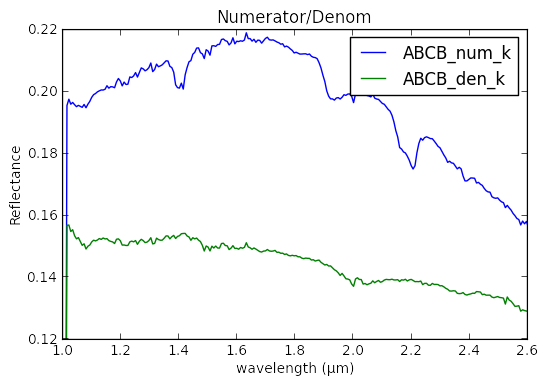

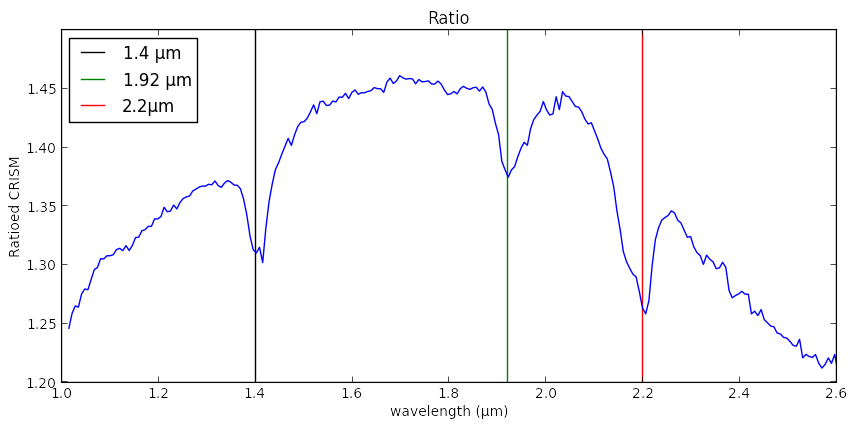

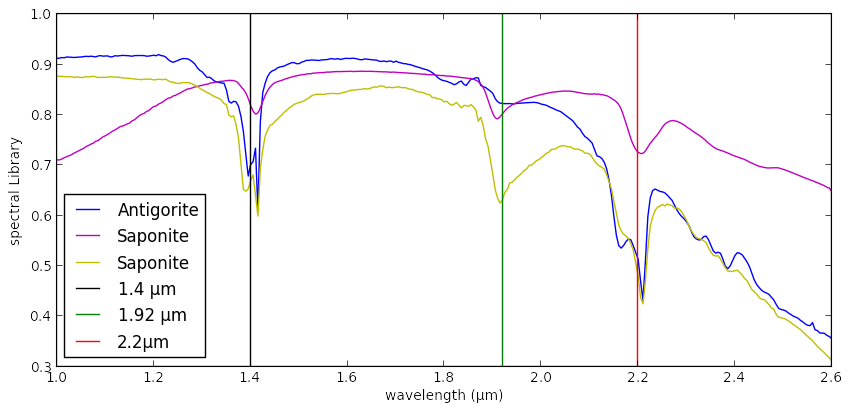

In [160]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlim(1, 2.6)
plt.ylim(0.12,0.22)
plt.title('Numerator/Denom')


plt.plot(x_axis,avg_num, '-', label="ABCB_num_k", color='b')
plt.plot(x_axis,avg_denom, '-', label="ABCB_den_k", color='g')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'Reflectance' )

plt.legend(loc='upper right')

##############################################
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(211)
plt.xlim(1, 2.6)
plt.ylim(1.2,1.5)
plt.title('Ratio')

plt.axvline(x=1.4, color='k',label='1.4 ' + u"\u03BC" + 'm')
plt.axvline(x=1.92, color='g',label='1.92 ' + u"\u03BC" + 'm')
plt.axvline(x=2.2, color='r',label='2.2' + u"\u03BC" + 'm')
plt.plot(x_axis,ratio, '-', color='b')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'Ratioed CRISM' )
plt.legend(loc='upper left')

##############################################
x_spec = [0.350000,0.352500,0.355000,0.357500,0.360000,0.362500,0.365000,0.367500,0.370000,0.372500,0.375000,0.377500,0.380000,0.382500,0.385000,0.387500,0.390000,0.392500,0.395000,0.397500,0.400000,0.402500,0.405000,0.407500,0.410000,0.412500,0.415000,0.417500,0.420000,0.422500,0.425000,0.427500,0.430000,0.432500,0.435000,0.437500,0.440000,0.442500,0.445000,0.447500,0.450000,0.452500,0.455000,0.457500,0.460000,0.462500,0.465000,0.467500,0.470000,0.472500,0.475000,0.477500,0.480000,0.482500,0.485000,0.487500,0.490000,0.492500,0.495000,0.497500,0.500000,0.502500,0.505000,0.507500,0.510000,0.512500,0.515000,0.517500,0.520000,0.522500,0.525000,0.527500,0.530000,0.532500,0.535000,0.537500,0.540000,0.542500,0.545000,0.547500,0.550000,0.552500,0.555000,0.557500,0.560000,0.562500,0.565000,0.567500,0.570000,0.572500,0.575000,0.577500,0.580000,0.582500,0.585000,0.587500,0.590000,0.592500,0.595000,0.597500,0.600000,0.602500,0.605000,0.607500,0.610000,0.612500,0.615000,0.617500,0.620000,0.622500,0.625000,0.627500,0.630000,0.632500,0.635000,0.637500,0.640000,0.642500,0.645000,0.647500,0.650000,0.652500,0.655000,0.657500,0.660000,0.662500,0.665000,0.667500,0.670000,0.672500,0.675000,0.677500,0.680000,0.682500,0.685000,0.687500,0.690000,0.692500,0.695000,0.697500,0.700000,0.702500,0.705000,0.707500,0.710000,0.712500,0.715000,0.717500,0.720000,0.722500,0.725000,0.727500,0.730000,0.732500,0.735000,0.737500,0.740000,0.742500,0.745000,0.747500,0.750000,0.752500,0.755000,0.757500,0.760000,0.762500,0.765000,0.767500,0.770000,0.772500,0.775000,0.777500,0.780000,0.782500,0.785000,0.787500,0.790000,0.792500,0.795000,0.797500,0.800000,0.802500,0.805000,0.807500,0.810000,0.812500,0.815000,0.817500,0.820000,0.822500,0.825000,0.827500,0.830000,0.832500,0.835000,0.837500,0.840000,0.842500,0.845000,0.847500,0.850000,0.852500,0.855000,0.857500,0.860000,0.862500,0.865000,0.867500,0.870000,0.872500,0.875000,0.877500,0.880000,0.882500,0.885000,0.887500,0.890000,0.892500,0.895000,0.897500,0.899999,0.902499,0.904999,0.907499,0.909999,0.912499,0.914999,0.917499,0.919999,0.922499,0.924999,0.927499,0.929999,0.932499,0.934999,0.937499,0.939999,0.942499,0.944999,0.947499,0.949999,0.952499,0.954999,0.957499,0.959999,0.962499,0.964999,0.967499,0.969999,0.972499,0.974999,0.977499,0.979999,0.982499,0.984999,0.987499,0.989999,0.992499,0.994999,0.997499,0.999999,1.002500,1.005000,1.007500,1.010000,1.012500,1.015000,1.017500,1.020000,1.022500,1.025000,1.027500,1.030000,1.032500,1.035000,1.037500,1.040000,1.042500,1.045000,1.047500,1.050000,1.052500,1.055000,1.057500,1.060000,1.062500,1.065000,1.067500,1.070000,1.072500,1.075000,1.077500,1.080000,1.082500,1.085000,1.087500,1.090000,1.092500,1.095000,1.097500,1.100000,1.102500,1.105000,1.107500,1.110000,1.112500,1.115000,1.117500,1.120000,1.122500,1.125000,1.127500,1.130000,1.132500,1.135000,1.137500,1.140000,1.142500,1.145000,1.147500,1.150000,1.152500,1.155000,1.157500,1.160000,1.162500,1.165000,1.167500,1.170000,1.172500,1.175000,1.177500,1.180000,1.182500,1.185000,1.187500,1.190000,1.192500,1.195000,1.197500,1.200000,1.202500,1.205000,1.207500,1.210000,1.212500,1.215000,1.217500,1.220000,1.222500,1.225000,1.227500,1.230000,1.232500,1.235000,1.237500,1.240000,1.242500,1.245010,1.247510,1.250010,1.252510,1.255010,1.257510,1.260010,1.262510,1.265010,1.267510,1.270010,1.272510,1.275010,1.277510,1.280010,1.282510,1.285010,1.287510,1.290010,1.292510,1.295010,1.297510,1.300010,1.302510,1.305010,1.307510,1.310010,1.312510,1.315010,1.317510,1.320010,1.322510,1.325010,1.327510,1.330010,1.332510,1.335010,1.337510,1.340010,1.342510,1.345010,1.347510,1.350010,1.352510,1.355010,1.357510,1.360010,1.362510,1.365010,1.367510,1.370010,1.372510,1.375010,1.377510,1.380010,1.382510,1.385010,1.387510,1.390010,1.392510,1.395010,1.397510,1.400010,1.402510,1.405010,1.407510,1.410010,1.412510,1.415010,1.417510,1.420010,1.422510,1.425010,1.427510,1.430010,1.432510,1.435010,1.437510,1.440010,1.442510,1.445010,1.447510,1.450010,1.452510,1.455010,1.457510,1.460010,1.462510,1.465010,1.467510,1.470010,1.472510,1.475010,1.477510,1.480010,1.482510,1.485010,1.487510,1.490010,1.492510,1.495010,1.497510,1.500010,1.502510,1.505010,1.507510,1.510010,1.512510,1.515010,1.517510,1.520010,1.522510,1.525010,1.527510,1.530010,1.532510,1.535010,1.537510,1.540010,1.542510,1.545010,1.547510,1.550010,1.552510,1.555010,1.557510,1.560010,1.562510,1.565010,1.567510,1.570010,1.572510,1.575010,1.577510,1.580010,1.582510,1.585010,1.587510,1.590010,1.592510,1.595010,1.597510,1.600010,1.602510,1.605010,1.607510,1.610010,1.612510,1.615010,1.617510,1.620010,1.622510,1.625010,1.627510,1.630010,1.632510,1.635010,1.637510,1.640010,1.642510,1.645010,1.647510,1.650010,1.652510,1.655010,1.657510,1.660010,1.662510,1.665010,1.667510,1.670010,1.672510,1.675010,1.677510,1.680010,1.682520,1.685020,1.687520,1.690020,1.692520,1.695020,1.697520,1.700020,1.702520,1.705020,1.707520,1.710020,1.712520,1.715020,1.717520,1.720020,1.722520,1.725020,1.727520,1.730020,1.732520,1.735020,1.737520,1.740020,1.742520,1.745020,1.747520,1.750020,1.752520,1.755020,1.757520,1.760020,1.762520,1.765020,1.767520,1.770020,1.772520,1.775020,1.777520,1.780020,1.782520,1.785020,1.787520,1.790020,1.792520,1.795020,1.797520,1.800020,1.802520,1.805020,1.807520,1.810020,1.812520,1.815020,1.817520,1.820020,1.822520,1.825020,1.827520,1.830020,1.832520,1.835020,1.837520,1.840020,1.842520,1.845020,1.847520,1.850020,1.852520,1.855020,1.857520,1.860020,1.862520,1.865020,1.867520,1.870020,1.872520,1.875020,1.877520,1.880020,1.882520,1.885020,1.887520,1.890020,1.892520,1.895020,1.897520,1.900020,1.902520,1.905020,1.907520,1.910020,1.912520,1.915020,1.917520,1.920020,1.922520,1.925020,1.927520,1.930020,1.932520,1.935020,1.937520,1.940020,1.942520,1.945020,1.947520,1.950020,1.952520,1.955020,1.957520,1.960020,1.962520,1.965020,1.967520,1.970020,1.972520,1.975020,1.977520,1.980020,1.982520,1.985020,1.987520,1.990020,1.992520,1.995020,1.997520,2.000020,2.002520,2.005020,2.007520,2.010020,2.012520,2.015020,2.017520,2.020020,2.022520,2.025020,2.027520,2.030020,2.032520,2.035020,2.037520,2.040020,2.042520,2.045020,2.047520,2.050020,2.052520,2.055020,2.057520,2.060020,2.062520,2.065020,2.067520,2.070020,2.072520,2.075020,2.077520,2.080020,2.082520,2.085020,2.087520,2.090020,2.092520,2.095020,2.097520,2.100020,2.102520,2.105020,2.107520,2.110020,2.112520,2.115020,2.117520,2.120020,2.122520,2.125030,2.127530,2.130030,2.132530,2.135030,2.137530,2.140030,2.142530,2.145030,2.147530,2.150030,2.152530,2.155030,2.157530,2.160030,2.162530,2.165030,2.167530,2.170030,2.172530,2.175030,2.177530,2.180030,2.182530,2.185030,2.187530,2.190030,2.192530,2.195030,2.197530,2.200030,2.202530,2.205030,2.207530,2.210030,2.212530,2.215030,2.217530,2.220030,2.222530,2.225030,2.227530,2.230030,2.232530,2.235030,2.237530,2.240030,2.242530,2.245030,2.247530,2.250030,2.252530,2.255030,2.257530,2.260030,2.262530,2.265030,2.267530,2.270030,2.272530,2.275030,2.277530,2.280030,2.282530,2.285030,2.287530,2.290030,2.292530,2.295030,2.297530,2.300030,2.302530,2.305030,2.307530,2.310030,2.312530,2.315030,2.317530,2.320030,2.322530,2.325030,2.327530,2.330030,2.332530,2.335030,2.337530,2.340030,2.342530,2.345030,2.347530,2.350030,2.352530,2.355030,2.357530,2.360030,2.362530,2.365030,2.367530,2.370030,2.372530,2.375030,2.377530,2.380030,2.382530,2.385030,2.387530,2.390030,2.392530,2.395030,2.397530,2.400030,2.402530,2.405030,2.407530,2.410030,2.412530,2.415030,2.417530,2.420030,2.422530,2.425030,2.427530,2.430030,2.432530,2.435030,2.437530,2.440030,2.442530,2.445030,2.447530,2.450030,2.452530,2.455030,2.457530,2.460030,2.462530,2.465030,2.467530,2.470030,2.472530,2.475030,2.477530,2.480030,2.482530,2.485030,2.487530,2.490030,2.492530,2.495030,2.497530,2.500030,2.502530,2.505030,2.507530,2.510030,2.512530,2.515030,2.517530,2.520030,2.522530,2.525030,2.527530,2.530030,2.532530,2.535030,2.537530,2.540030,2.542530,2.545030,2.547530,2.550030,2.552530,2.555030,2.557530,2.560030,2.562540,2.565040,2.567540,2.570040,2.572540,2.575040,2.577540,2.580040,2.582540,2.585040,2.587540,2.590040,2.592540,2.595040,2.597540,2.600040,2.602540,2.605040,2.607540,2.610040,2.612540,2.615040,2.617540,2.620040,2.622540,2.625040,2.627540,2.630040,2.632540,2.635040,2.637540,2.640040,2.642540,2.645040,2.647540,2.650040,2.652540,2.655040,2.657540,2.660040,2.662540,2.665040,2.667540,2.670040,2.672540,2.675040,2.677540,2.680040,2.682540,2.685040,2.687540,2.690040,2.692540,2.695040,2.697540,2.700040,2.702540,2.705040,2.707540,2.710040,2.712540,2.715040,2.717540,2.720040,2.722540,2.725040,2.727540,2.730040,2.732540,2.735040,2.737540,2.740040,2.742540,2.745040,2.747540,2.750040,2.752540,2.755040,2.757540,2.760040,2.762540,2.765040,2.767540,2.770040,2.772540,2.775040,2.777540,2.780040,2.782540,2.785040,2.787540,2.790040,2.792540,2.795040,2.797540,2.800040,2.802540,2.805040,2.807540,2.810040,2.812540,2.815040,2.817540,2.820040,2.822540,2.825040,2.827540,2.830040,2.832540,2.835040,2.837540,2.840040,2.842540,2.845040,2.847540,2.850040,2.852540,2.855040,2.857540,2.860040,2.862540,2.865040,2.867540,2.870040,2.872540,2.875040,2.877540,2.880040,2.882540,2.885040,2.887540,2.890040,2.892540,2.895040,2.897540,2.900040,2.902540,2.905040,2.907540,2.910040,2.912540,2.915040,2.917540,2.920040,2.922540,2.925040,2.927540,2.930040,2.932540,2.935040,2.937540,2.940040,2.942540,2.945040,2.947540,2.950040,2.952540,2.955040,2.957540,2.960040,2.962540,2.965040,2.967540,2.970040,2.972540,2.975040,2.977540,2.980040,2.982540,2.985040,2.987540,2.990040,2.992540,2.995040,2.997550,3.000050,3.002550,3.005050,3.007550,3.010050,3.012550,3.015050,3.017550,3.020050,3.022550,3.025050,3.027550,3.030050,3.032550,3.035050,3.037550,3.040050,3.042550,3.045050,3.047550,3.050050,3.052550,3.055050,3.057550,3.060050,3.062550,3.065050,3.067550,3.070050,3.072550,3.075050,3.077550,3.080050,3.082550,3.085050,3.087550,3.090050,3.092550,3.095050,3.097550,3.100050,3.102550,3.105050,3.107550,3.110050,3.112550,3.115050,3.117550,3.120050,3.122550,3.125050,3.127550,3.130050,3.132550,3.135050,3.137550,3.140050,3.142550,3.145050,3.147550,3.150050,3.152550,3.155050,3.157550,3.160050,3.162550,3.165050,3.167550,3.170050,3.172550,3.175050,3.177550,3.180050,3.182550,3.185050,3.187550,3.190050,3.192550,3.195050,3.197550,3.200050,3.202550,3.205050,3.207550,3.210050,3.212550,3.215050,3.217550,3.220050,3.222550,3.225050,3.227550,3.230050,3.232550,3.235050,3.237550,3.240050,3.242550,3.245050,3.247550,3.250050,3.252550,3.255050,3.257550,3.260050,3.262550,3.265050,3.267550,3.270050,3.272550,3.275050,3.277550,3.280050,3.282550,3.285050,3.287550,3.290050,3.292550,3.295050,3.297550,3.300050,3.302550,3.305050,3.307550,3.310050,3.312550,3.315050,3.317550,3.320050,3.322550,3.325050,3.327550,3.330050,3.332550,3.335050,3.337550,3.340050,3.342550,3.345050,3.347550,3.350050,3.352550,3.355050,3.357550,3.360050,3.362550,3.365050,3.367550,3.370050,3.372550,3.375050,3.377550,3.380050,3.382550,3.385050,3.387550,3.390050,3.392550,3.395050,3.397550,3.400050,3.402550,3.405050,3.407550,3.410050,3.412550,3.415050,3.417550,3.420050,3.422550,3.425050,3.427550,3.430050,3.432550,3.435060,3.437560,3.440060,3.442560,3.445060,3.447560,3.450060,3.452560,3.455060,3.457560,3.460060,3.462560,3.465060,3.467560,3.470060,3.472560,3.475060,3.477560,3.480060,3.482560,3.485060,3.487560,3.490060,3.492560,3.495060,3.497560,3.500060,3.502560,3.505060,3.507560,3.510060,3.512560,3.515060,3.517560,3.520060,3.522560,3.525060,3.527560,3.530060,3.532560,3.535060,3.537560,3.540060,3.542560,3.545060,3.547560,3.550060,3.552560,3.555060,3.557560,3.560060,3.562560,3.565060,3.567560,3.570060,3.572560,3.575060,3.577560,3.580060,3.582560,3.585060,3.587560,3.590060,3.592560,3.595060,3.597560,3.600060,3.602560,3.605060,3.607560,3.610060,3.612560,3.615060,3.617560,3.620060,3.622560,3.625060,3.627560,3.630060,3.632560,3.635060,3.637560,3.640060,3.642560,3.645060,3.647560,3.650060,3.652560,3.655060,3.657560,3.660060,3.662560,3.665060,3.667560,3.670060,3.672560,3.675060,3.677560,3.680060,3.682560,3.685060,3.687560,3.690060,3.692560,3.695060,3.697560,3.700060,3.702560,3.705060,3.707560,3.710060,3.712560,3.715060,3.717560,3.720060,3.722560,3.725060,3.727560,3.730060,3.732560,3.735060,3.737560,3.740060,3.742560,3.745060,3.747560,3.750060,3.752560,3.755060,3.757560,3.760060,3.762560,3.765060,3.767560,3.770060,3.772560,3.775060,3.777560,3.780060,3.782560,3.785060,3.787560,3.790060,3.792560,3.795060,3.797560,3.800060,3.802560,3.805060,3.807560,3.810060,3.812560,3.815060,3.817560,3.820060,3.822560,3.825060,3.827560,3.830060,3.832560,3.835060,3.837560,3.840060,3.842560,3.845060,3.847560,3.850060,3.852560,3.855060,3.857560,3.860060,3.862560,3.865060,3.867560,3.870060,3.872570,3.875070,3.877570,3.880070,3.882570,3.885070,3.887570,3.890070,3.892570,3.895070,3.897570,3.900070,3.902570,3.905070,3.907570,3.910070,3.912570,3.915070,3.917570,3.920070,3.922570,3.925070,3.927570,3.930070,3.932570,3.935070,3.937570,3.940070,3.942570,3.945070,3.947570,3.950070,3.952570,3.955070,3.957570,3.960070,3.962570,3.965070,3.967570,3.970070,3.972570,3.975070,3.977570,3.980070,3.982570,3.985070,3.987570,3.990070,3.992570,3.995070,3.997570,4.000070,4.002570,4.005070,4.007570,4.010070,4.012570,4.015070,4.017570,4.020070,4.022570,4.025070,4.027570,4.030070,4.032570,4.035070,4.037570,4.040070,4.042570,4.045070,4.047570,4.050070,4.052570,4.055070,4.057570,4.060070,4.062570,4.065070,4.067570,4.070070,4.072570,4.075070,4.077570,4.080070,4.082570,4.085070,4.087570,4.090070,4.092570,4.095070,4.097570,4.100070]
kaolinite = [0.450200,0.465350,0.480500,0.498200,0.515900,0.533550,0.551200,0.565500,0.579800,0.591400,0.603000,0.612900,0.622800,0.631000,0.639200,0.647200,0.655200,0.661000,0.666800,0.673200,0.679600,0.685250,0.690900,0.693050,0.695200,0.701400,0.707600,0.711800,0.716000,0.719950,0.723900,0.728000,0.732100,0.736300,0.740500,0.743800,0.747100,0.750350,0.753600,0.756400,0.759200,0.761700,0.764200,0.767200,0.770200,0.772200,0.774200,0.778300,0.782400,0.784150,0.785900,0.789500,0.793100,0.794500,0.795900,0.798800,0.801700,0.803150,0.804600,0.806750,0.808900,0.811300,0.813700,0.815450,0.817200,0.819150,0.821100,0.823300,0.825500,0.827000,0.828500,0.830350,0.832200,0.833800,0.835400,0.836750,0.838100,0.839750,0.841400,0.843000,0.844600,0.845500,0.846400,0.847350,0.848300,0.849350,0.850400,0.851150,0.851900,0.853050,0.854200,0.855700,0.857200,0.857650,0.858100,0.859500,0.860900,0.861800,0.862700,0.863750,0.864800,0.865050,0.865300,0.866950,0.868600,0.868850,0.869100,0.870200,0.871300,0.872500,0.873700,0.874250,0.874800,0.875850,0.876900,0.877800,0.878700,0.878900,0.879100,0.879650,0.880200,0.881100,0.882000,0.882800,0.883600,0.883800,0.884000,0.884850,0.885700,0.886200,0.886700,0.887050,0.887400,0.888450,0.889500,0.889650,0.889800,0.890550,0.891300,0.892400,0.893500,0.892950,0.892400,0.893150,0.893900,0.895000,0.896100,0.896200,0.896300,0.896900,0.897500,0.898650,0.899800,0.900400,0.901000,0.900300,0.899600,0.900450,0.901300,0.901800,0.902300,0.902250,0.902200,0.903250,0.904300,0.903300,0.902300,0.902850,0.903400,0.904150,0.904900,0.904950,0.905000,0.905150,0.905300,0.905500,0.905700,0.905550,0.905400,0.905650,0.905900,0.906250,0.906600,0.906800,0.907000,0.907250,0.907500,0.907100,0.906700,0.907000,0.907300,0.907000,0.906700,0.906550,0.906400,0.906950,0.907500,0.907850,0.908200,0.908150,0.908100,0.908900,0.909700,0.908900,0.908100,0.907900,0.907700,0.907100,0.906500,0.907550,0.908600,0.908100,0.907600,0.908050,0.908500,0.908750,0.909000,0.908550,0.908100,0.908900,0.909700,0.909900,0.910100,0.909400,0.908700,0.908250,0.907800,0.908100,0.908400,0.909200,0.910000,0.909450,0.908900,0.909050,0.909200,0.908450,0.907700,0.906800,0.905900,0.904601,0.903301,0.901901,0.900501,0.901250,0.902000,0.899501,0.897001,0.898399,0.899799,0.905348,0.910898,0.911600,0.912300,0.912300,0.912300,0.913050,0.913800,0.914000,0.914200,0.913250,0.912300,0.912450,0.912600,0.913250,0.913900,0.913700,0.913500,0.914250,0.915000,0.914900,0.914800,0.914650,0.914500,0.914250,0.914000,0.914250,0.914500,0.914600,0.914700,0.914900,0.915100,0.915350,0.915600,0.916000,0.916400,0.916150,0.915900,0.916250,0.916600,0.916350,0.916100,0.915650,0.915200,0.916100,0.917000,0.917350,0.917700,0.917200,0.916700,0.916900,0.917100,0.917100,0.917100,0.916150,0.915200,0.915400,0.915600,0.916550,0.917500,0.917250,0.917000,0.917200,0.917400,0.917800,0.918200,0.918100,0.918000,0.917900,0.917800,0.917550,0.917300,0.916900,0.916500,0.917100,0.917700,0.917850,0.918000,0.917950,0.917900,0.917800,0.917700,0.917750,0.917800,0.917200,0.916600,0.916750,0.916900,0.917300,0.917700,0.918100,0.918500,0.918000,0.917500,0.918650,0.919800,0.918800,0.917800,0.917450,0.917100,0.915900,0.914700,0.912250,0.909800,0.908100,0.906400,0.905400,0.904400,0.905300,0.906204,0.907304,0.908404,0.909404,0.910403,0.911153,0.911900,0.911900,0.911899,0.911599,0.911295,0.910045,0.908793,0.907093,0.905391,0.903091,0.900785,0.897135,0.893490,0.890990,0.888494,0.886994,0.885488,0.882588,0.879689,0.877039,0.874401,0.874601,0.874794,0.873244,0.871691,0.869491,0.867296,0.866396,0.865498,0.865048,0.864597,0.863947,0.863299,0.863149,0.862973,0.856323,0.849654,0.838204,0.826793,0.825143,0.823507,0.825307,0.827097,0.826447,0.825782,0.821332,0.816860,0.806810,0.796741,0.781991,0.767208,0.744158,0.721114,0.699714,0.678446,0.689946,0.701411,0.704111,0.706855,0.720505,0.733850,0.671398,0.609554,0.698057,0.786316,0.815317,0.844238,0.853688,0.863126,0.869727,0.876315,0.880065,0.883808,0.885758,0.887703,0.888503,0.889308,0.891258,0.893204,0.894204,0.895202,0.895602,0.896003,0.896653,0.897305,0.898555,0.899804,0.900754,0.901705,0.902855,0.903999,0.903849,0.903696,0.902696,0.901700,0.901750,0.901806,0.903256,0.904703,0.905453,0.906204,0.907254,0.908300,0.908300,0.908302,0.908702,0.909100,0.909000,0.908900,0.908900,0.908898,0.908448,0.908002,0.908452,0.908901,0.909101,0.909301,0.909451,0.909601,0.909901,0.910203,0.911053,0.911899,0.911649,0.911399,0.911049,0.910702,0.911302,0.911896,0.910946,0.910002,0.910502,0.911003,0.911653,0.912300,0.912300,0.912299,0.912149,0.912001,0.912301,0.912599,0.912399,0.912198,0.911698,0.911197,0.910547,0.909899,0.909699,0.909503,0.910253,0.911000,0.910900,0.910799,0.910449,0.910099,0.909799,0.909499,0.909349,0.909199,0.908999,0.908796,0.907796,0.906798,0.906398,0.906002,0.906602,0.907197,0.906447,0.905702,0.906204,0.906701,0.906851,0.906990,0.905690,0.904410,0.905660,0.906890,0.905690,0.904496,0.903996,0.903494,0.902694,0.901899,0.901799,0.901695,0.901045,0.900397,0.900047,0.899694,0.898944,0.898192,0.897242,0.896295,0.895695,0.895094,0.894294,0.893493,0.892593,0.891696,0.891146,0.890594,0.889894,0.889190,0.887990,0.886788,0.885338,0.883886,0.882086,0.880281,0.877881,0.875484,0.873484,0.871490,0.870240,0.868996,0.868446,0.867895,0.867245,0.866592,0.865642,0.864692,0.863742,0.862788,0.861338,0.859907,0.860807,0.861715,0.863565,0.865407,0.866307,0.867175,0.864025,0.860890,0.859640,0.858426,0.861676,0.864926,0.868176,0.871401,0.871551,0.871708,0.872758,0.873799,0.873649,0.873440,0.865991,0.858590,0.857290,0.855994,0.855244,0.854486,0.852686,0.850885,0.848985,0.847082,0.844832,0.842558,0.837358,0.832176,0.829125,0.826088,0.824638,0.823198,0.822898,0.822599,0.822449,0.822301,0.822401,0.822500,0.822500,0.822497,0.822147,0.821801,0.821901,0.822003,0.822403,0.822801,0.822901,0.823002,0.823252,0.823502,0.823702,0.823901,0.824051,0.824201,0.824351,0.824500,0.824550,0.824601,0.824751,0.824898,0.824648,0.824396,0.823846,0.823292,0.822342,0.821396,0.820846,0.820296,0.819796,0.819290,0.818040,0.816791,0.815590,0.814393,0.813543,0.812689,0.811339,0.809994,0.809194,0.808392,0.807442,0.806486,0.804686,0.802886,0.801136,0.799386,0.797636,0.795886,0.794086,0.792284,0.790284,0.788275,0.785175,0.782074,0.778824,0.775584,0.773634,0.771668,0.767618,0.763574,0.760274,0.756987,0.755387,0.753781,0.751431,0.749080,0.746530,0.743948,0.737397,0.730851,0.724701,0.718594,0.717794,0.716985,0.715135,0.713256,0.709556,0.705821,0.699170,0.692467,0.681417,0.670313,0.654663,0.638952,0.618352,0.597779,0.579228,0.560776,0.550426,0.540170,0.537670,0.535232,0.537932,0.540646,0.544496,0.548331,0.550931,0.553489,0.552589,0.551627,0.545527,0.539419,0.532720,0.526026,0.519876,0.513537,0.491638,0.469768,0.450468,0.431872,0.471120,0.510426,0.554226,0.597725,0.616474,0.635088,0.642388,0.649619,0.651169,0.652686,0.651486,0.650286,0.649086,0.647895,0.647495,0.647089,0.646139,0.645174,0.642974,0.640769,0.638169,0.635567,0.632817,0.630044,0.625394,0.620743,0.615993,0.611254,0.607404,0.603567,0.600766,0.597972,0.595672,0.593363,0.590313,0.587255,0.583505,0.579728,0.573779,0.567841,0.562891,0.557973,0.555723,0.553487,0.552437,0.551405,0.551805,0.552234,0.555084,0.557908,0.558608,0.559259,0.555859,0.552432,0.546732,0.541033,0.535433,0.529872,0.527572,0.525311,0.526211,0.527087,0.526037,0.524929,0.519029,0.513117,0.506217,0.499370,0.496819,0.494333,0.497083,0.499862,0.505062,0.510264,0.515614,0.520933,0.523683,0.526390,0.525540,0.524683,0.523233,0.521759,0.518309,0.514856,0.511156,0.507443,0.502693,0.497921,0.491321,0.484719,0.477969,0.471248,0.466949,0.462663,0.459613,0.456569,0.453969,0.451380,0.449730,0.448088,0.447088,0.446084,0.444734,0.443366,0.440566,0.437767,0.435017,0.432246,0.427746,0.423254,0.419454,0.415686,0.414486,0.413294,0.412794,0.412288,0.411288,0.410277,0.408377,0.406483,0.405033,0.403580,0.401930,0.400287,0.399237,0.398187,0.397087,0.395975,0.393875,0.391781,0.390181,0.388576,0.386576,0.384584,0.383234,0.381895,0.381495,0.381138,0.384288,0.387315,0.380186,0.373186,0.372286,0.371362,0.369012,0.366698,0.366598,0.366494,0.366094,0.365667,0.363617,0.361583,0.360533,0.359464,0.357214,0.355011,0.355711,0.356301,0.350152,0.344119,0.345319,0.346382,0.339033,0.331803,0.332003,0.332134,0.327984,0.323718,0.312318,0.301051,0.298001,0.294892,0.288091,0.281306,0.275456,0.269581,0.262080,0.254565,0.246165,0.237765,0.229315,0.220702,0.202102,0.183634,0.173234,0.162713,0.144813,0.126995,0.114094,0.101172,0.086922,0.072707,0.060658,0.048639,0.038589,0.028539,0.018490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000]
montmorillonite = [0.025839,0.026137,0.026436,0.026805,0.027175,0.027726,0.028277,0.028811,0.029345,0.030215,0.031086,0.032034,0.032982,0.034166,0.035349,0.036577,0.037804,0.039255,0.040706,0.042261,0.043816,0.045547,0.047278,0.048850,0.050423,0.052268,0.054114,0.055987,0.057860,0.060069,0.062277,0.064668,0.067060,0.069665,0.072271,0.075197,0.078123,0.081076,0.084029,0.086792,0.089556,0.092458,0.095361,0.097805,0.100249,0.102619,0.104990,0.107261,0.109532,0.111813,0.114093,0.116647,0.119202,0.122415,0.125629,0.128868,0.132108,0.135778,0.139447,0.143667,0.147886,0.152781,0.157676,0.162957,0.168238,0.174284,0.180330,0.186613,0.192896,0.200023,0.207150,0.214083,0.221016,0.228068,0.235119,0.242895,0.250671,0.258505,0.266338,0.274561,0.282784,0.291197,0.299611,0.308217,0.316823,0.325800,0.334777,0.344355,0.353933,0.363474,0.373015,0.382641,0.392268,0.401354,0.410440,0.419933,0.429426,0.438451,0.447477,0.456792,0.466107,0.474181,0.482255,0.489937,0.497619,0.505682,0.513745,0.520898,0.528052,0.535074,0.542095,0.548612,0.555130,0.561064,0.566998,0.572662,0.578327,0.583400,0.588474,0.592353,0.596231,0.601354,0.606476,0.610197,0.613917,0.619134,0.624352,0.627428,0.630504,0.633479,0.636453,0.640751,0.645050,0.648418,0.651785,0.655345,0.658905,0.662384,0.665863,0.669541,0.673218,0.676530,0.679841,0.682660,0.685480,0.687570,0.689660,0.692941,0.696223,0.698518,0.700813,0.703528,0.706242,0.707289,0.708335,0.710397,0.712459,0.714905,0.717351,0.719226,0.721101,0.721923,0.722744,0.723563,0.724381,0.724765,0.725149,0.726134,0.727119,0.727126,0.727132,0.727278,0.727424,0.727021,0.726617,0.726620,0.726623,0.726471,0.726319,0.725461,0.724604,0.723871,0.723139,0.722440,0.721741,0.720578,0.719415,0.719099,0.718783,0.716995,0.715207,0.715068,0.714930,0.714501,0.714072,0.713032,0.711993,0.710782,0.709570,0.709026,0.708481,0.706141,0.703802,0.703992,0.704181,0.703385,0.702588,0.702170,0.701751,0.700911,0.700071,0.699513,0.698955,0.698639,0.698323,0.697754,0.697184,0.696537,0.695890,0.695670,0.695451,0.695049,0.694647,0.695100,0.695553,0.695076,0.694598,0.694727,0.694857,0.694816,0.694774,0.695175,0.695577,0.695266,0.694954,0.696198,0.697442,0.697225,0.697008,0.696717,0.696426,0.696639,0.696852,0.697172,0.697493,0.697843,0.698193,0.698838,0.699483,0.700453,0.701424,0.702197,0.702971,0.703641,0.704311,0.705380,0.706450,0.707008,0.707566,0.709206,0.710846,0.710611,0.710374,0.711271,0.712168,0.713511,0.714853,0.715869,0.716885,0.717809,0.718734,0.719717,0.720699,0.722230,0.723761,0.724925,0.726088,0.727260,0.728432,0.729791,0.731149,0.732185,0.733220,0.735121,0.737022,0.738058,0.739094,0.740447,0.741801,0.742725,0.743649,0.745595,0.747542,0.748223,0.748904,0.750817,0.752730,0.754505,0.756281,0.757374,0.758466,0.759838,0.761211,0.762745,0.764279,0.766055,0.767832,0.768951,0.770070,0.771575,0.773081,0.774731,0.776381,0.777065,0.777749,0.778607,0.779464,0.780734,0.782004,0.782766,0.783528,0.785832,0.788135,0.789177,0.790218,0.792208,0.794197,0.796280,0.798363,0.799777,0.801190,0.802016,0.802842,0.804759,0.806675,0.807616,0.808558,0.810845,0.813133,0.814845,0.816557,0.817209,0.817861,0.819683,0.821505,0.822581,0.823656,0.825175,0.826695,0.828541,0.830388,0.831816,0.833244,0.833733,0.834222,0.835861,0.837501,0.838171,0.838847,0.840192,0.841535,0.842616,0.843699,0.845199,0.846697,0.847878,0.849060,0.850276,0.851488,0.851743,0.851998,0.853175,0.853628,0.854855,0.855482,0.855866,0.856522,0.857089,0.857682,0.858340,0.858885,0.859194,0.860280,0.860642,0.860906,0.861212,0.862467,0.863310,0.863458,0.863976,0.864301,0.864951,0.865231,0.865790,0.866164,0.866437,0.866739,0.866804,0.867142,0.867541,0.868059,0.868358,0.868498,0.868577,0.868504,0.868290,0.868000,0.867378,0.866387,0.864926,0.862439,0.859410,0.856452,0.853185,0.851172,0.847193,0.843531,0.838556,0.832525,0.825342,0.818713,0.812767,0.807669,0.804181,0.801869,0.802023,0.804449,0.808317,0.814347,0.820063,0.826953,0.832682,0.838661,0.843575,0.848238,0.851766,0.855190,0.857776,0.860238,0.862520,0.863766,0.865138,0.866095,0.866508,0.867455,0.868081,0.868861,0.869837,0.870848,0.871734,0.872280,0.873386,0.874011,0.874480,0.875266,0.876161,0.876515,0.877179,0.877583,0.878300,0.878724,0.879252,0.879585,0.880065,0.880082,0.880443,0.881123,0.881678,0.881501,0.881851,0.881794,0.882810,0.882807,0.882941,0.883379,0.883496,0.883610,0.883982,0.884118,0.884006,0.883997,0.884473,0.884616,0.884944,0.885238,0.884804,0.885178,0.885509,0.885503,0.885850,0.885689,0.886224,0.885887,0.885954,0.886088,0.886081,0.886191,0.886204,0.886170,0.886406,0.886161,0.886544,0.886700,0.886482,0.886194,0.886284,0.886151,0.886430,0.886840,0.886766,0.886442,0.886391,0.887014,0.886551,0.886470,0.886473,0.886406,0.886377,0.886589,0.886511,0.886671,0.886183,0.886197,0.886199,0.886167,0.885973,0.885910,0.885686,0.885780,0.885547,0.885420,0.885429,0.885502,0.885218,0.885224,0.884685,0.884734,0.885008,0.885020,0.884752,0.884404,0.884378,0.884289,0.883905,0.883972,0.883874,0.883596,0.883464,0.883518,0.883255,0.883115,0.882872,0.882782,0.882356,0.882228,0.882321,0.882227,0.881923,0.881588,0.881386,0.881392,0.881270,0.880948,0.880880,0.880955,0.880398,0.879920,0.880020,0.879813,0.879673,0.879660,0.879625,0.879081,0.879321,0.878812,0.878555,0.878493,0.878002,0.877954,0.878401,0.877771,0.877296,0.877214,0.877103,0.877110,0.876991,0.876612,0.876378,0.876335,0.875556,0.875532,0.875362,0.875084,0.874332,0.874136,0.874056,0.873729,0.873320,0.873174,0.872703,0.872456,0.872538,0.871671,0.871239,0.870666,0.869985,0.868697,0.867718,0.866024,0.863747,0.861606,0.858423,0.854310,0.849670,0.843600,0.836770,0.829683,0.822349,0.815417,0.808872,0.802780,0.797958,0.794409,0.792406,0.792596,0.793996,0.796472,0.799298,0.802336,0.805431,0.808171,0.810750,0.813098,0.815081,0.816675,0.818005,0.819852,0.821468,0.822438,0.823630,0.824263,0.825513,0.826818,0.827649,0.828976,0.830220,0.830956,0.831545,0.832479,0.833252,0.834078,0.834624,0.835017,0.835856,0.836749,0.837467,0.837933,0.838394,0.839383,0.839730,0.840316,0.841002,0.841554,0.842012,0.842617,0.843003,0.843834,0.844225,0.844378,0.844834,0.845444,0.845485,0.845814,0.846167,0.846468,0.846629,0.846891,0.846998,0.847277,0.847431,0.847329,0.847297,0.847066,0.847141,0.846908,0.846933,0.846388,0.846054,0.845770,0.845108,0.844858,0.844336,0.844137,0.843524,0.843019,0.842460,0.842161,0.841803,0.841690,0.841468,0.841327,0.841641,0.840859,0.841707,0.841798,0.841148,0.840950,0.841322,0.840956,0.840329,0.840293,0.839689,0.839351,0.838363,0.838325,0.837151,0.835774,0.834113,0.833094,0.830742,0.829706,0.828097,0.825922,0.823608,0.820410,0.816022,0.811144,0.804899,0.798013,0.790529,0.782946,0.775164,0.767324,0.760174,0.752539,0.746039,0.740547,0.735605,0.731410,0.728163,0.725812,0.724459,0.723288,0.722890,0.724201,0.725790,0.728480,0.732328,0.735915,0.739818,0.743443,0.746560,0.749740,0.752658,0.755593,0.758089,0.761101,0.764485,0.768065,0.771938,0.775407,0.778540,0.781309,0.783629,0.784978,0.786369,0.787585,0.788088,0.788517,0.788695,0.788144,0.787577,0.787222,0.786093,0.785078,0.783951,0.782774,0.781166,0.779967,0.777983,0.776147,0.774382,0.772959,0.771490,0.769505,0.767775,0.766295,0.764459,0.763087,0.761391,0.759718,0.758154,0.756755,0.754651,0.752768,0.750728,0.748662,0.745899,0.743985,0.741874,0.739988,0.738005,0.736379,0.734997,0.733577,0.732242,0.731326,0.730315,0.729382,0.728720,0.728144,0.726985,0.726012,0.725300,0.724120,0.723309,0.722079,0.720939,0.719877,0.719081,0.718017,0.717200,0.716349,0.715531,0.714849,0.714034,0.713078,0.712205,0.711024,0.710073,0.708940,0.707326,0.706205,0.705175,0.704037,0.702976,0.701685,0.700716,0.699570,0.698567,0.697729,0.697108,0.696588,0.696074,0.695392,0.694971,0.694699,0.694547,0.694341,0.694717,0.694602,0.694878,0.694866,0.694862,0.694940,0.694903,0.694550,0.693845,0.693318,0.692596,0.691769,0.690897,0.690021,0.689131,0.688208,0.687276,0.686280,0.685385,0.684338,0.683306,0.682225,0.681332,0.680517,0.679376,0.678325,0.677226,0.676286,0.675554,0.674459,0.673740,0.672714,0.671932,0.670695,0.669899,0.669251,0.668337,0.666980,0.665887,0.665534,0.663761,0.663067,0.662274,0.660960,0.660236,0.658921,0.657283,0.656030,0.654881,0.654857,0.649880,0.649588,0.648676,0.647099,0.644059,0.642367,0.640784,0.639016,0.637299,0.634537,0.632138,0.630170,0.628656,0.625490,0.622237,0.619819,0.617204,0.614541,0.611657,0.608640,0.605487,0.602028,0.598903,0.594349,0.590127,0.586050,0.580366,0.575550,0.567787,0.558291,0.545262,0.531862,0.519220,0.503460,0.483869,0.457875,0.424229,0.386936,0.350673,0.317196,0.287038,0.263241,0.244529,0.229221,0.216566,0.205499,0.193910,0.181535,0.168269,0.153436,0.137114,0.121859,0.107210,0.094803,0.084539,0.076340,0.069559,0.064319,0.059800,0.056275,0.053525,0.051831,0.050928,0.051038,0.051752,0.053203,0.055467,0.058257,0.061542,0.065272,0.069510,0.074265,0.079406,0.085023,0.091004,0.097219,0.103621,0.110324,0.117022,0.123608,0.130114,0.136358,0.142234,0.147936,0.153027,0.157732,0.161931,0.165821,0.169183,0.172103,0.174750,0.177052,0.179026,0.180896,0.182496,0.184053,0.185428,0.186565,0.187581,0.188566,0.189494,0.190319,0.191146,0.191884,0.192670,0.193298,0.193757,0.194276,0.194759,0.195259,0.195561,0.195872,0.196180,0.196436,0.196740,0.197012,0.197269,0.197508,0.197878,0.198271,0.198569,0.199046,0.199558,0.199873,0.200283,0.200727,0.201347,0.201738,0.202264,0.202743,0.203261,0.203865,0.204476,0.204959,0.205336,0.205833,0.206333,0.206951,0.207447,0.207992,0.208625,0.209249,0.210013,0.210916,0.211581,0.212356,0.213170,0.214081,0.215113,0.216213,0.217121,0.218189,0.219391,0.220556,0.221874,0.223242,0.224517,0.225716,0.226919,0.228231,0.229645,0.230953,0.232186,0.233406,0.234677,0.235898,0.237089,0.238296,0.239535,0.240604,0.241792,0.242830,0.243842,0.244926,0.245973,0.246865,0.247915,0.248923,0.249808,0.250667,0.251516,0.252417,0.253325,0.254173,0.254910,0.255668,0.256425,0.257156,0.257994,0.258879,0.259617,0.260167,0.260790,0.261418,0.262208,0.263072,0.263887,0.264573,0.265231,0.265978,0.266954,0.267841,0.268814,0.269791,0.270639,0.271603,0.272742,0.273922,0.274985,0.276121,0.277163,0.278218,0.279358,0.280601,0.281787,0.283000,0.284069,0.285132,0.286213,0.287470,0.288692,0.289994,0.291250,0.292374,0.293441,0.294593,0.295785,0.297087,0.298414,0.299584,0.300723,0.301858,0.303021,0.304199,0.305430,0.306650,0.307812,0.309049,0.310234,0.311355,0.312466,0.313606,0.314811,0.315937,0.317100,0.318273,0.319363,0.320469,0.321609,0.322696,0.323857,0.324979,0.326123,0.327291,0.328350,0.329423,0.330479,0.331553,0.332579,0.333739,0.334812,0.335851,0.337002,0.338080,0.339081,0.340080,0.341284,0.342508,0.343487,0.344517,0.345621,0.346645,0.347650,0.348748,0.349823,0.350788,0.351748,0.352773,0.353886,0.354949,0.356001,0.357020,0.358042,0.359107,0.360142,0.361119,0.362043,0.363088,0.364099,0.365019,0.365967,0.366950,0.367921,0.368890,0.369781,0.370737,0.371777,0.372709,0.373453,0.374258,0.375169,0.375983,0.376761,0.377503,0.378267,0.379015,0.379604,0.380181,0.380752,0.381303,0.381820,0.382492,0.383094,0.383741,0.384483,0.385304,0.386111,0.386999,0.387952,0.388794,0.389499,0.390079,0.390604,0.391050,0.391466,0.391955,0.392436,0.393063,0.393954,0.394978,0.396205,0.397599,0.399069,0.400470,0.401757,0.403061,0.404346,0.405619,0.406773,0.407862,0.408925,0.409963,0.410988,0.412047,0.413030,0.413983,0.414900,0.415753,0.416526,0.417255,0.417990,0.418702,0.419385,0.420015,0.420685,0.421443,0.422226,0.422963,0.423655,0.424303,0.424960,0.425593,0.426280,0.427118,0.428059,0.429189,0.430344,0.431484,0.432540,0.433569,0.434581,0.435661,0.436802,0.437942,0.439053,0.440189,0.441254,0.442279,0.443342,0.444379,0.445458,0.446468,0.447444,0.448388,0.449355,0.450243,0.451179,0.452101,0.453042,0.453875,0.454680,0.455497,0.456368,0.457185,0.458014,0.458811,0.459519,0.460312,0.461118,0.461844,0.462585,0.463288,0.463985,0.464653,0.465344,0.466076,0.466754,0.467403,0.467978,0.468559,0.469209,0.469818,0.470450,0.470990,0.471566,0.472068,0.472586,0.473078,0.473570,0.474069,0.474591,0.475066,0.475576,0.476100,0.476585,0.477067,0.477574,0.478100,0.478665,0.479242,0.479808,0.480391,0.481006,0.481656,0.482264,0.482889,0.483539,0.484232,0.484912,0.485560,0.486264,0.486935,0.487616,0.488362,0.489070,0.489792,0.490538,0.491308,0.492043,0.492744,0.493469,0.494222,0.494971,0.495676,0.496367,0.497059,0.497852,0.498556,0.499260,0.499949,0.500673,0.501347,0.502024,0.502692,0.503339,0.504014,0.504655,0.505311,0.505993,0.506606,0.507146,0.507737,0.508338,0.508921,0.509477,0.510024,0.510591,0.511178,0.511751,0.512278,0.512785,0.513315,0.513846,0.514346,0.514826,0.515308,0.515794,0.516275,0.516752,0.517289,0.517758,0.518204,0.518633,0.519078,0.519537,0.519994,0.520484,0.520937,0.521330,0.521697,0.522078,0.522491,0.522914,0.523327,0.523735,0.524106,0.524493,0.524899,0.525299,0.525681,0.526026,0.526340,0.526717,0.527111,0.527476,0.527852,0.528196,0.528518,0.528852,0.529202,0.529554,0.529881,0.530191,0.530495,0.530789,0.531069,0.531368,0.531596,0.531871,0.532129,0.532398,0.532684,0.532937,0.533207,0.533403,0.533605,0.533812,0.534027,0.534258,0.534448,0.534626,0.534803,0.534993,0.535183,0.535338,0.535501,0.535651,0.535830,0.535995,0.536125,0.536250,0.536372,0.536549,0.536698,0.536838,0.537008,0.537122,0.537237,0.537340,0.537449,0.537568,0.537670,0.537764,0.537863,0.537973,0.538076,0.538135,0.538234,0.538320,0.538392,0.538443,0.538461,0.538528,0.538604,0.538691,0.538760,0.538774,0.538842,0.538902,0.538948,0.538985,0.539027,0.539055,0.539091,0.539139,0.539186,0.539178,0.539198,0.539212,0.539233,0.539273,0.539270,0.539298,0.539327,0.539354,0.539403,0.539396,0.539393,0.539382,0.539352,0.539344,0.539355]
hallosyite = [0.696907,0.697408,0.697909,0.701083,0.704258,0.709386,0.714515,0.720321,0.726128,0.728944,0.731761,0.732747,0.733733,0.735605,0.737476,0.741484,0.745492,0.750481,0.755469,0.761875,0.768281,0.767534,0.766787,0.768286,0.769785,0.775982,0.782179,0.782501,0.782823,0.784052,0.785281,0.789095,0.792908,0.794751,0.796593,0.799248,0.801902,0.806445,0.810987,0.810189,0.809390,0.813742,0.818093,0.818191,0.818289,0.819339,0.820388,0.822601,0.824815,0.825890,0.826966,0.828782,0.830599,0.830960,0.831321,0.833703,0.836085,0.837869,0.839652,0.840609,0.841566,0.844194,0.846821,0.846501,0.846182,0.849131,0.852080,0.850791,0.849503,0.853127,0.856751,0.855618,0.854486,0.855904,0.857321,0.857586,0.857851,0.858437,0.859022,0.860097,0.861172,0.860701,0.860230,0.861565,0.862900,0.862512,0.862123,0.863067,0.864011,0.863771,0.863532,0.864144,0.864756,0.865145,0.865534,0.865629,0.865724,0.866204,0.866684,0.866639,0.866594,0.866878,0.867162,0.867034,0.866907,0.867131,0.867354,0.866989,0.866625,0.866550,0.866475,0.866845,0.867215,0.866966,0.866717,0.867422,0.868128,0.867920,0.867711,0.868752,0.869792,0.869557,0.869323,0.870098,0.870873,0.871324,0.871774,0.872158,0.872542,0.873644,0.874746,0.873411,0.872076,0.874229,0.876382,0.874854,0.873326,0.874115,0.874903,0.875262,0.875620,0.875139,0.874658,0.875261,0.875865,0.875540,0.875216,0.876331,0.877446,0.878561,0.879676,0.879690,0.879703,0.879745,0.879786,0.878702,0.877617,0.878383,0.879148,0.879755,0.880362,0.879138,0.877915,0.879713,0.881510,0.879562,0.877613,0.879840,0.882067,0.882307,0.882547,0.880723,0.878898,0.880529,0.882159,0.881441,0.880722,0.880963,0.881204,0.880801,0.880398,0.880880,0.881362,0.881826,0.882289,0.881707,0.881126,0.881517,0.881908,0.882448,0.882989,0.882024,0.881059,0.880450,0.879842,0.880448,0.881053,0.881238,0.881423,0.881175,0.880926,0.880818,0.880709,0.880576,0.880444,0.879894,0.879345,0.881138,0.882931,0.880508,0.878085,0.878606,0.879128,0.879354,0.879579,0.878376,0.877173,0.879200,0.881226,0.880954,0.880682,0.879977,0.879271,0.879140,0.879008,0.879091,0.879174,0.878243,0.877311,0.876428,0.875545,0.875570,0.875596,0.875242,0.874887,0.873755,0.872624,0.871449,0.870275,0.870303,0.870331,0.869762,0.869192,0.868147,0.867102,0.868064,0.869027,0.869834,0.870642,0.871119,0.871596,0.872497,0.873399,0.875083,0.876768,0.876903,0.877037,0.876961,0.876884,0.876878,0.876873,0.876706,0.876539,0.876637,0.876734,0.876552,0.876369,0.875970,0.875572,0.875790,0.876008,0.876038,0.876068,0.875154,0.874240,0.874739,0.875238,0.875204,0.875170,0.874713,0.874256,0.874366,0.874476,0.875248,0.876019,0.875680,0.875341,0.875584,0.875827,0.876296,0.876765,0.876295,0.875825,0.875024,0.874223,0.874415,0.874608,0.874561,0.874515,0.874440,0.874365,0.874449,0.874534,0.875297,0.876061,0.875660,0.875258,0.875287,0.875317,0.874983,0.874649,0.874654,0.874658,0.874084,0.873511,0.873312,0.873114,0.872938,0.872763,0.872660,0.872557,0.872193,0.871830,0.871545,0.871261,0.871069,0.870877,0.870779,0.870680,0.870316,0.869952,0.870472,0.870991,0.870884,0.870778,0.870960,0.871143,0.870866,0.870588,0.870043,0.869498,0.869861,0.870224,0.870433,0.870642,0.870474,0.870305,0.870179,0.870052,0.870584,0.871117,0.869354,0.867591,0.866562,0.865533,0.865149,0.864766,0.864160,0.863550,0.862926,0.862307,0.862780,0.863253,0.863713,0.864172,0.864106,0.864042,0.864189,0.864334,0.863806,0.863277,0.862315,0.861352,0.860224,0.859094,0.857621,0.856146,0.854502,0.852860,0.851504,0.850148,0.848631,0.847115,0.845761,0.844408,0.843361,0.842312,0.840811,0.839310,0.837871,0.836434,0.835535,0.834636,0.833541,0.832444,0.830760,0.829069,0.825820,0.822579,0.821453,0.820290,0.810060,0.799864,0.798041,0.796228,0.797085,0.797903,0.788984,0.780047,0.766925,0.753752,0.728088,0.702424,0.677134,0.651938,0.650141,0.648361,0.650620,0.652903,0.661036,0.669159,0.674981,0.680701,0.660874,0.641042,0.619817,0.598869,0.646219,0.693452,0.712143,0.730813,0.744291,0.757738,0.763763,0.769783,0.774507,0.779216,0.780271,0.781332,0.784171,0.787007,0.789088,0.791170,0.793672,0.796173,0.798340,0.800510,0.803206,0.805899,0.807803,0.809708,0.811936,0.814162,0.815739,0.817317,0.819260,0.821198,0.821904,0.822612,0.823704,0.824793,0.825268,0.825745,0.826776,0.827808,0.829220,0.830633,0.832201,0.833770,0.835603,0.837433,0.838442,0.839449,0.840142,0.840832,0.840809,0.840787,0.840905,0.841021,0.840701,0.840385,0.841020,0.841653,0.841838,0.842023,0.842111,0.842199,0.842501,0.842801,0.842529,0.842258,0.842065,0.841875,0.842358,0.842842,0.843607,0.844369,0.844695,0.845023,0.845910,0.846797,0.847493,0.848188,0.848769,0.849347,0.849298,0.849252,0.849756,0.850257,0.850321,0.850385,0.850637,0.850892,0.851620,0.852343,0.851799,0.851260,0.851674,0.852089,0.852960,0.853831,0.854804,0.855772,0.855166,0.854567,0.855914,0.857256,0.857383,0.857507,0.857150,0.856788,0.855387,0.853993,0.854526,0.855049,0.854603,0.854161,0.854197,0.854236,0.854728,0.855219,0.855490,0.855753,0.855077,0.854405,0.854183,0.853964,0.854062,0.854150,0.852993,0.851842,0.851398,0.850955,0.850639,0.850315,0.848896,0.847482,0.846727,0.845975,0.845590,0.845205,0.844841,0.844472,0.843615,0.842756,0.841613,0.840478,0.840318,0.840136,0.837155,0.834200,0.834468,0.834722,0.833235,0.831760,0.831814,0.831858,0.830688,0.829512,0.827593,0.825694,0.826333,0.826948,0.824550,0.822159,0.820630,0.819122,0.820202,0.821286,0.822918,0.824518,0.822146,0.819768,0.816701,0.813678,0.816236,0.818773,0.818681,0.818582,0.817697,0.816834,0.818691,0.820515,0.818171,0.815823,0.813049,0.810205,0.798689,0.787297,0.791327,0.795260,0.787251,0.779200,0.765911,0.752669,0.745288,0.737856,0.724174,0.710485,0.696052,0.681611,0.666284,0.651011,0.642543,0.634106,0.629329,0.624619,0.628256,0.631921,0.639217,0.646476,0.649312,0.652177,0.658618,0.665011,0.665480,0.665965,0.668481,0.670998,0.673664,0.676323,0.678042,0.679768,0.682443,0.685116,0.687491,0.689858,0.691196,0.692553,0.696283,0.699985,0.700049,0.700129,0.702162,0.704198,0.706530,0.708854,0.710054,0.711259,0.713034,0.714810,0.716786,0.718765,0.721067,0.723360,0.724460,0.725571,0.728140,0.730694,0.731280,0.731864,0.732172,0.732493,0.734315,0.736131,0.737104,0.738072,0.738507,0.738936,0.738571,0.738201,0.737343,0.736493,0.736615,0.736725,0.735217,0.733714,0.732776,0.731845,0.732025,0.732196,0.731288,0.730381,0.729504,0.728615,0.726216,0.723838,0.723907,0.723967,0.722959,0.721934,0.718803,0.715666,0.711760,0.707865,0.705219,0.702576,0.700369,0.698170,0.697107,0.696029,0.694115,0.692157,0.686539,0.680907,0.674145,0.667376,0.659882,0.652332,0.640144,0.627965,0.616375,0.604783,0.593009,0.581305,0.575346,0.569419,0.566104,0.562807,0.560979,0.559141,0.556464,0.553764,0.549204,0.544612,0.537478,0.530284,0.518166,0.506035,0.492849,0.479567,0.458314,0.437236,0.430631,0.424382,0.447315,0.470356,0.502178,0.533888,0.556466,0.578888,0.588262,0.597600,0.603895,0.610153,0.613347,0.616517,0.617663,0.618814,0.620402,0.621954,0.620582,0.619249,0.621089,0.622894,0.621854,0.620821,0.620357,0.619866,0.617212,0.614591,0.614766,0.614927,0.613951,0.612952,0.610038,0.607110,0.603122,0.599128,0.594676,0.590208,0.584586,0.578976,0.574304,0.569643,0.565909,0.562184,0.559220,0.556279,0.555192,0.554113,0.553641,0.553154,0.551414,0.549676,0.548173,0.546626,0.541471,0.536325,0.531872,0.527435,0.524262,0.521119,0.520335,0.519563,0.519818,0.520029,0.516695,0.513350,0.509074,0.504798,0.500501,0.496217,0.493023,0.489863,0.489417,0.488977,0.488994,0.489019,0.489702,0.490382,0.490815,0.491214,0.488920,0.486621,0.483913,0.481196,0.477818,0.474457,0.472530,0.470570,0.465924,0.461280,0.456830,0.452410,0.450579,0.448741,0.446247,0.443742,0.440418,0.437110,0.435234,0.433379,0.433383,0.433357,0.430936,0.428511,0.425734,0.422951,0.419585,0.416247,0.415159,0.414023,0.408929,0.403859,0.400808,0.397789,0.397469,0.397144,0.396395,0.395645,0.394797,0.393810,0.392370,0.390835,0.389242,0.387610,0.385839,0.383896,0.382072,0.380412,0.378689,0.376906,0.375289,0.373519,0.371153,0.368589,0.366222,0.363941,0.361799,0.359876,0.357949,0.355824,0.353537,0.351111,0.348314,0.345340,0.342688,0.340201,0.337594,0.335180,0.333081,0.330982,0.328846,0.326488,0.324057,0.321689,0.319359,0.316984,0.314210,0.311560,0.309292,0.306669,0.303930,0.301160,0.298373,0.295450,0.292501,0.288957,0.285014,0.281031,0.276941,0.272486,0.267740,0.262943,0.258048,0.252960,0.247508,0.241838,0.235595,0.229169,0.222106,0.214469,0.206415,0.198000,0.189148,0.179805,0.169739,0.158656,0.146987,0.134801,0.122805,0.108930,0.094477,0.079751,0.064682,0.050245,0.037859,0.028168,0.020926,0.016420,0.014518,0.014208,0.015240,0.016920,0.018458,0.019358,0.019780,0.020625,0.021576,0.022308,0.022690,0.023004,0.023140,0.023085,0.023104,0.023168,0.023166,0.022356,0.021238,0.019979,0.018827,0.018056,0.017600,0.018075,0.019668,0.022547,0.026105,0.029794,0.033391,0.036331,0.038777,0.041083,0.043485,0.045951,0.048382,0.051132,0.053570,0.056020,0.058262,0.060040,0.061187,0.061798,0.061739,0.060850,0.059840,0.059249,0.059211,0.059875,0.060943,0.062120,0.063131,0.063791,0.064309,0.064869,0.066027,0.067758,0.069861,0.072031,0.073850,0.075699,0.077454,0.078967,0.080245,0.081108,0.081935,0.082711,0.083356,0.083954,0.084306,0.084619,0.084863,0.084873,0.084935,0.084986,0.084979,0.084880,0.084664,0.084545,0.084298,0.084025,0.084031,0.084618,0.085574,0.086746,0.088013,0.089999,0.092200,0.094539,0.096916,0.098895,0.100604,0.102109,0.103429,0.104557,0.105223,0.105551,0.105625,0.105686,0.106184,0.106941,0.107877,0.108824,0.109435,0.109984,0.110619,0.111709,0.113182,0.114892,0.116756,0.118837,0.120597,0.122153,0.123674,0.125293,0.126864,0.128356,0.129715,0.130964,0.132136,0.133225,0.134556,0.135881,0.137157,0.138269,0.139397,0.140638,0.142038,0.143113,0.144086,0.145025,0.146113,0.147403,0.148674,0.149799,0.150882,0.151848,0.152708,0.153598,0.154482,0.155365,0.156253,0.157223,0.158117,0.158826,0.159322,0.159892,0.160578,0.161304,0.162145,0.163085,0.164070,0.164943,0.165761,0.166627,0.167778,0.168972,0.169909,0.170921,0.171946,0.172948,0.174677,0.174853,0.175058,0.175736,0.176833,0.178094,0.178862,0.179760,0.180992,0.182442,0.182667,0.183420,0.184469,0.185799,0.186926,0.188304,0.189755,0.190711,0.191629,0.192011,0.192924,0.193495,0.195224,0.196670,0.197344,0.198672,0.199371,0.199510,0.200396,0.200585,0.201468,0.203661,0.205094,0.205515,0.206503,0.207637,0.208202,0.208844,0.209908,0.211041,0.211528,0.212574,0.213854,0.214936,0.215166,0.215680,0.217259,0.218232,0.219478,0.220573,0.220946,0.221584,0.222878,0.223684,0.224028,0.225559,0.227053,0.227594,0.227843,0.228640,0.229687,0.230953,0.231629,0.231833,0.232267,0.233387,0.234086,0.234456,0.235631,0.236651,0.237590,0.238404,0.239303,0.239903,0.240211,0.240761,0.241675,0.243077,0.244112,0.244191,0.244515,0.245504,0.245905,0.246863,0.248214,0.248229,0.248725,0.249954,0.251090,0.251839,0.252187,0.252425,0.253265,0.253843,0.253980,0.255087,0.255503,0.255352,0.255943,0.256676,0.257088,0.257119,0.257228,0.257443,0.257381,0.257460,0.257852,0.258457,0.258224,0.258010,0.258459,0.258916,0.259205,0.259502,0.260227,0.260849,0.261030,0.261521,0.261716,0.261509,0.261893,0.262171,0.262008,0.261989,0.261867,0.262186,0.262741,0.264070,0.265854,0.267773,0.269515,0.270704,0.272128,0.273553,0.275255,0.276751,0.277920,0.279094,0.279855,0.281252,0.282499,0.283130,0.283988,0.285366,0.286186,0.286655,0.287553,0.288044,0.288712,0.289650,0.290358,0.290792,0.291045,0.291387,0.292004,0.292438,0.292742,0.293581,0.294173,0.294638,0.295219,0.295973,0.297023,0.298479,0.299654,0.300543,0.301847,0.302718,0.303892,0.305791,0.307297,0.308152,0.309072,0.310482,0.311756,0.312359,0.313143,0.314512,0.315711,0.315854,0.315715,0.315886,0.315491,0.314558,0.313638,0.312320,0.310697,0.309194,0.308842,0.309778,0.311834,0.314885,0.318126,0.320885,0.323857,0.326554,0.328354,0.329676,0.331125,0.332619,0.334008,0.335304,0.336304,0.337064,0.337640,0.338276,0.339315,0.340264,0.340809,0.340941,0.341475,0.342260,0.343075,0.343861,0.344545,0.345077,0.345660,0.346013,0.346386,0.346792,0.347030,0.347182,0.347565,0.348273,0.348872,0.348970,0.348856,0.348937,0.349065,0.349031,0.348836,0.348539,0.348670,0.349371,0.350262,0.351119,0.351697,0.352502,0.353338,0.354046,0.354381,0.354759,0.355135,0.355733,0.356771,0.358576,0.360293,0.361517,0.362828,0.364268,0.365379,0.366258,0.367072,0.367869,0.368543,0.368817,0.369723,0.370882,0.371962,0.373088,0.374217,0.374996,0.375599,0.376544,0.377453,0.377762,0.378382,0.379144,0.379432,0.379704,0.380456,0.381333,0.381938,0.382407,0.382942,0.383397,0.384112,0.384828,0.385279,0.385197,0.385573,0.386360,0.387261,0.387988,0.388421,0.388734,0.389220,0.389766,0.389728,0.389902,0.390390,0.391031,0.391661,0.392176,0.392491,0.392606,0.392571,0.392904,0.393390,0.393969,0.394516,0.394887,0.395040,0.395089,0.395335,0.395607,0.395954,0.396598,0.397358,0.397827,0.398064,0.398083,0.398213,0.398395,0.398461,0.398670,0.399248,0.399802,0.399879,0.399903,0.400039,0.400213,0.400403,0.400640,0.400905,0.401216,0.401657,0.401994,0.402208,0.402311,0.402264,0.402205,0.402528,0.402940,0.403149,0.403252,0.403588,0.403610,0.403296,0.403242,0.403449,0.403732,0.403872,0.404026,0.403929,0.403750,0.403705,0.403874,0.404103,0.404029,0.404291,0.404299,0.404168,0.404282,0.404801,0.404773,0.404489,0.404237,0.404177,0.404257,0.404569,0.404633,0.404535,0.404430,0.404516,0.404718,0.405012,0.405205,0.405255,0.405204,0.405037,0.405157,0.405369,0.405419,0.405051,0.405193,0.405412,0.405389,0.405131,0.404928,0.405137,0.405378,0.405543,0.405558,0.405372,0.405329,0.405380,0.405396,0.405243,0.404828,0.404302,0.403950,0.403893,0.404184,0.404415,0.404593,0.404617,0.404412,0.404133,0.404017]

fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(211)
plt.plot(x_spec,kaolinite, color = 'b',label = "Antigorite")
plt.plot(x_spec,montmorillonite, color = 'm',label = "Saponite")
plt.plot(x_spec,hallosyite, color = 'y',label = "Saponite")
#plt.plot(x_spec,ratio, '-', label="ABCB_den", color='g')
plt.xlim(1,2.6)
plt.ylim(0.30,1)
plt.axvline(x=1.4, color='k',label='1.4 ' + u"\u03BC" + 'm')
plt.axvline(x=1.92, color='g',label='1.92 ' + u"\u03BC" + 'm')
plt.axvline(x=2.2, color='r',label='2.2' + u"\u03BC" + 'm')
plt.xlabel( 'wavelength (' + u"\u03BC" + 'm)')
plt.ylabel( 'spectral Library' )
plt.legend(loc='lower left')

plt.show()